In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql3

sns.set(style="darkgrid")
ROOT_PATH="C:/Users/moshe/Documents/projectML/p1"
DATA_PATH = "%s/data/raw" % ROOT_PATH
DB_FILE = "%s/hairsalon.db" % DATA_PATH
def readSQL(query):
    import pandas as pd
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    df = pd.read_sql_query(query, db)
    db.close()
    return(df)

db=sql3.connect(DB_FILE)

#### Using median and Interquartile range (Boxplot)

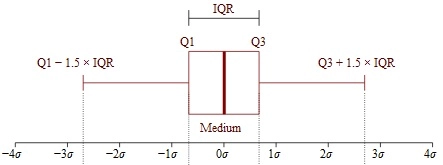

In [3]:
def zscore_outliers(x, cutoff=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    dmean = x.mean()
    dsd = x.std()
    rng = dsd * cutoff
    lower = dmean - rng
    upper = dmean + rng
    if return_thresholds:
        return lower, upper
    else:
        return [True if z < lower or z > upper else False for z in x]


def iqr_outliers(x, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25 = np.percentile(x, 25)
    q75 = np.percentile(x, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if z < lower or z > upper else False for z in x]

Retrieving data from superbooking table

In [4]:
superbooking=readSQL("""select * from superbooking0""")
superbooking['clientdate']=superbooking['client']+superbooking['date']
nbappts=len(superbooking)
superbooking.columns

Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate',
       ...
       'x2_TRE 1', 'x3_BECKY', 'x3_HOUSE', 'x3_JJ', 'x3_JOANNE', 'x3_KELLY',
       'x3_SINEAD', 'x3_TANYA', 'visit', 'clientdate'],
      dtype='object', length=171)

handling count variables as categories

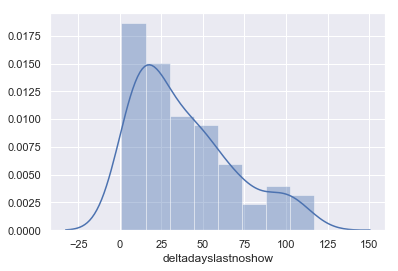

In [5]:
X=superbooking.loc[superbooking['deltadayslastnoshow']>0,:]
sns.distplot(X['deltadayslastnoshow'])

In [6]:
X['deltadayslastnoshow'].groupby(X['noshowflag']).describe()

count       mean        std  min    25%   50%    75%    max
noshowflag                                                             
0           150.0  39.066667  29.153992  1.0  16.00  34.0  55.00  111.0
1            24.0  34.041667  32.630313  1.0  13.25  22.0  43.75  117.0

In [7]:
superbooking['deltadayslastnoshowc']='daysnoshow0'
superbooking.loc[(superbooking['deltadayslastnoshow']>0) & (superbooking['deltadayslastnoshow']<=15),'deltadayslastnoshowc']='daysnoshow1-15'
superbooking.loc[(superbooking['deltadayslastnoshow']>15) & (superbooking['deltadayslastnoshow']<=30),'deltadayslastnoshowc']='daysnoshow16-30'
superbooking.loc[(superbooking['deltadayslastnoshow']>30) & (superbooking['deltadayslastnoshow']<=45),'deltadayslastnoshowc']='daysnoshow31-45'
superbooking.loc[(superbooking['deltadayslastnoshow']>45) & (superbooking['deltadayslastnoshow']<=60),'deltadayslastnoshowc']='daysnoshow46-60'
superbooking.loc[(superbooking['deltadayslastnoshow']>60),'deltadayslastnoshowc']='daysnoshow60+'

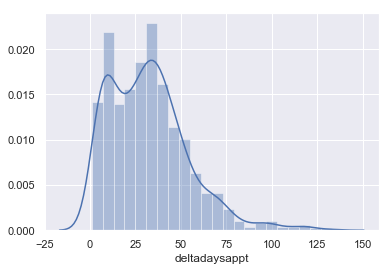

In [8]:
X=superbooking.loc[superbooking['deltadaysappt']>0,:]
sns.distplot(X['deltadaysappt'])

In [9]:
X['deltadaysappt'].groupby(X['noshowflag']).describe()

count       mean        std  min   25%   50%   75%    max
noshowflag                                                           
0           780.0  32.439744  21.660532  1.0  14.0  32.0  43.0  133.0
1            65.0  27.523077  23.147697  1.0  11.0  23.0  36.0  116.0

In [10]:
superbooking['deltadaysapptc']='lastappt0'
superbooking.loc[(superbooking['deltadaysappt']>0) & (superbooking['deltadaysappt']<=15),'deltadaysapptc']='lastappt1-15'
superbooking.loc[(superbooking['deltadaysappt']>15) & (superbooking['deltadaysappt']<=30),'deltadaysapptc']='lastappt16-30'
superbooking.loc[(superbooking['deltadaysappt']>30) & (superbooking['deltadaysappt']<=45),'deltadaysapptc']='lastappt31-45'
superbooking.loc[(superbooking['deltadaysappt']>45),'deltadaysapptc']='lastappt45+'

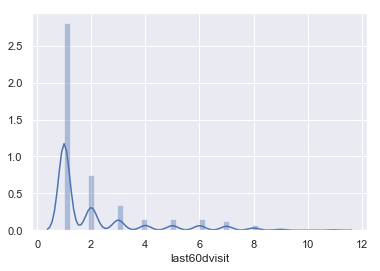

In [11]:
X=superbooking.loc[superbooking['last60dvisit']>0,:]
sns.distplot(X['last60dvisit'])

In [12]:
X['last60dvisit'].groupby(X['noshowflag']).describe()

count      mean       std  min  25%  50%  75%   max
noshowflag                                                     
0           705.0  2.087943  1.887665  1.0  1.0  1.0  2.0  11.0
1            61.0  1.950820  1.783501  1.0  1.0  1.0  2.0  11.0

In [13]:
superbooking['last60dvisitc']='last60v-'+'+4'
for i in superbooking['last60dvisit'].unique():
    if i <= 4:
        superbooking.loc[superbooking['last60dvisit']==i,'last60dvisitc']='last60v-'+ str(i)

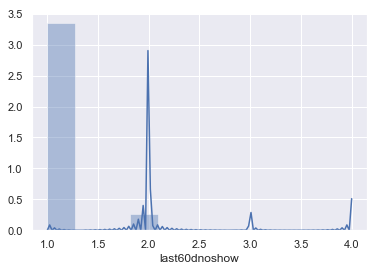

In [14]:
X=superbooking.loc[superbooking['last60dnoshow']>0,:]
sns.distplot(X['last60dnoshow'])

In [15]:
X['last60dnoshow'].groupby(X['noshowflag']).describe()

count      mean       std  min  25%  50%  75%  max
noshowflag                                                    
0           118.0  1.076271  0.266563  1.0  1.0  1.0  1.0  2.0
1            19.0  1.315789  0.820070  1.0  1.0  1.0  1.0  4.0

In [16]:
superbooking['last60dnoshowc']='last60ns-'+'+2'
for i in superbooking['last60dnoshow'].unique():
    if i <= 2:
        superbooking.loc[superbooking['last60dnoshow']==i,'last60dnoshowc']='last60ns-'+ str(i)

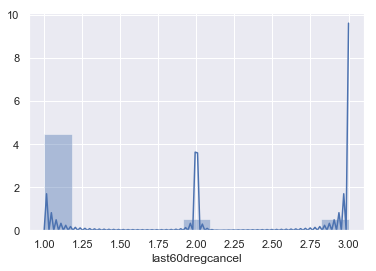

In [17]:
X=superbooking.loc[superbooking['last60dregcancel']>0,:]
sns.distplot(X['last60dregcancel'])

In [18]:
X['last60dregcancel'].groupby(X['noshowflag']).describe()

count      mean       std  min  25%  50%  75%  max
noshowflag                                                    
0           117.0  1.290598  0.630542  1.0  1.0  1.0  1.0  3.0
1            15.0  1.200000  0.560612  1.0  1.0  1.0  1.0  3.0

In [19]:
for i in superbooking['last60dregcancel'].unique():
        superbooking.loc[superbooking['last60dregcancel']==i,'last60dregcancelc']='last60regcancel-'+ str(i)

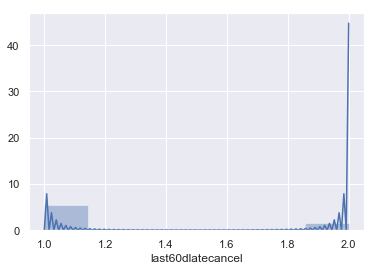

In [20]:
X=superbooking.loc[superbooking['last60dlatecancel']>0,:]
sns.distplot(X['last60dlatecancel'])

In [21]:
X['last60dlatecancel'].groupby(X['noshowflag']).describe()

count     mean       std  min  25%  50%  75%  max
noshowflag                                                   
0            46.0  1.23913  0.431266  1.0  1.0  1.0  1.0  2.0
1             6.0  1.00000  0.000000  1.0  1.0  1.0  1.0  1.0

In [22]:
for i in superbooking['last60dlatecancel'].unique():
        superbooking.loc[superbooking['last60dlatecancel']==i,'last60dlatecancelc']='last60dlatecancel-'+ str(i)

In [23]:
superbooking.to_sql('superbooking',db,if_exists='replace',index=False)

C:\Users\moshe\Anaconda3\lib\site-packages\pandas\core\generic.py:2522: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


In [24]:
allcolumns=superbooking.columns
columnstoremove=['client',  'newcustomer',
                'date', 'time', 'timeint', 'description',
                'canceldate', 'canceledby',
                'latecancellation', 'tdate',  'ttime',
                'firstdate','firstdate2',  'lastnoshowdate',
       'lastnoshowhour', 'lastvisitdate',
       'lastvisithour', 'laststaff',  'lastservice',
       'lastcategory',  'dayhourcombi', 'dayhourcount',
       'daycount', 'hourday', 'lastvisitdayhourcombi','lastnoshowdayhourcombi','clientdate'
       'lastnoshowdayhourcombi', 'lastcategory2', 'visit','clientdate']
predictorlist = [x for x in allcolumns if x not in columnstoremove]
booking=superbooking[predictorlist].copy()

In [25]:
dftmp=booking.columns.to_frame()
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/columnsfinaldf.xlsx"
dftmp.to_excel(filepath, index=False)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/bookingdescribe.xlsx"
booking.describe().to_excel(filepath)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/df.xlsx"
booking.to_excel(filepath)

In [26]:
#unique values
print(['unique values deltadaysappt',len(booking.deltadaysappt.value_counts())
      ,'deltadayslastnoshow',len(booking.deltadayslastnoshow.value_counts())
      ,'last60dvisit',len(booking.last60dvisit.value_counts())
,'last60dnoshow',len(booking.last60dnoshow.value_counts())
,'last60dbillamt',len(booking.last60dbillamt.value_counts())
,'last60misc',len(booking.last60misc.value_counts())
,'last60dcolor',len(booking.last60dcolor.value_counts())
,'last60dstyle',len(booking.last60dstyle.value_counts())
,'last60dproduct',len(booking.last60dproduct.value_counts())
,'last60dlatecancel',len(booking.last60dlatecancel.value_counts())
,'last60dregcancel',len(booking.last60dregcancel.value_counts())
,'svcavg',len(booking.svcavg.value_counts())
,'lastsvcavg',len(booking.lastsvcavg.value_counts())])

['unique values deltadaysappt', 97, 'deltadayslastnoshow', 77, 'last60dvisit', 12, 'last60dnoshow', 5, 'last60dbillamt', 210, 'last60misc', 3, 'last60dcolor', 27, 'last60dstyle', 132, 'last60dproduct', 35, 'last60dlatecancel', 3, 'last60dregcancel', 4, 'svcavg', 28, 'lastsvcavg', 20]


In [27]:
superbooking[['visit','firstapp','newcustomer','existingcustomer','noshowflag','multipleappt','latecancellation']].describe()

visit     firstapp  newcustomer  existingcustomer   noshowflag  \
count  1794.0  1794.000000  1794.000000       1794.000000  1794.000000   
mean      1.0     0.511148     0.494426          0.471014     0.077480   
std       0.0     0.500015     0.500108          0.499298     0.267427   
min       1.0     0.000000     0.000000          0.000000     0.000000   
25%       1.0     0.000000     0.000000          0.000000     0.000000   
50%       1.0     1.000000     0.000000          0.000000     0.000000   
75%       1.0     1.000000     1.000000          1.000000     0.000000   
max       1.0     1.000000     1.000000          1.000000     1.000000   

       multipleappt  latecancellation  
count   1794.000000       1794.000000  
mean       0.241360          0.044036  
std        0.428027          0.205232  
min        0.000000          0.000000  
25%        0.000000          0.000000  
50%        0.000000          0.000000  
75%        0.000000          0.000000  
max        1.000000          1.000000

<h2>various statistics

In [28]:
nbcustomers=len(superbooking['client'].unique())
avgapptday=len(superbooking)/len(superbooking['date'].unique())
avgapptdaylast3m=len(superbooking[superbooking.date>='2018-04-28'])/len(superbooking.loc[superbooking.date>='2018-04-28','date'].unique())
a,b,c=superbooking['noshowflag'].sum(),superbooking['latecancellation'].sum(),superbooking['visit'].sum()
print(['distinct customers',nbcustomers,'nb appts',c,'total noshows',a,'total late cancellations',b,'real noshows',a-b,
       ((a-b)/a),(b/a),'%noshow',a/len(superbooking),'avgapptday',avgapptday,'avgapptdaylast3m',avgapptdaylast3m,
       len(superbooking)/len(superbooking['clientdate'].unique())])

['distinct customers', 799, 'nb appts', 1794, 'total noshows', 139, 'total late cancellations', 79, 'real noshows', 60, 0.4316546762589928, 0.5683453237410072, '%noshow', 0.07748049052396878, 'avgapptday', 16.92452830188679, 'avgapptdaylast3m', 20.569444444444443, 1.1619170984455958]


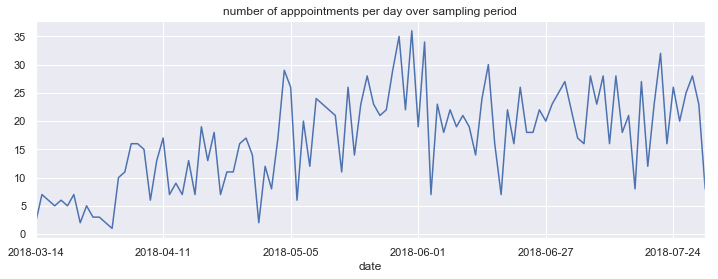

In [29]:
df=superbooking.copy()
df2=df.set_index(df['date'])
plt.figure(figsize=(12,4))
plt.title("number of apppointments per day over sampling period")
df2['visit'].groupby(['date']).sum().plot.line()

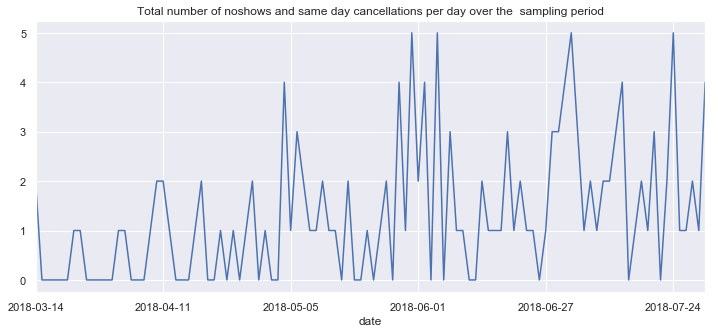

In [30]:
plt.figure(figsize=(12,5))
plt.title("Total number of noshows and same day cancellations per day over the  sampling period")
df2['noshowflag'].groupby(['date']).sum().plot()

In [31]:
df=readSQL("""select month,count(visit)/count(distinct date) avgapptsperday from superbooking group by month""")
df

month  avgapptsperday
0      3               4
1      4              11
2      5              21
3      6              20
4      7              21

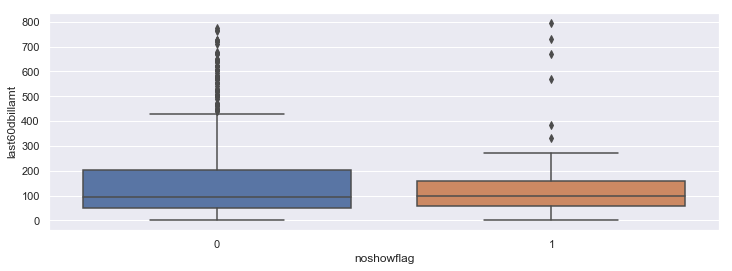

In [32]:
df=superbooking.copy()
df=df.loc[  (df.existingcustomer==1),:]
df=df.set_index(df['date'])
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="noshowflag", y="last60dbillamt", data=df)

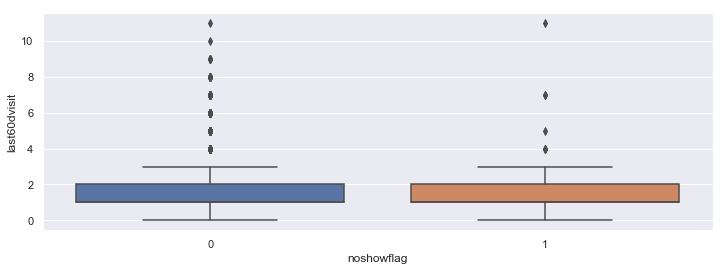

In [33]:
df=superbooking.copy()
df=df.loc[  (df.existingcustomer==1),:]
df=df.set_index(df['date'])
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="noshowflag", y="last60dvisit", data=df)

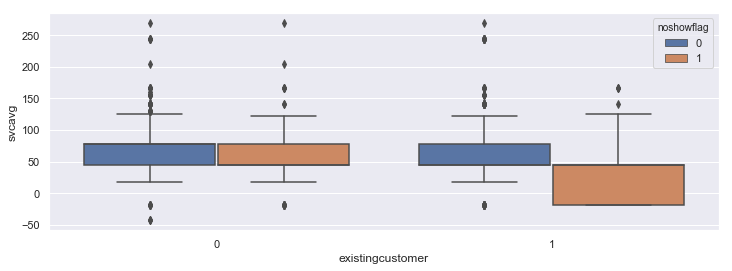

In [34]:
df=superbooking.copy()
df=df.set_index(df['date'])
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="existingcustomer", y="svcavg", hue="noshowflag",data=df)

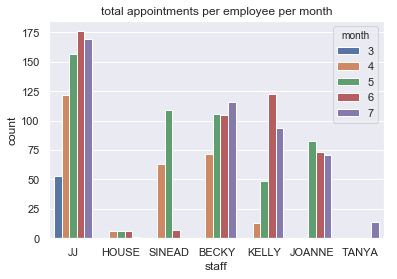

In [35]:
df=superbooking.copy()
plt.title("total appointments per employee per month")
ax = sns.countplot(x="staff",hue="month",data=df2)

Number of one time customers /recurring customers

In [36]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) = 1 order by visit desc"""
dfone=readSQL(query)
nbonetime=len(dfone)
nbonetime

458

In [37]:
superone=pd.merge(superbooking,dfone['client'],on='client',how='inner')
superone[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()
superone['clientdate']=superone['client']+superone['date']
len(superone)

520

In [38]:
len(superone['clientdate'].unique())

458

In [39]:
avgapptday=len(superone)/len(superone['clientdate'].unique())
a,b,c=superone['noshowflag'].sum(),superone['latecancellation'].sum(),superone['visit'].sum()
print([nbonetime,c,a,b,'real noshow',a-b,((a-b)/a),(b/a),'%noshow',a/len(superone),avgapptday])

[458, 520, 34, 18, 'real noshow', 16, 0.47058823529411764, 0.5294117647058824, '%noshow', 0.06538461538461539, 1.1353711790393013]


In [40]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) > 1 order by visit desc"""
dfmulti=readSQL(query)
nbmulti=len(dfmulti)
supermulti=pd.merge(superbooking,dfmulti['client'],on='client',how='inner')
supermulti['clientdate']=supermulti['client']+supermulti['date']
supermulti[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()

visit     firstapp  newcustomer   noshowflag  multipleappt  \
count  1274.0  1274.000000  1274.000000  1274.000000   1274.000000   
mean      1.0     0.311617     0.311617     0.082418      0.251962   
std       0.0     0.463336     0.463336     0.275108      0.434310   
min       1.0     0.000000     0.000000     0.000000      0.000000   
25%       1.0     0.000000     0.000000     0.000000      0.000000   
50%       1.0     0.000000     0.000000     0.000000      0.000000   
75%       1.0     1.000000     1.000000     0.000000      1.000000   
max       1.0     1.000000     1.000000     1.000000      1.000000   

       latecancellation  
count       1274.000000  
mean           0.047881  
std            0.213598  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [41]:
avgapptday=len(supermulti)/len(supermulti['clientdate'].unique())
nbappt1streceipt=len(supermulti[supermulti.existingcustomer==0])
nbapptafterreceipt=len(supermulti[supermulti.existingcustomer==1])
a,b,c=supermulti['noshowflag'].sum(),supermulti['latecancellation'].sum(),supermulti['visit'].sum()
print([nbmulti,c,'noshow',a,'late',b,'realnoshow',a-b,((a-b)/a),(b/a),avgapptday,'nbappt1streceipt',nbappt1streceipt,
     'nbapptafterreceipt',nbapptafterreceipt])

[341, 1274, 'noshow', 105, 'late', 61, 'realnoshow', 44, 0.41904761904761906, 0.580952380952381, 1.1731123388581952, 'nbappt1streceipt', 429, 'nbapptafterreceipt', 845]


In [42]:
len(supermulti)

1274

<h2> number of customers having multiple effective visits done in studied period

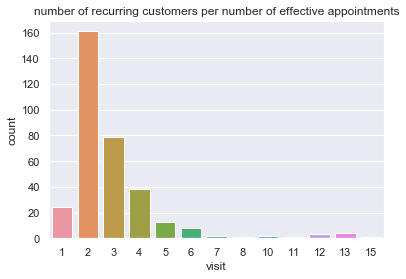

In [43]:
query="""select client, count(distinct date) visit from  superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1) and noshowflag=0  group by client"""
df=readSQL(query)
plt.title("number of recurring customers per number of effective appointments")
ax = sns.countplot(x="visit",data=df)

number of average effective visits per recurring customer

In [44]:
df.mean()

visit    2.979228
dtype: float64

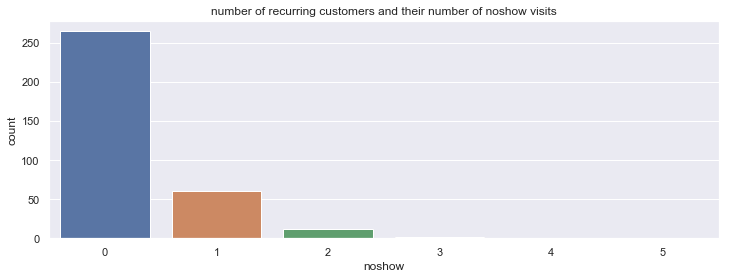

In [45]:
plt.figure(figsize=(12,4))
query="""select client, count(distinct date) noshow from superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1) and noshowflag=1 group by client
union select client, 0 noshow from superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1 and  SUM(noshowflag)=0)"""
df=readSQL(query)
plt.title("number of recurring customers and their number of noshow visits")
ax = sns.countplot(x="noshow",data=df)

In [46]:
print(['average number of noshows/customer',df.mean()])

['average number of noshows/customer', noshow    0.290323
dtype: float64]


In [47]:
print(['customer with one no show ',(df[df['noshow']==1].count())/(df.count()),
      'customer with two no show at least',(df[df['noshow']>=2].count())/(df.count())])

['customer with one no show ', client    0.175953
noshow    0.175953
dtype: float64, 'customer with two no show at least', client    0.046921
noshow    0.046921
dtype: float64]


Distribution deltadays between 2 effective appointments 

In [48]:
df=supermulti.copy()
df=df.loc[(df.deltadaysappt != 0)  & (df.noshowflag==0) ,:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadaysappt']]
df3.describe()

deltadaysappt
count     667.000000
mean       32.416792
std        21.879349
min         1.000000
25%        14.000000
50%        31.000000
75%        43.000000
max       133.000000

In [49]:
print(['% of recurring subs coming within 60 days',len(df3[df3.deltadaysappt<=60])/len(df3)])

['% of recurring subs coming within 60 days', 0.904047976011994]


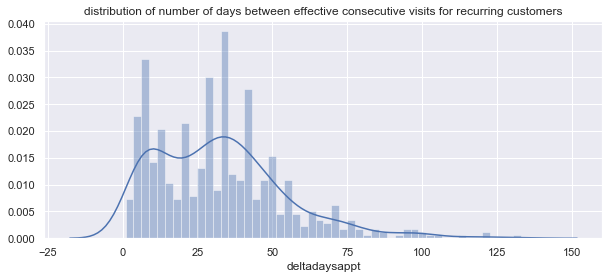

In [50]:
plt.figure(figsize=(10,4))
plt.title("distribution of number of days between effective consecutive visits for recurring customers")
ax=sns.distplot(df3.deltadaysappt,norm_hist=True,bins=50)

In [51]:
df3.deltadaysappt.mean()

32.416791604197904

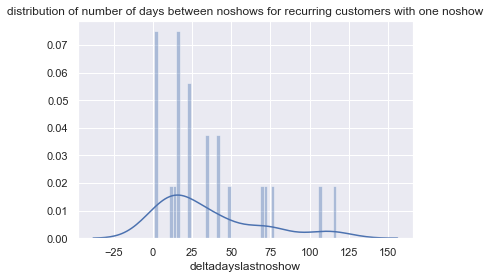

In [52]:
df=supermulti.copy()
df=df.loc[(df.deltadayslastnoshow!=0) & (df.noshowflag==1),:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadayslastnoshow']]
plt.title("distribution of number of days between noshows for recurring customers with one noshow")
ax=sns.distplot(df3.deltadayslastnoshow,norm_hist=True,bins=50)

The average number days between two noshows

In [53]:
df3.mean()

deltadayslastnoshow    35.043478
dtype: float64

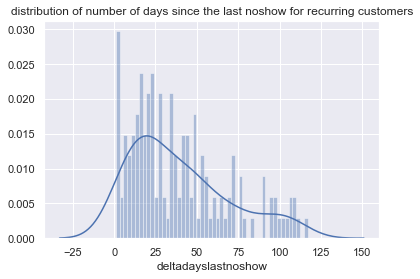

In [54]:
df=supermulti.copy()
df=df.loc[(df.deltadayslastnoshow!=0),:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadayslastnoshow']]
plt.title("distribution of number of days since the last noshow for recurring customers")
ax=sns.distplot(df3.deltadayslastnoshow,norm_hist=True,bins=50)

In [55]:
#first appointment 7% noshows
df=superbooking.copy()
df=df.loc[(df.firstapp==1),:]
df.describe()

timeint  noshowflag  latecancellation       month        week  \
count   884.000000  917.000000        917.000000  917.000000  917.000000   
mean    823.642534    0.069793          0.035987    5.163577    3.222465   
std     170.536662    0.254937          0.186359    1.138577    1.290128   
min     480.000000    0.000000          0.000000    3.000000    1.000000   
25%     677.500000    0.000000          0.000000    4.000000    2.000000   
50%     830.000000    0.000000          0.000000    5.000000    3.000000   
75%     960.000000    0.000000          0.000000    6.000000    4.000000   
max    1170.000000    1.000000          1.000000    7.000000    5.000000   

        dayinweek        hour  firstapp  newcustomer  existingcustomer  ...  \
count  917.000000  884.000000     917.0   917.000000             917.0  ...   
mean     3.128680   13.454751       1.0     0.940022               0.0  ...   
std      1.503568    2.810994       0.0     0.237576               0.0  ...   
min      1.000000    8.000000       1.0     0.000000               0.0  ...   
25%      2.000000   11.000000       1.0     1.000000               0.0  ...   
50%      3.000000   13.000000       1.0     1.000000               0.0  ...   
75%      4.000000   16.000000       1.0     1.000000               0.0  ...   
max      6.000000   19.000000       1.0     1.000000               0.0  ...   

           x2_SMO    x2_TRE 1    x3_BECKY    x3_HOUSE       x3_JJ   x3_JOANNE  \
count  917.000000  917.000000  917.000000  917.000000  917.000000  917.000000   
mean     0.001091    0.007634    0.189749    0.004362    0.356598    0.099237   
std      0.033023    0.087084    0.392317    0.065938    0.479256    0.299143   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         x3_KELLY   x3_SINEAD    x3_TANYA  visit  
count  917.000000  917.000000  917.000000  917.0  
mean     0.222465    0.116685    0.010905    1.0  
std      0.416128    0.321220    0.103913    0.0  
min      0.000000    0.000000    0.000000    1.0  
25%      0.000000    0.000000    0.000000    1.0  
50%      0.000000    0.000000    0.000000    1.0  
75%      0.000000    0.000000    0.000000    1.0  
max      1.000000    1.000000    1.000000    1.0  

[8 rows x 147 columns]

In [56]:
#following appointments 8.5% noshows
df=superbooking.copy()
df=df.loc[(df.firstapp==0),:]
df.describe()

timeint  noshowflag  latecancellation       month        week  \
count   831.000000  877.000000        877.000000  877.000000  877.000000   
mean    798.291215    0.085519          0.052452    6.012543    3.429875   
std     174.936042    0.279812          0.223063    0.910907    1.272710   
min     480.000000    0.000000          0.000000    4.000000    1.000000   
25%     660.000000    0.000000          0.000000    5.000000    2.000000   
50%     780.000000    0.000000          0.000000    6.000000    4.000000   
75%     950.000000    0.000000          0.000000    7.000000    5.000000   
max    1160.000000    1.000000          1.000000    7.000000    5.000000   

        dayinweek        hour  firstapp  newcustomer  existingcustomer  ...  \
count  877.000000  831.000000     877.0   877.000000        877.000000  ...   
mean     3.151653   13.040915       0.0     0.028506          0.963512  ...   
std      1.461387    2.907947       0.0     0.166509          0.187608  ...   
min      1.000000    8.000000       0.0     0.000000          0.000000  ...   
25%      2.000000   11.000000       0.0     0.000000          1.000000  ...   
50%      3.000000   13.000000       0.0     0.000000          1.000000  ...   
75%      4.000000   15.000000       0.0     0.000000          1.000000  ...   
max      6.000000   19.000000       0.0     1.000000          1.000000  ...   

           x2_SMO    x2_TRE 1    x3_BECKY    x3_HOUSE       x3_JJ   x3_JOANNE  \
count  877.000000  877.000000  877.000000  877.000000  877.000000  877.000000   
mean     0.002281    0.005701    0.256556    0.017104    0.399088    0.155074   
std      0.047727    0.075334    0.436982    0.129732    0.489990    0.362182   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         x3_KELLY   x3_SINEAD    x3_TANYA  visit  
count  877.000000  877.000000  877.000000  877.0  
mean     0.085519    0.082098    0.004561    1.0  
std      0.279812    0.274671    0.067419    0.0  
min      0.000000    0.000000    0.000000    1.0  
25%      0.000000    0.000000    0.000000    1.0  
50%      0.000000    0.000000    0.000000    1.0  
75%      0.000000    0.000000    0.000000    1.0  
max      1.000000    1.000000    1.000000    1.0  

[8 rows x 147 columns]

<h2> handling outliers values

<h2> handling missing values

In [57]:
booking2=booking.copy()
miss = booking.isna().sum()
miss[miss>0]

hour      79
svcavg     4
dtype: int64

<h4>svcavg: is NULL. occurs for the  service FRI that only generated noshows. We will replace its value with the service with the lower positive average value

In [58]:
lessexpensive= booking2.loc[booking2.svcavg>0,'svcavg'].min()
booking2.loc[booking.svcavg.isna(),'svcavg']=lessexpensive

<h4>hour: handling missing values. It occurs when cancelleation was done on the date of the appointment. We assume that each employee has an average distribution of appointms during the day over the entire period. We'll run KNN, Randomforest and XGboost and take the average value.

In [59]:
columnstokeep=booking2.loc[:,booking2.columns.str.startswith('x3_')].columns
columnstokeep=columnstokeep.append(pd.Index(['month','week','dayinweek','hour','noshowflag']))
booking3=booking2[columnstokeep].copy()
booking3c=booking2[columnstokeep].copy()
for  c in booking3.columns:
    if (booking3c[c].nunique() < 14):
        booking3c[c] = booking3[c].astype('category')

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
booking4=booking3.copy()
X=booking3.loc[booking3['hour'].notna(),booking3.columns!='hour']
y=booking3.loc[booking3['hour'].notna(),'hour']
knn.fit(X, y)
booking4=booking3.copy()
booking4['hourknn']=booking3['hour']
booking4['hourknn1']=booking3['hour']
booking4['hourknn2']=booking3['hour']
booking4['hourknn3']=booking3['hour']
booking4.loc[booking4.hour.isna(),'hourknn']=knn.predict(booking3.loc[booking3['hour'].isna(),booking3.columns!='hour'])

In [61]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=3)
X=booking3c.loc[booking3c['hour'].notna(),booking3c.columns!='hour']
y=booking3c.loc[booking3c['hour'].notna(),'hour']
kneigh.fit(X, y) 
booking4.loc[booking4.hour.isna(),'hourkneigh']=kneigh.predict(booking3c.loc[booking3c['hour'].isna(),booking3c.columns!='hour'])
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [62]:
from sklearn.neighbors import RadiusNeighborsClassifier
neigh = RadiusNeighborsClassifier(radius=1.0)
X=booking3c.loc[booking3c['hour'].notna(),booking3c.columns!='hour']
y=booking3c.loc[booking3c['hour'].notna(),'hour']
neigh.fit(X, y) 
booking4.loc[booking4.hour.isna(),'hourneigh']=neigh.predict(booking3c.loc[booking3c['hour'].isna(),booking3c.columns!='hour'])
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [63]:
bcancelled=booking3.loc[booking3c['hour'].isna(),:].copy()
bcancelled['rank']=1
bcancelled.loc[bcancelled.duplicated(subset=['x3_BECKY', 'x3_HOUSE', 'x3_JJ', 'x3_JOANNE', 'x3_KELLY', 'x3_SINEAD',
       'x3_TANYA', 'month', 'week', 'dayinweek','rank'],keep='first')==True,'rank']=2
bcancelled.loc[bcancelled.duplicated(subset=['x3_BECKY', 'x3_HOUSE', 'x3_JJ', 'x3_JOANNE', 'x3_KELLY', 'x3_SINEAD',
       'x3_TANYA', 'month', 'week', 'dayinweek','rank'],keep='first')==True,'rank']=3

In [64]:
list1=bcancelled[bcancelled['rank']==1].index.tolist()
list2=bcancelled[bcancelled['rank']==2].index.tolist()
columnstokeep=['x3_BECKY','x3_HOUSE','x3_JJ','x3_JOANNE','x3_KELLY','x3_SINEAD','x3_TANYA','month','week','dayinweek','noshowflag']
#columnstokeep2=['x3_BECKY','x3_HOUSE','x3_JJ','x3_JOANNE','x3_KELLY','x3_SINEAD','x3_TANYA','month','noshowflag']
columnstokeep2=['x3_BECKY','x3_HOUSE','x3_JJ','x3_JOANNE','x3_KELLY','x3_SINEAD','x3_TANYA','dayinweek']

In [65]:
booking4['hourkneigh1']=booking3c['hour']
booking4.loc[list1,'hourkneigh1']=kneigh.predict(bcancelled.loc[bcancelled['rank']==1,columnstokeep])
neigh2 = RadiusNeighborsClassifier(radius=1.0,weights='distance')
X=booking4.loc[booking4['hourkneigh1'].notna(),columnstokeep2]
y=booking4.loc[booking4['hourkneigh1'].notna(),'hourkneigh1']
neigh2.fit(X, y)
booking4['hourneigh2']=booking4['hourkneigh1']
booking4.loc[list2,'hourneigh2']=neigh2.predict(bcancelled.loc[bcancelled['rank']==2,columnstokeep2])
booking4.to_sql('booking4',db,if_exists='replace',index=False)
neigh2.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'outlier_label': None,
 'p': 2,
 'radius': 1.0,
 'weights': 'distance'}

In [66]:
booking4.loc[list1,'hourknn1']=pd.to_numeric((knn.predict(bcancelled.loc[bcancelled['rank']==1,columnstokeep])))
X=booking4.loc[booking4['hourknn1'].notna(),columnstokeep]
y=booking4.loc[booking4['hourknn1'].notna(),'hourknn1']
knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(X, y)
booking4.loc[list2,'hourknn2']=knn.predict(bcancelled.loc[bcancelled['rank']==2,columnstokeep])
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [67]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X, y)
booking4['hourrandom']=booking3['hour']
booking4.loc[booking4.hour.isna(),'hourrandom']=regr.predict(booking3.loc[booking3['hour'].isna(),booking3.columns!='hour'])

In [68]:
import xgboost as xgb
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'reg:linear' }
num_round = 10
X=booking3.loc[booking3['hour'].notna(),booking3.columns!='hour']
y=booking3.loc[booking3['hour'].notna(),'hour']
dtrain=xgb.DMatrix(np.array(X), label=y)
modelxgb = xgb.train(param, dtrain, num_round)
# make prediction
dtest = xgb.DMatrix(np.array(booking3.loc[booking3['hour'].isna(),booking3.columns!='hour']))
booking4['hourxgb']=booking3['hour']
booking4.loc[booking4.hour.isna(),'hourxgb']=modelxgb.predict(dtest)

In [69]:
dtest1 = xgb.DMatrix(np.array(bcancelled.loc[bcancelled['rank']==1,columnstokeep]))
booking4.loc[list1,'hourxgb1']=modelxgb.predict(dtest1)
columnstokeep2=['x3_BECKY','x3_HOUSE','x3_JJ','x3_JOANNE','x3_KELLY','x3_SINEAD','x3_TANYA','month']
X=booking4.loc[booking4['hourxgb1'].notna(),columnstokeep2]
y=booking4.loc[booking4['hourxgb1'].notna(),'hourxgb1']
dtrain=xgb.DMatrix(np.array(X), label=y)
modelxgb = xgb.train(param, dtrain, num_round)
dtest2 = xgb.DMatrix(np.array(bcancelled.loc[bcancelled['rank']==2,columnstokeep2]))
booking4.loc[list2,'hourxgb2']=modelxgb.predict(dtest2)
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [70]:
#averaging
booking4['houravg']=pd.to_numeric(np.floor((booking4['hourknn']+booking4['hourrandom']+booking4['hourxgb'])/3),
                                  downcast='float')
booking4.to_sql('booking4',db,if_exists='replace',index=False)

In [71]:
booking2['hour']=booking4['hourneigh2']
#removing row where hour is null corresponds to a triple cancellation occruing on the same date for the same employee
booking2=booking2.loc[booking2['hour'].notna(),:].reset_index(drop=True)
len(booking2)

1793

In [72]:
#regenerating one hot encoding
booking2['hourdaycombi']='wkday-'+booking2['dayinweek'].astype(str)+' hour-'+booking2['hour'].astype(str)
booking2['hour']=booking2['hour'].astype('category')
booking2['lastvisitdayinweek']=booking2['lastvisitdayinweek'].astype('category')
booking2['lastnoshowdayinweek']=booking2['lastnoshowdayinweek'].astype('category')
from sklearn.preprocessing import OneHotEncoder
hotcolumns=['hourdaycombi','category','service','staff','laststaff2','deltadaysapptc',
                 'deltadaysapptc','deltadayslastnoshowc','last60dvisitc','last60dnoshowc','last60dlatecancelc',
                 'last60dregcancelc','hour','dayinweek','lastvisitdayinweek','lastnoshowdayinweek']
df1hot=booking2[hotcolumns]
enc = OneHotEncoder(handle_unknown='ignore')
hotarray=enc.fit_transform(df1hot.values).toarray()
hotdf=pd.DataFrame(hotarray,columns=enc.get_feature_names())
columnstoremove=['hourdaycombi','month','category','service','staff','laststaff2','deltadaysappt','deltadayslastnoshow']
columnstoremove.extend(['last60dvisit','last60dnoshow','last60dlatecancel','last60dregcancel'])
booking2b=booking2.drop(columns=columnstoremove).copy()
enc.get_feature_names()

array(['x0_wkday-1.0 hour-10.0', 'x0_wkday-1.0 hour-11.0',
       'x0_wkday-1.0 hour-12.0', 'x0_wkday-1.0 hour-13.0',
       'x0_wkday-1.0 hour-14.0', 'x0_wkday-1.0 hour-15.0',
       'x0_wkday-1.0 hour-16.0', 'x0_wkday-1.0 hour-17.0',
       'x0_wkday-1.0 hour-18.0', 'x0_wkday-1.0 hour-19.0',
       'x0_wkday-1.0 hour-8.0', 'x0_wkday-1.0 hour-9.0',
       'x0_wkday-2.0 hour-10.0', 'x0_wkday-2.0 hour-11.0',
       'x0_wkday-2.0 hour-12.0', 'x0_wkday-2.0 hour-13.0',
       'x0_wkday-2.0 hour-14.0', 'x0_wkday-2.0 hour-15.0',
       'x0_wkday-2.0 hour-16.0', 'x0_wkday-2.0 hour-17.0',
       'x0_wkday-2.0 hour-18.0', 'x0_wkday-2.0 hour-19.0',
       'x0_wkday-2.0 hour-8.0', 'x0_wkday-2.0 hour-9.0',
       'x0_wkday-3.0 hour-10.0', 'x0_wkday-3.0 hour-11.0',
       'x0_wkday-3.0 hour-12.0', 'x0_wkday-3.0 hour-13.0',
       'x0_wkday-3.0 hour-14.0', 'x0_wkday-3.0 hour-15.0',
       'x0_wkday-3.0 hour-16.0', 'x0_wkday-3.0 hour-17.0',
       'x0_wkday-3.0 hour-18.0', 'x0_wkday-3.0 hour-19.0',
 

In [73]:
booking2c=booking2b.loc[:,np.invert(booking2b.columns.str.startswith('x'))]
booking3=pd.concat([booking2c,hotdf],axis=1)#these columns are removed because they can bde described by column existingcustomer and previousnoshow
columnstoremove=['x7_daysnoshow0','x4_NA','x14_-1.0','x15_-1.0']
type(booking2c)
booking3=booking3.drop(columns=columnstoremove)
booking3.columns

Index(['noshowflag', 'week', 'dayinweek', 'hour', 'firstapp',
       'existingcustomer', 'multipleappt', 'previousnoshow',
       'lastnoshowdayinweek', 'lastvisitdayinweek',
       ...
       'x14_3.0', 'x14_4.0', 'x14_5.0', 'x14_6.0', 'x15_1.0', 'x15_2.0',
       'x15_3.0', 'x15_4.0', 'x15_5.0', 'x15_6.0'],
      dtype='object', length=200)

In [74]:
dftmp=booking3.columns.to_frame()
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/columnsfinaldf.xlsx"
dftmp.to_excel(filepath)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/df.xlsx"
booking3.to_excel(filepath)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/describe.xlsx"
booking3.describe().to_excel(filepath)
len(booking3)

1793

<h2> Explore data

In [75]:
import pyMechkar as mechkar
final=booking3.copy()
for c in final.columns:
    if final[c].nunique() < 14 and c not in['last60misc']:
        final[c] = final[c].astype('category')
final.dtypes

noshowflag                category
week                      category
dayinweek                 category
hour                      category
firstapp                  category
existingcustomer          category
multipleappt              category
previousnoshow            category
lastnoshowdayinweek       category
lastvisitdayinweek        category
last60dbillamt             float64
last60drefundamt           float64
last60misc                 float64
last60dcolor               float64
last60dstyle               float64
last60dproduct             float64
last90dproductbuyer       category
activebundlepromo         category
svcavg                     float64
lastsvcavg                 float64
deltadayslastnoshowc      category
deltadaysapptc            category
last60dvisitc             category
last60dnoshowc            category
last60dregcancelc         category
last60dlatecancelc        category
x0_wkday-1.0 hour-10.0    category
x0_wkday-1.0 hour-11.0    category
x0_wkday-1.0 hour-12

Directory  report  already exists
Directory  report  already exists


C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

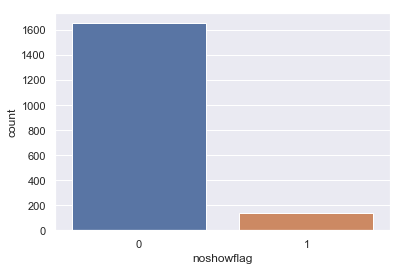

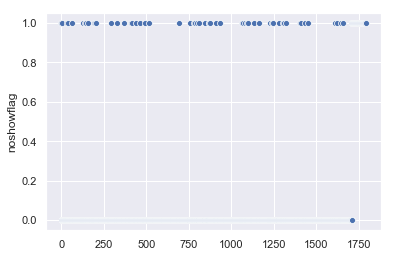

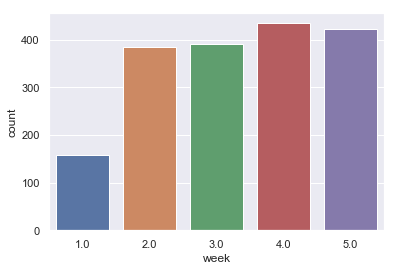

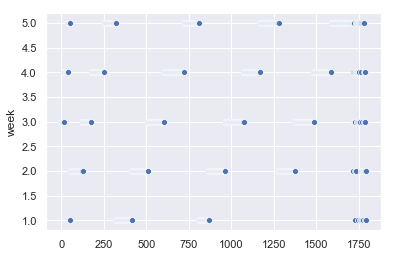

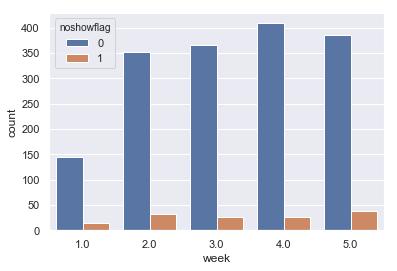

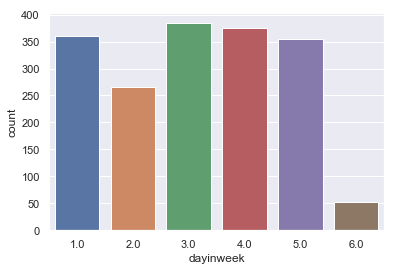

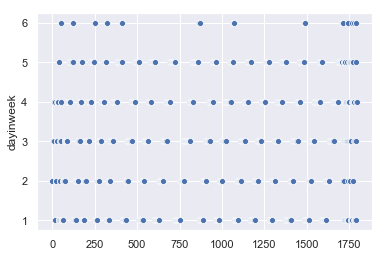

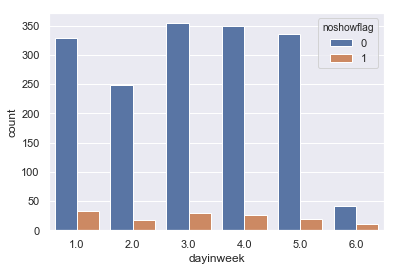

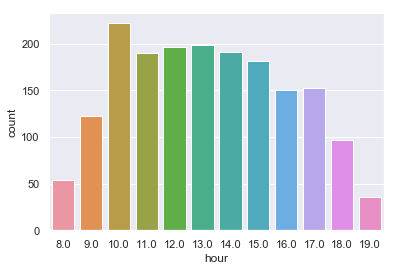

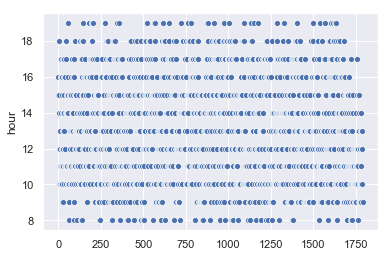

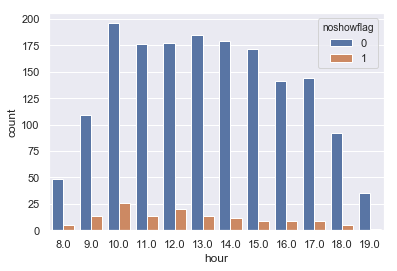

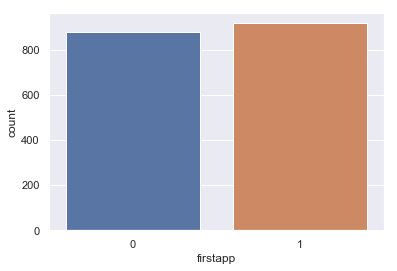

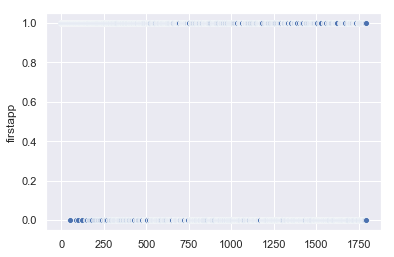

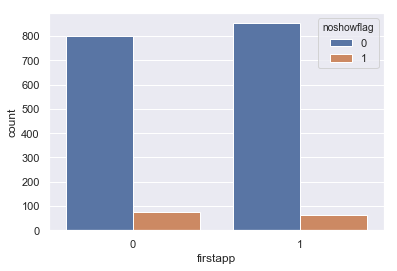

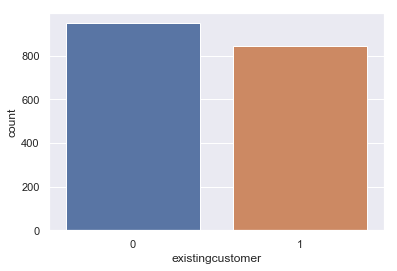

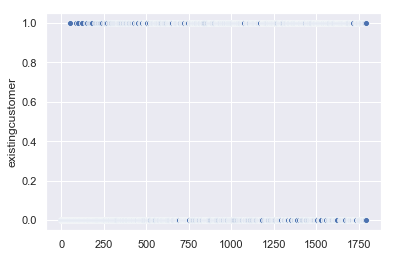

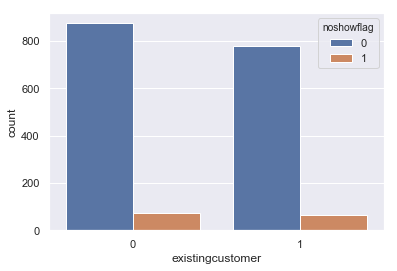

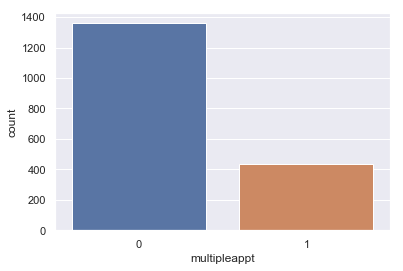

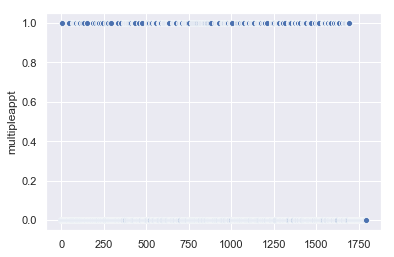

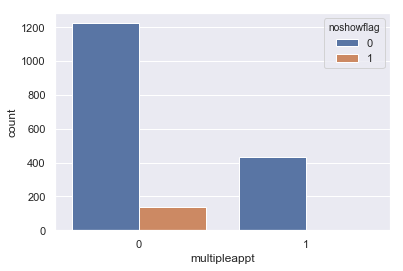

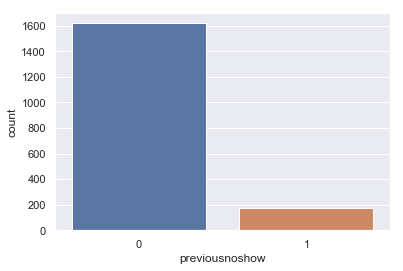

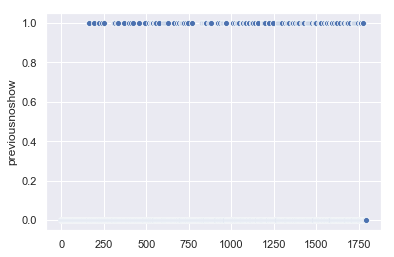

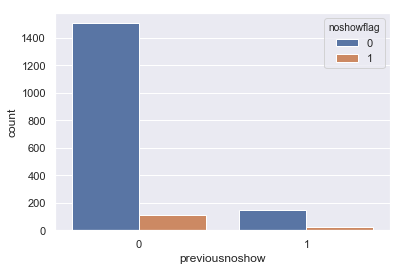

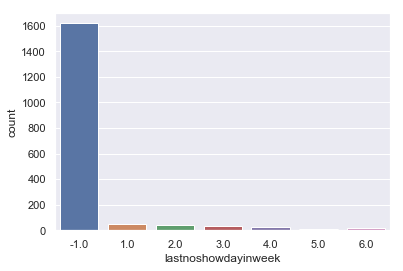

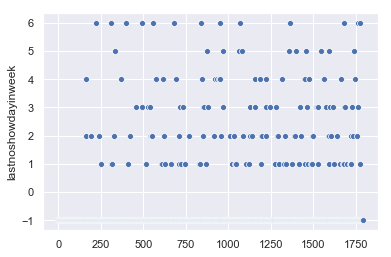

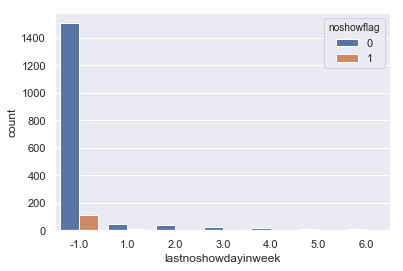

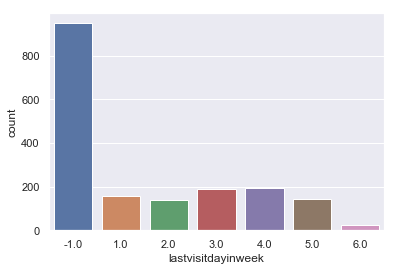

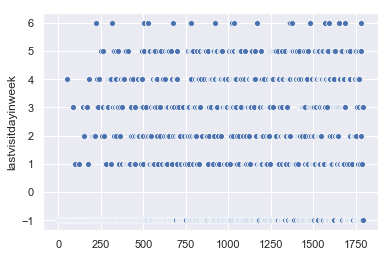

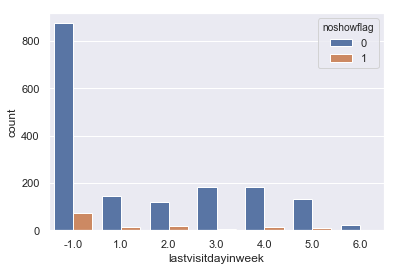

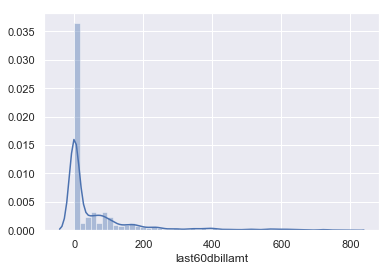

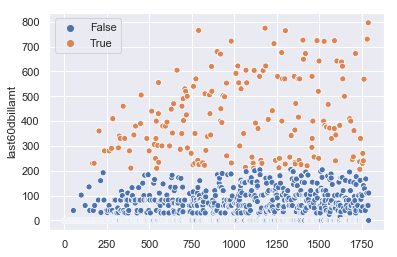

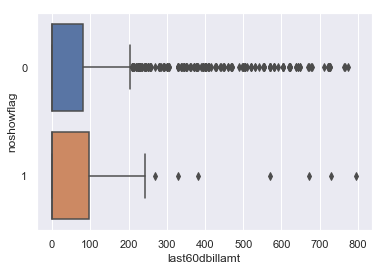

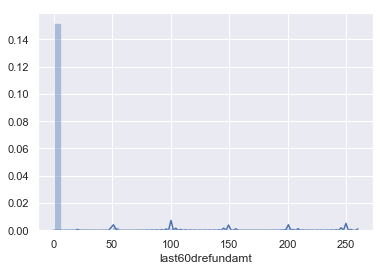

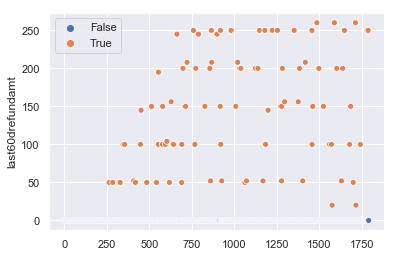

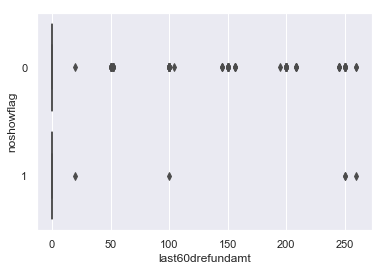

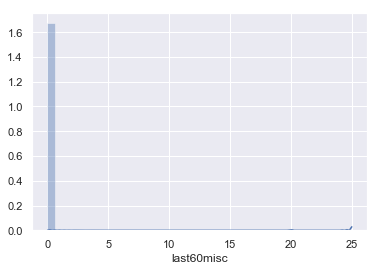

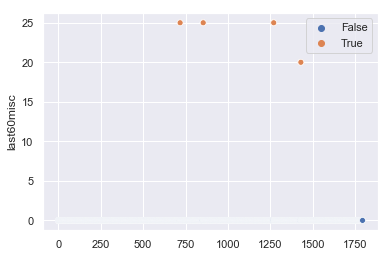

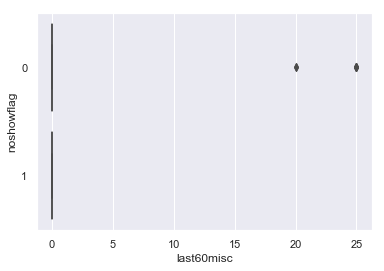

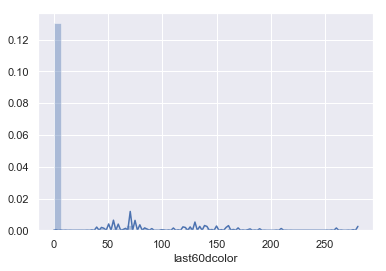

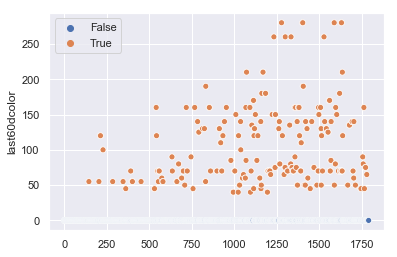

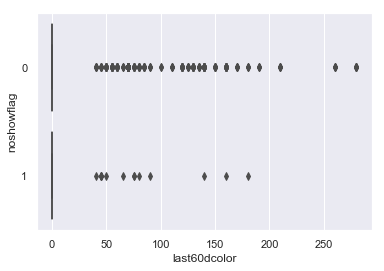

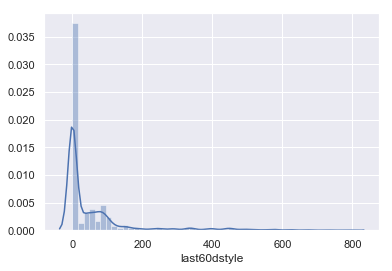

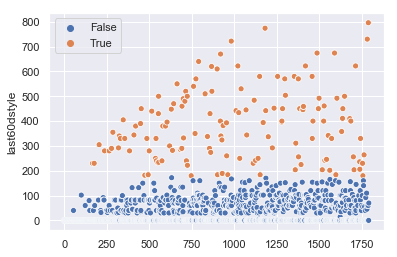

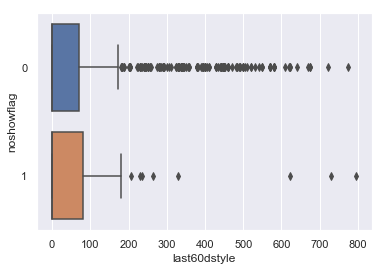

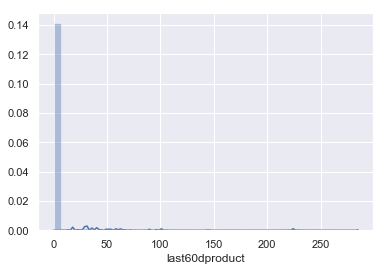

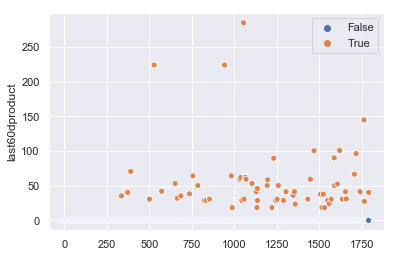

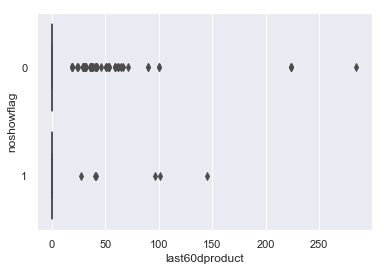

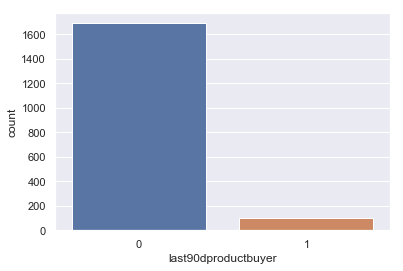

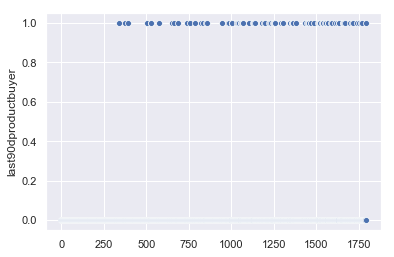

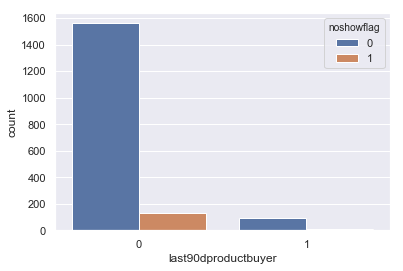

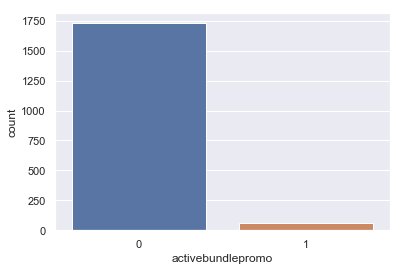

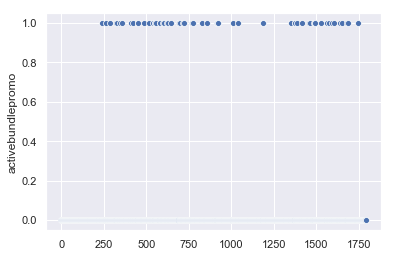

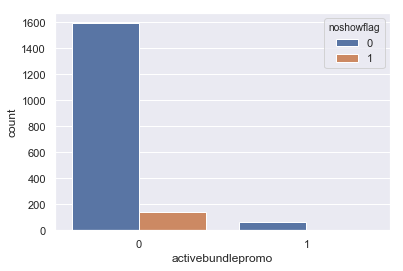

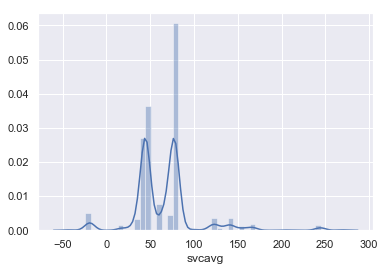

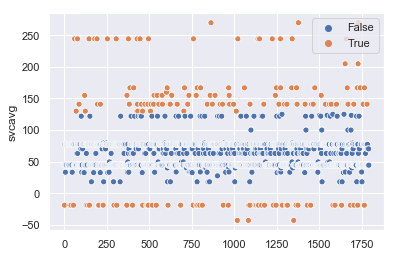

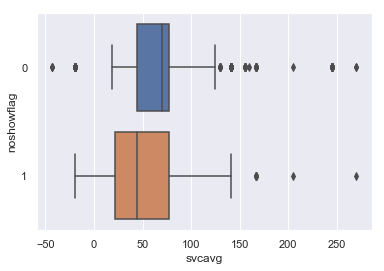

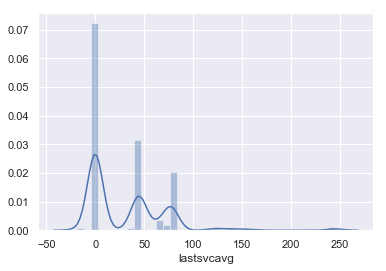

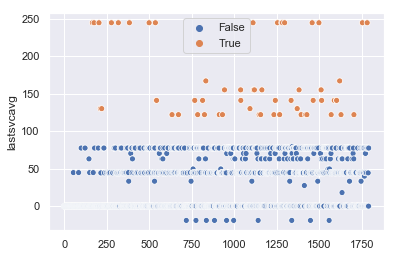

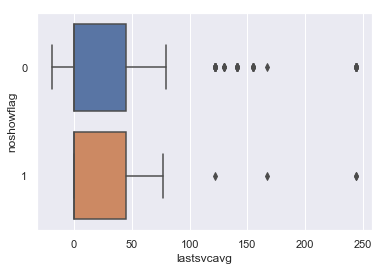

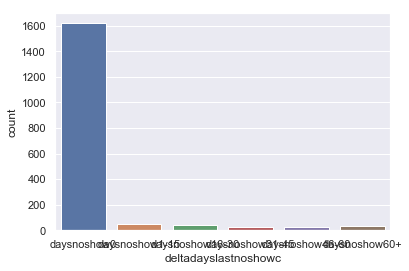

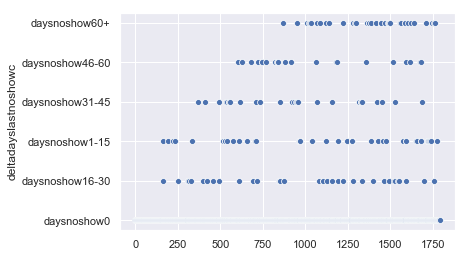

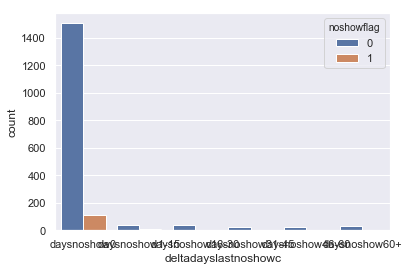

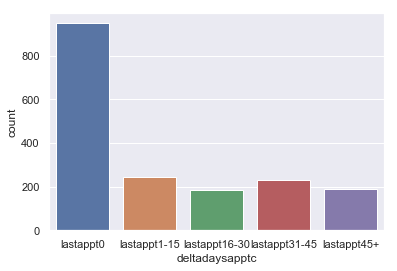

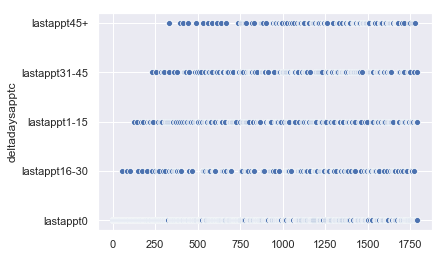

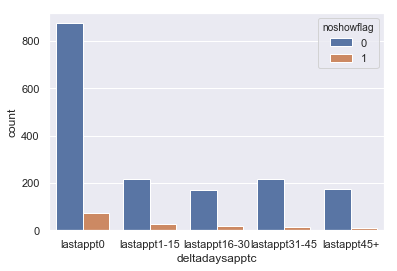

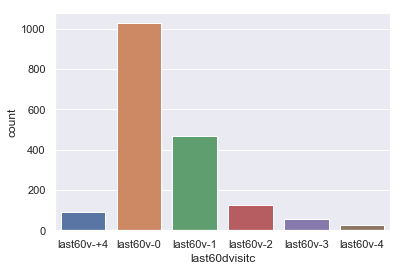

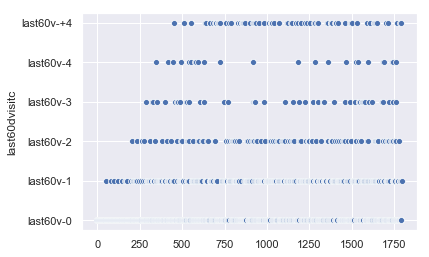

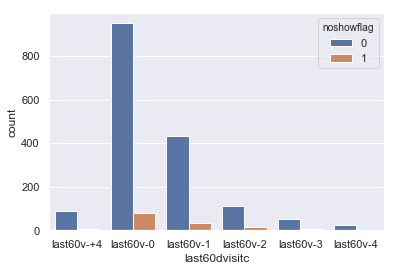

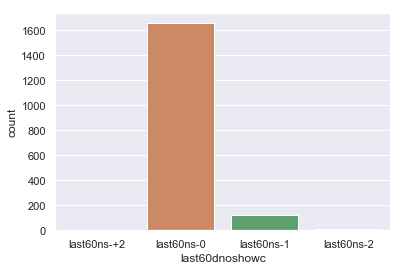

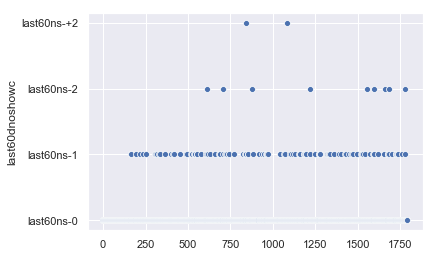

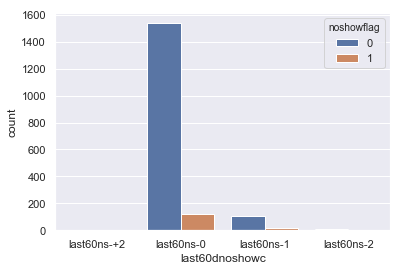

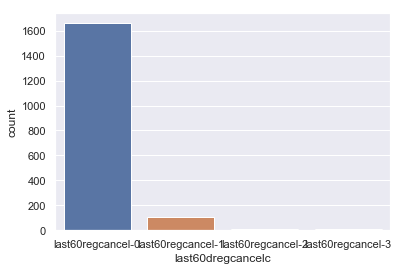

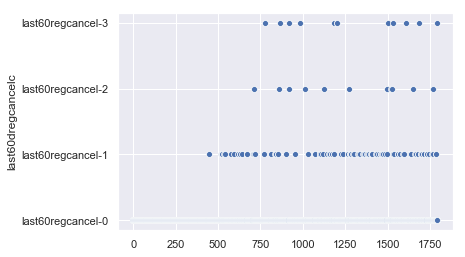

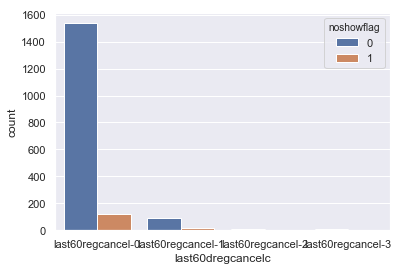

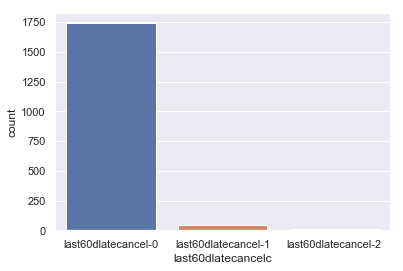

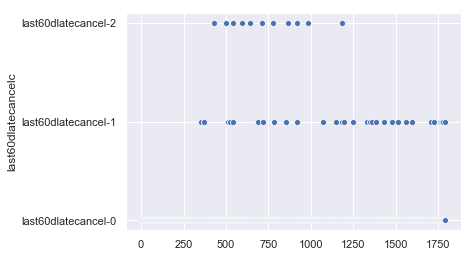

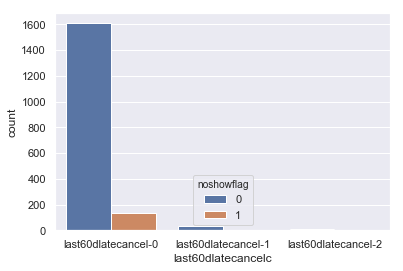

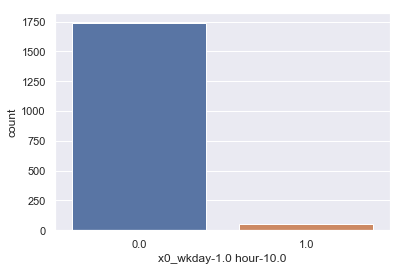

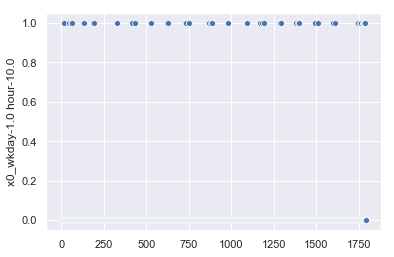

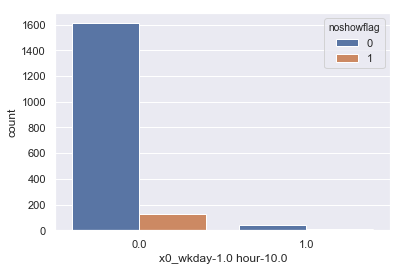

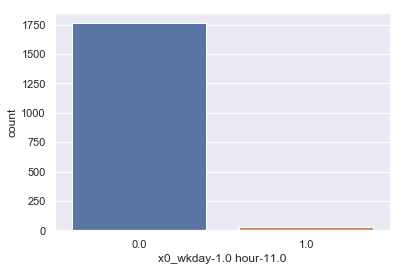

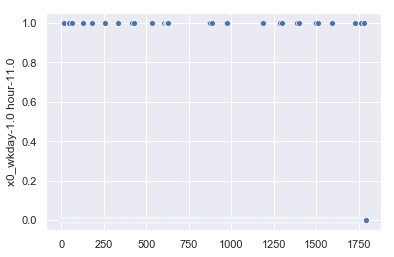

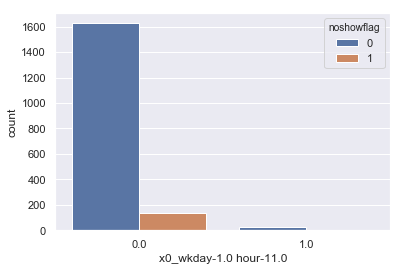

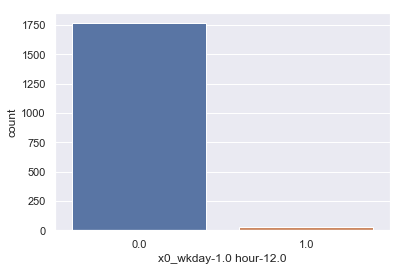

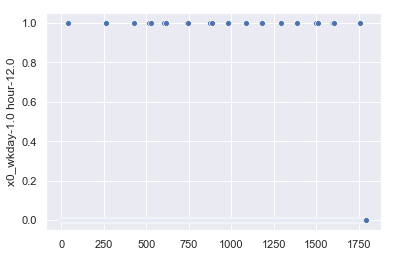

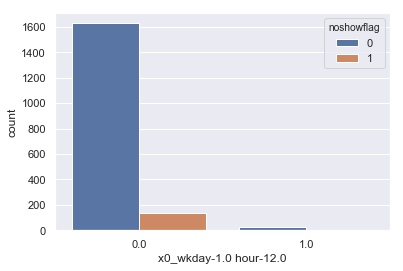

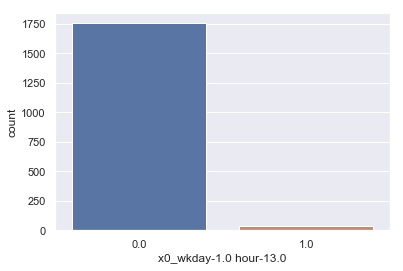

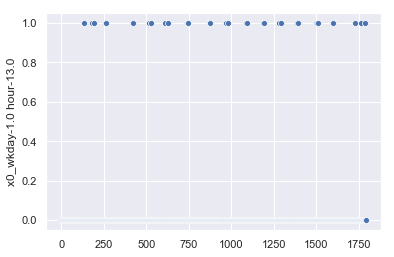

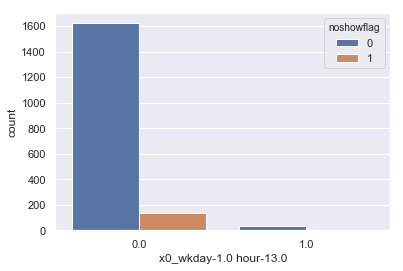

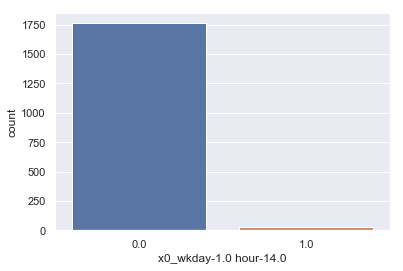

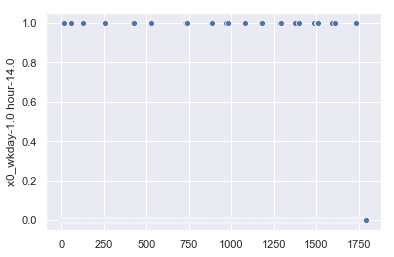

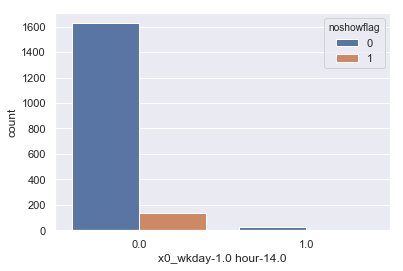

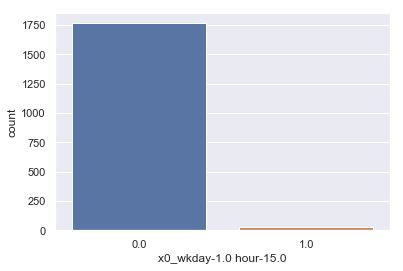

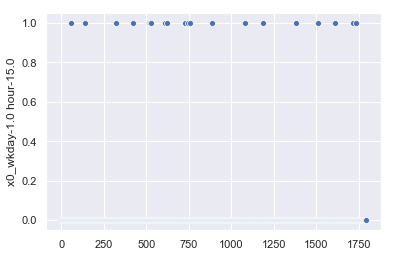

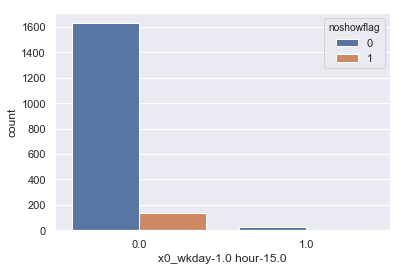

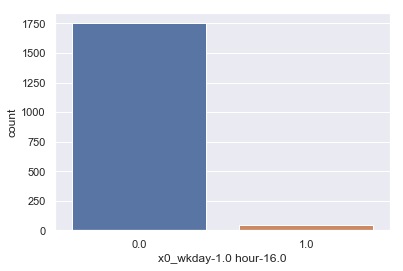

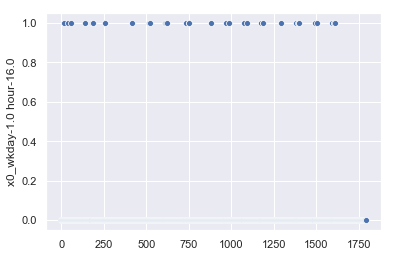

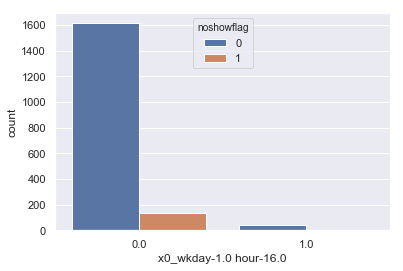

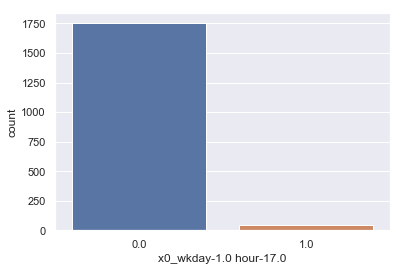

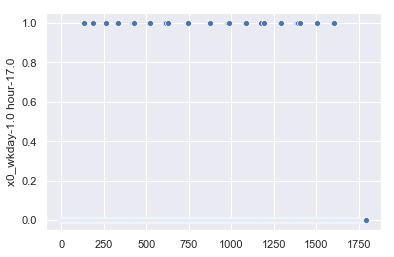

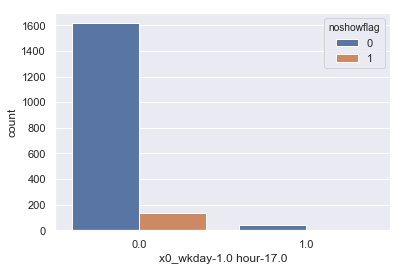

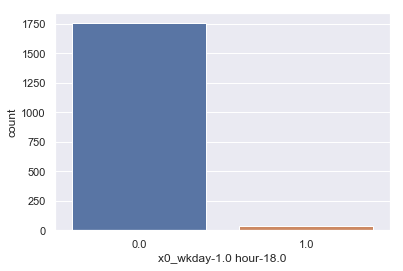

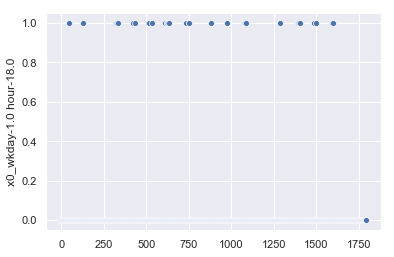

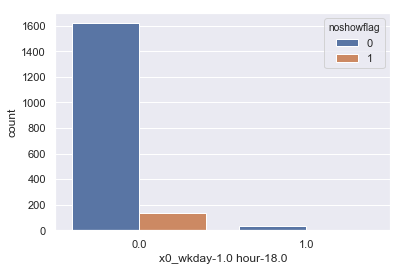

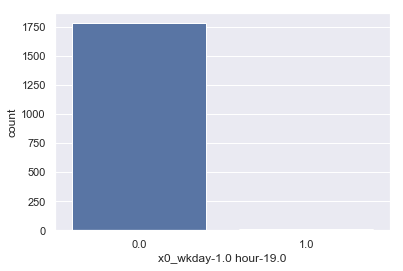

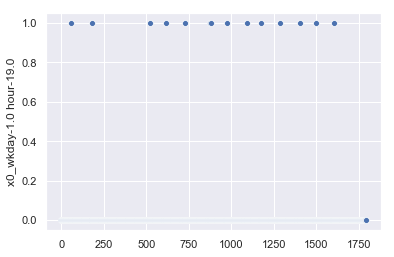

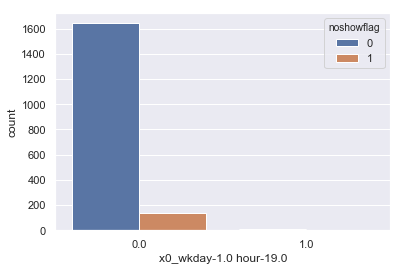

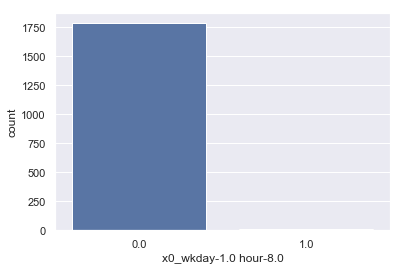

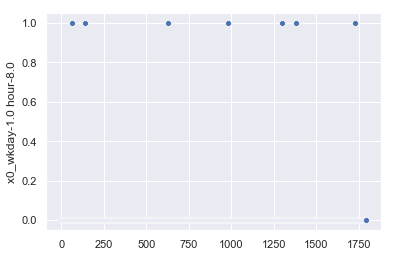

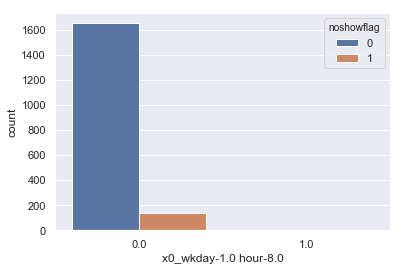

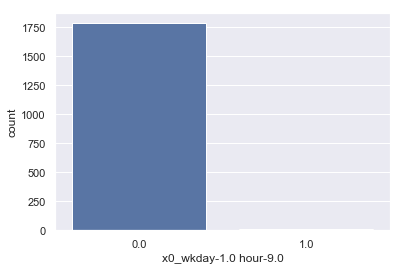

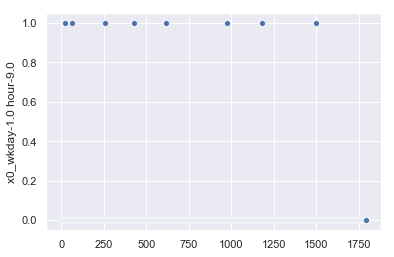

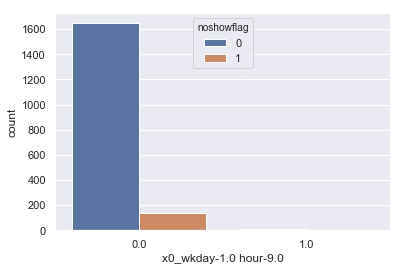

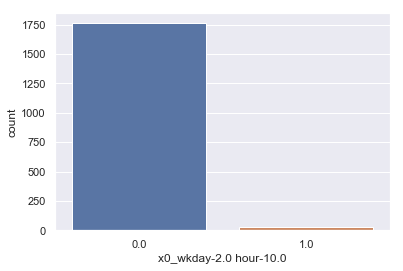

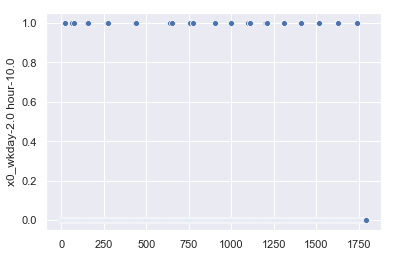

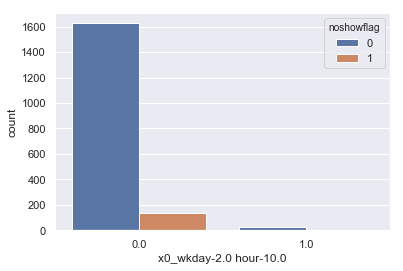

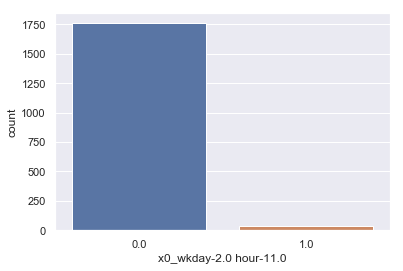

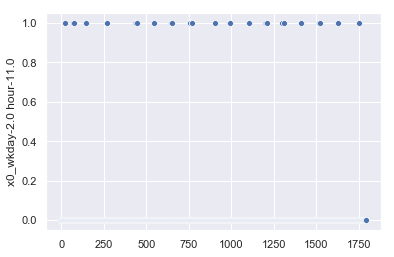

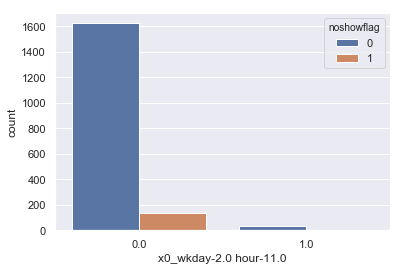

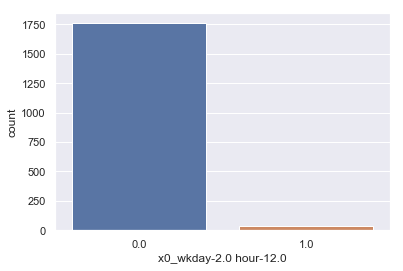

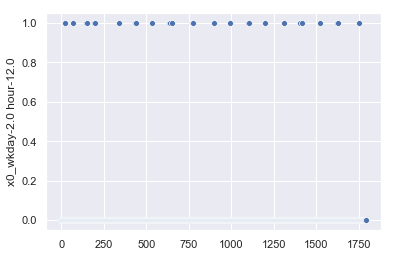

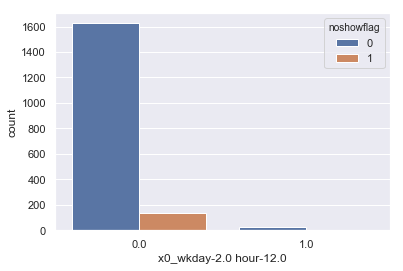

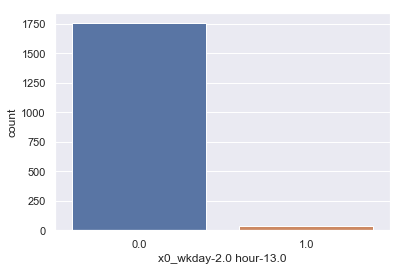

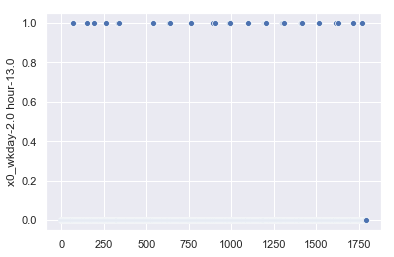

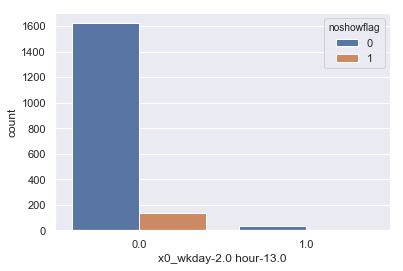

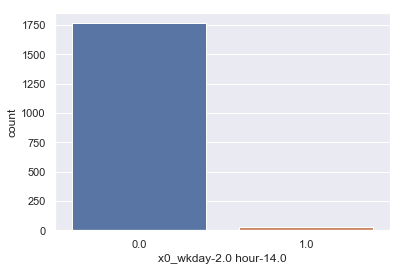

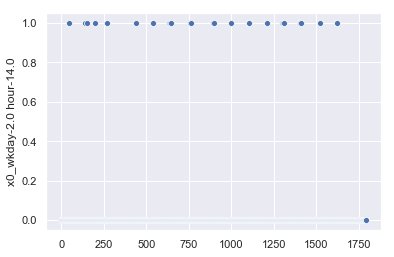

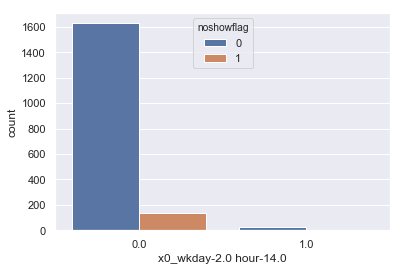

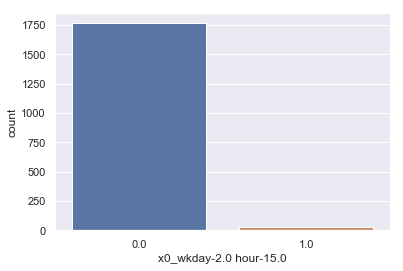

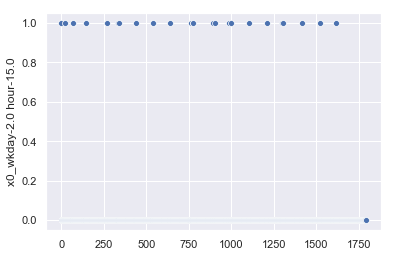

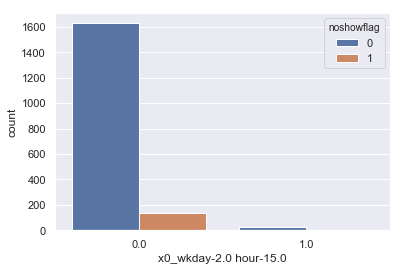

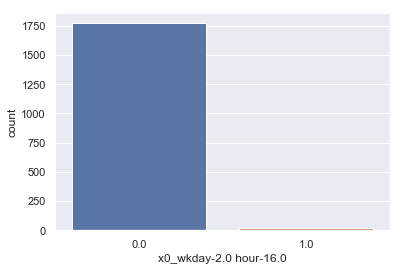

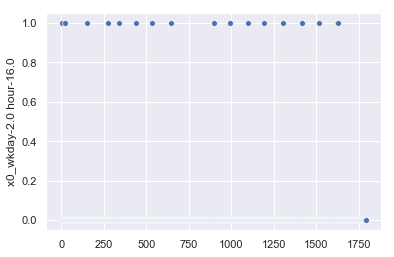

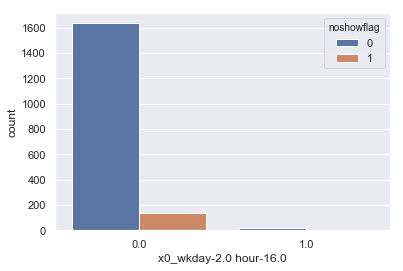

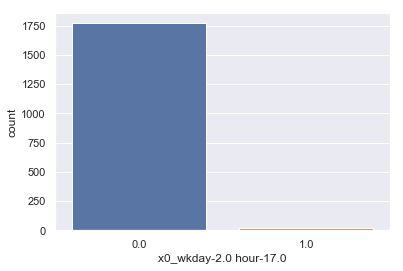

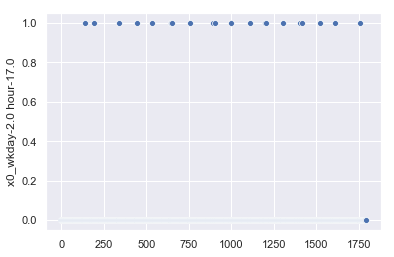

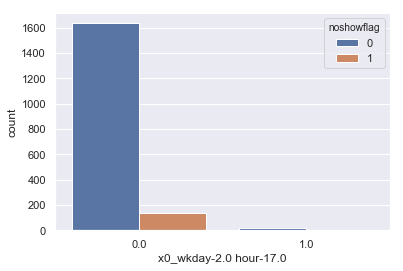

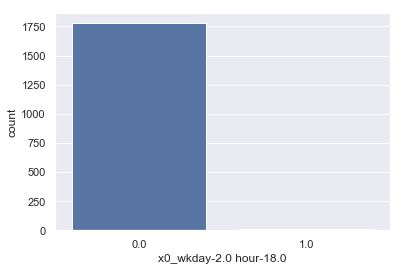

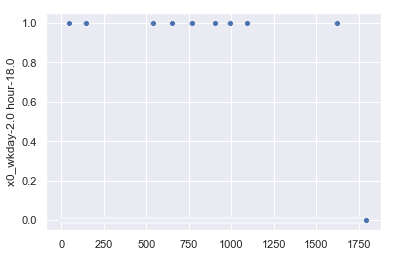

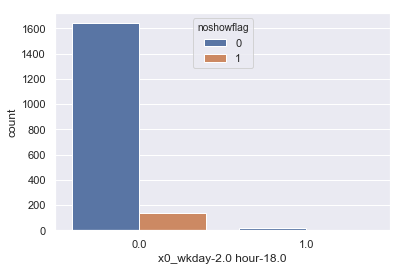

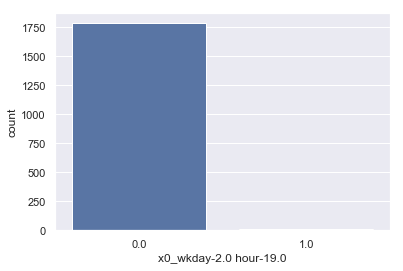

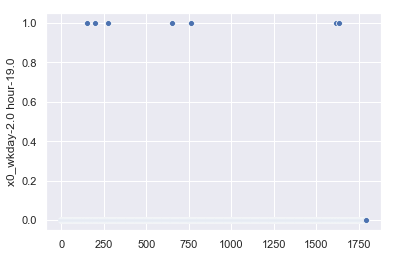

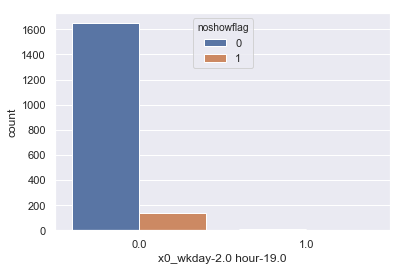

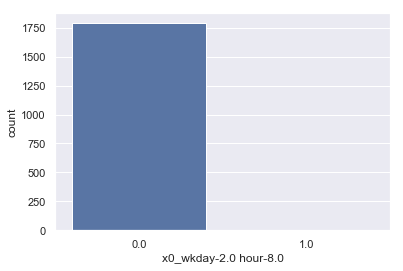

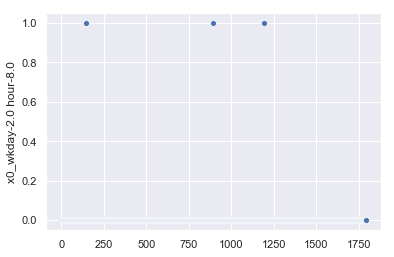

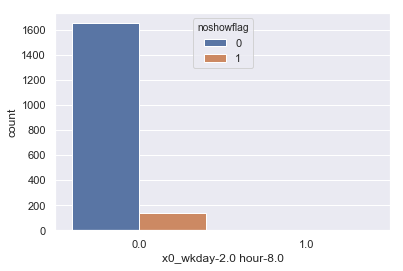

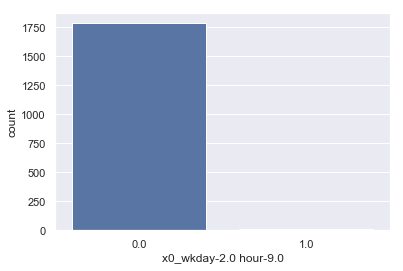

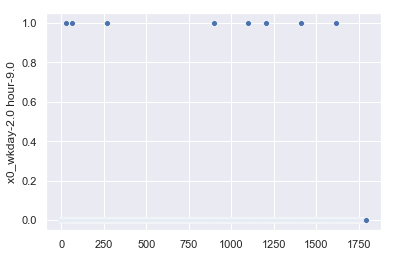

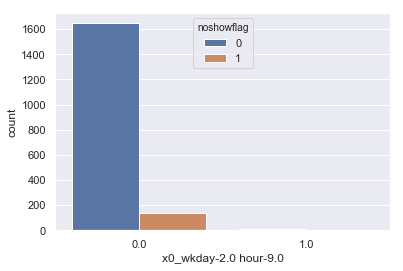

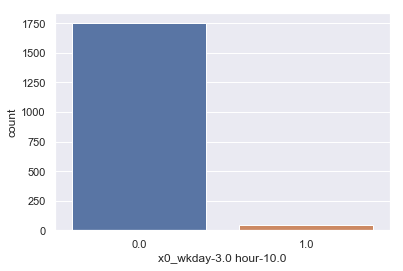

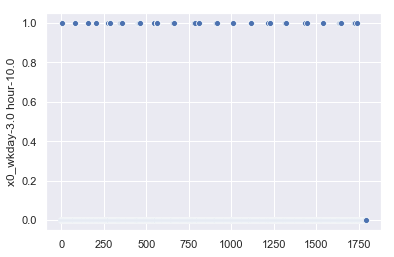

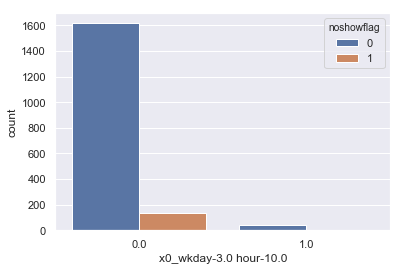

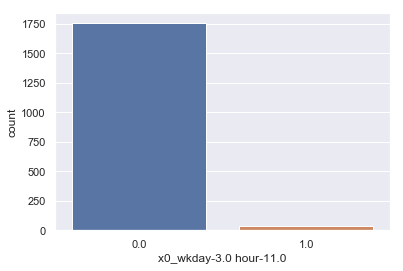

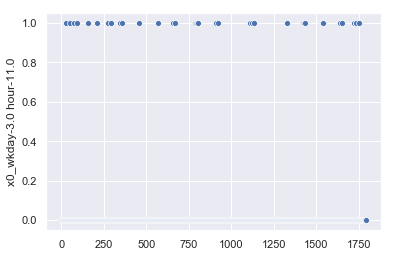

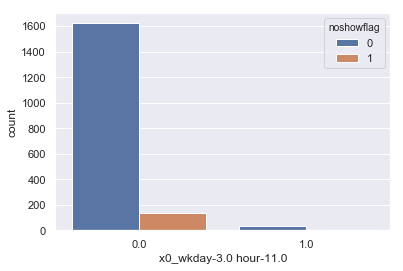

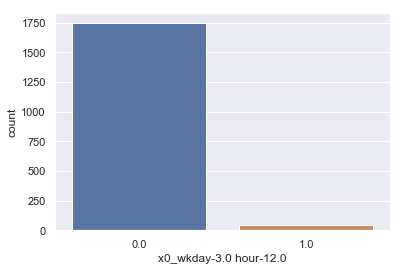

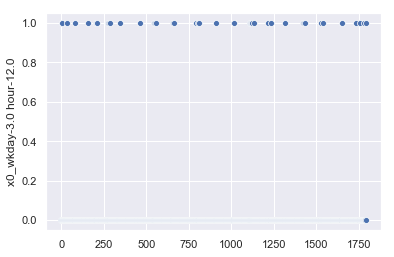

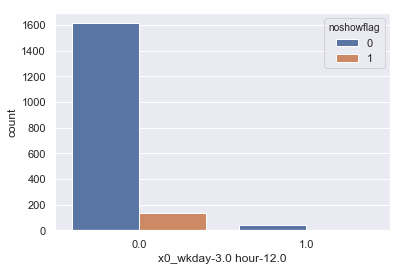

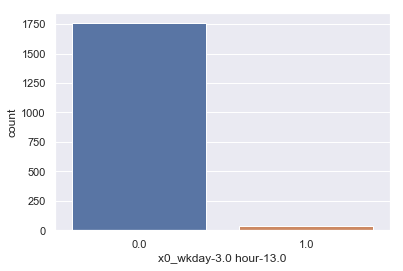

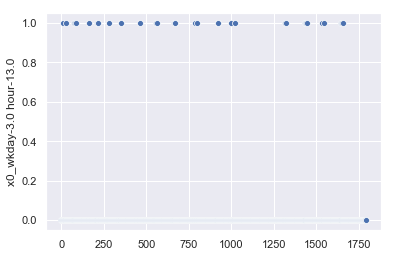

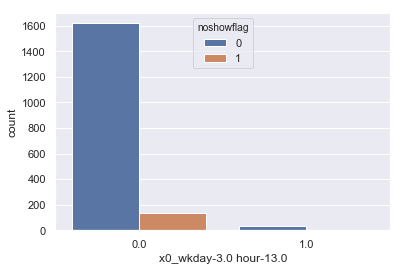

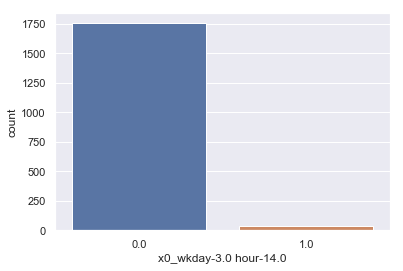

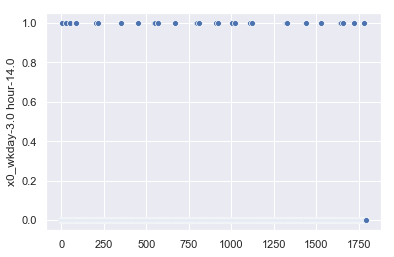

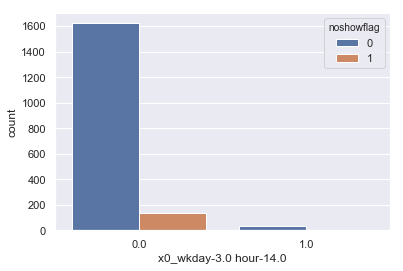

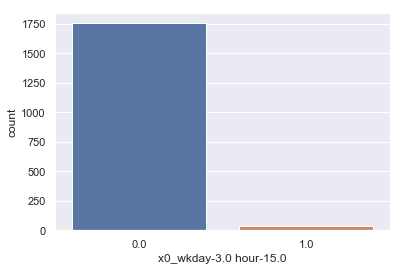

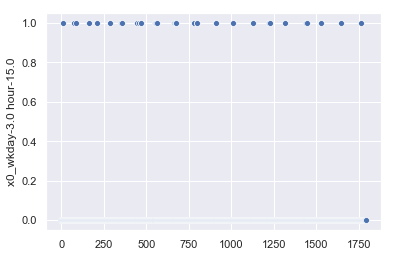

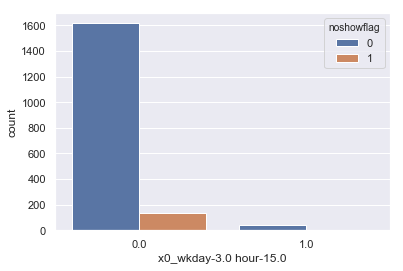

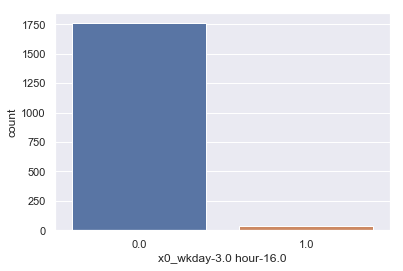

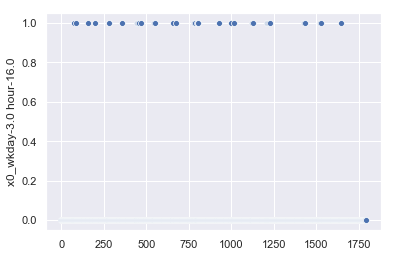

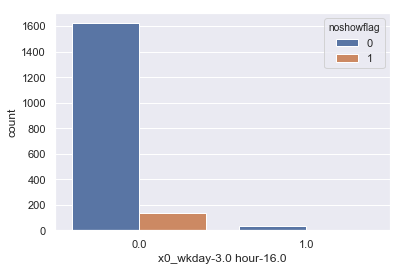

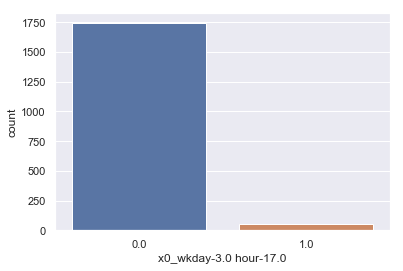

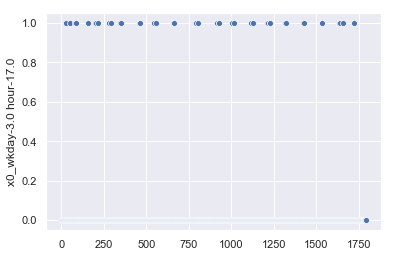

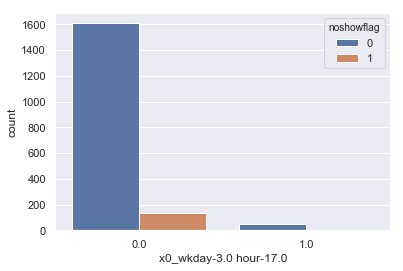

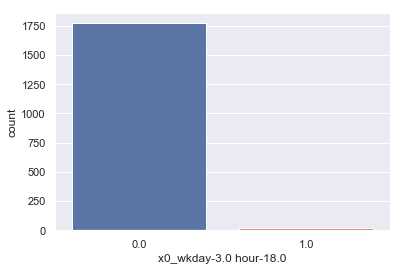

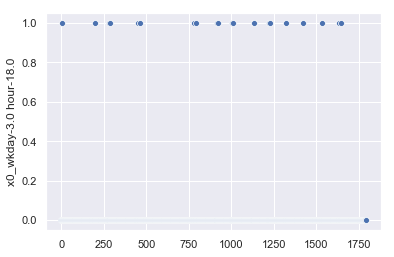

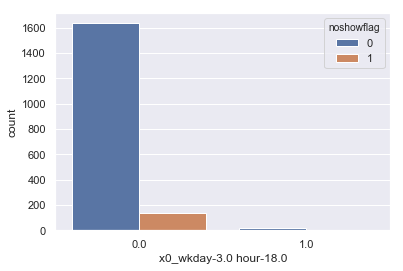

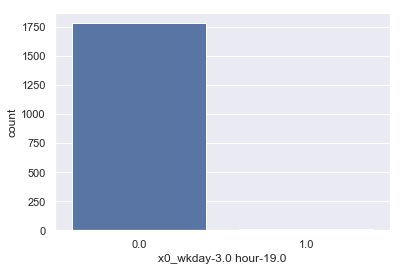

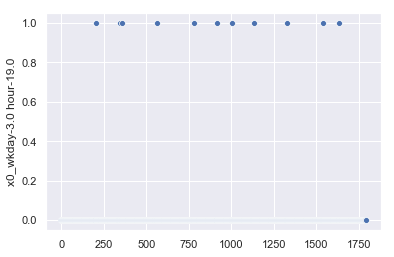

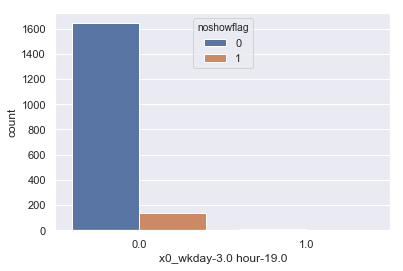

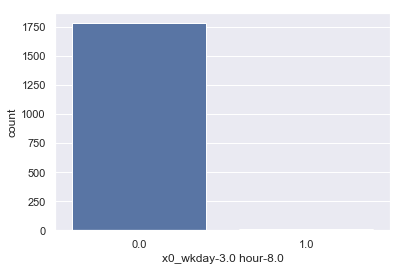

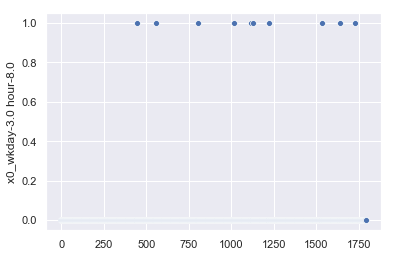

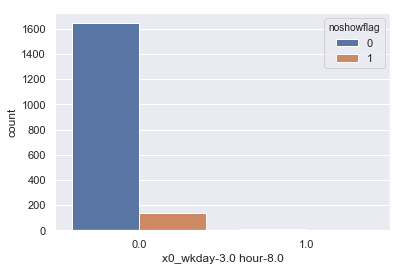

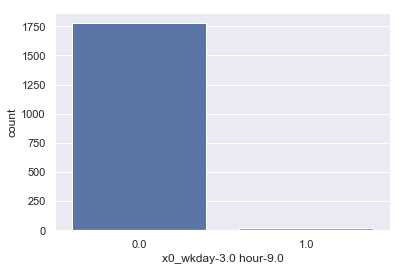

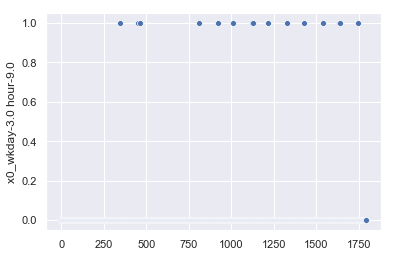

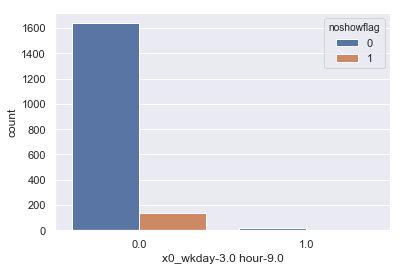

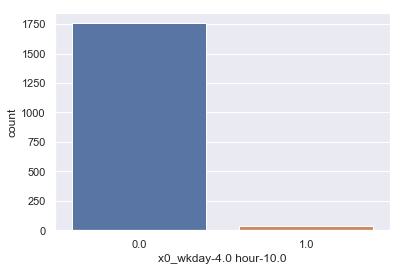

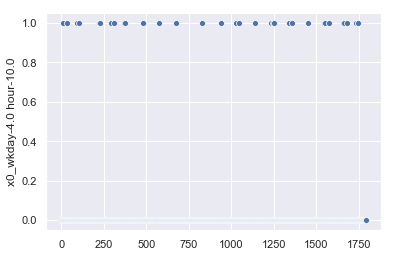

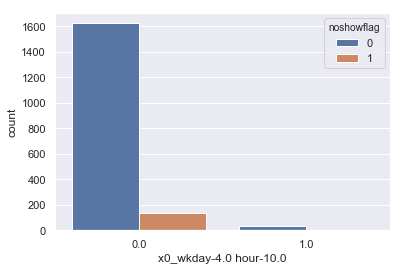

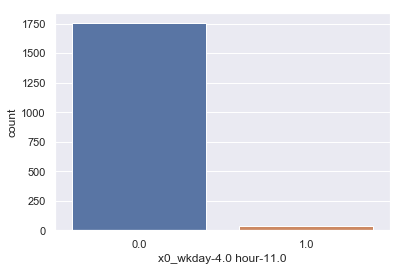

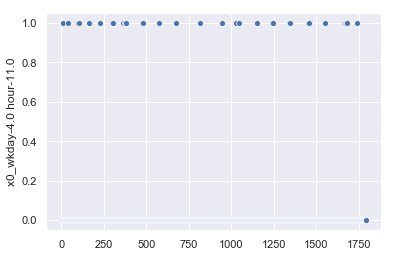

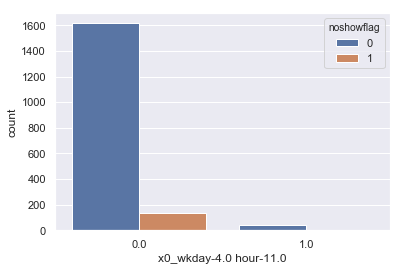

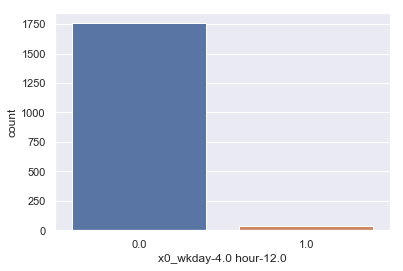

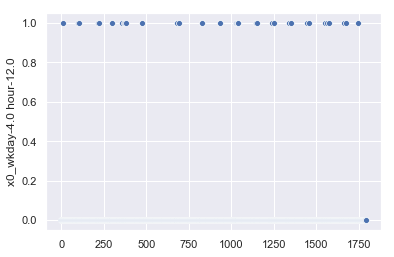

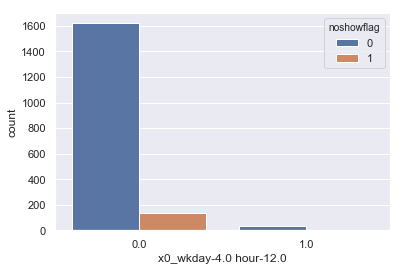

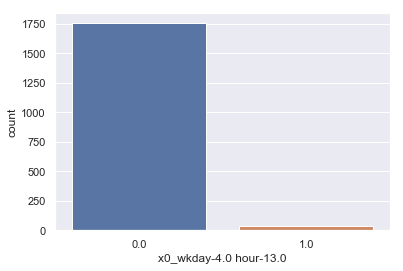

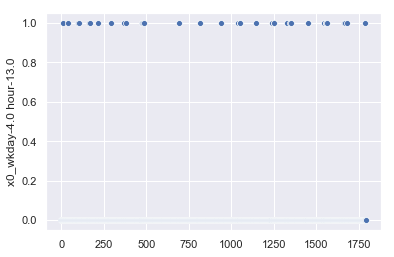

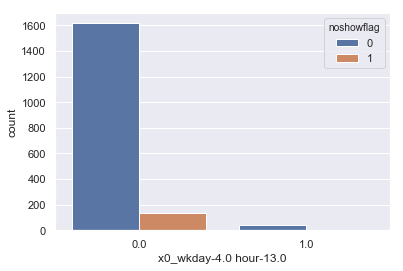

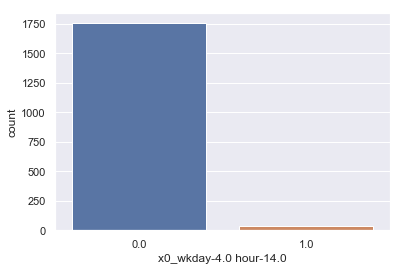

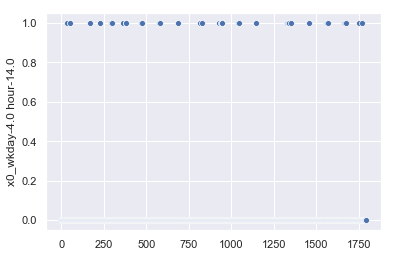

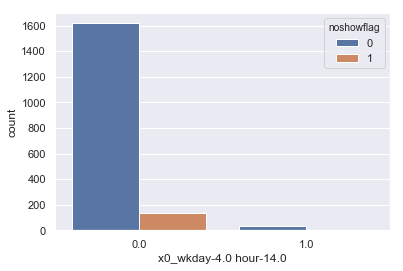

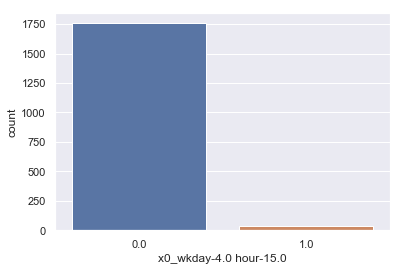

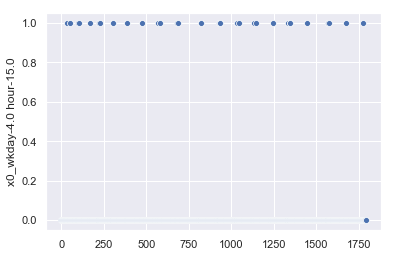

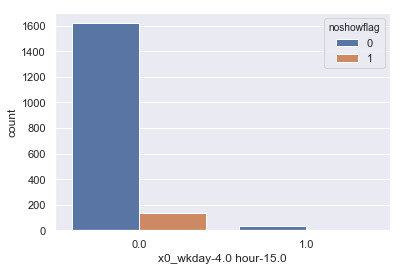

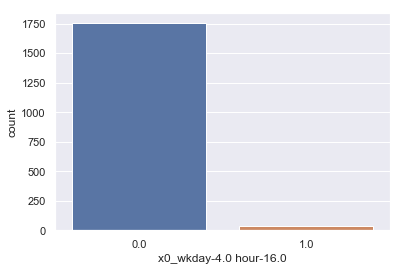

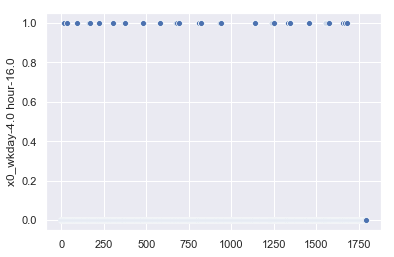

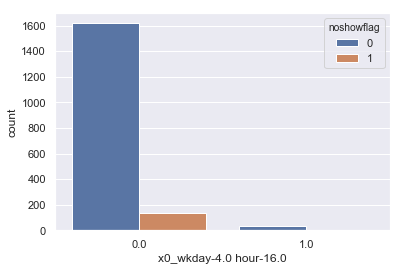

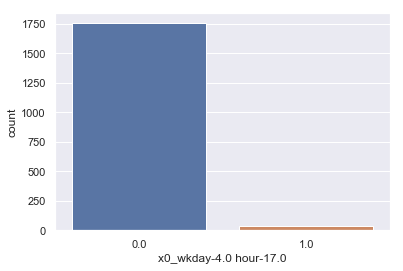

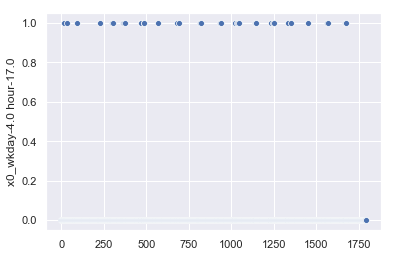

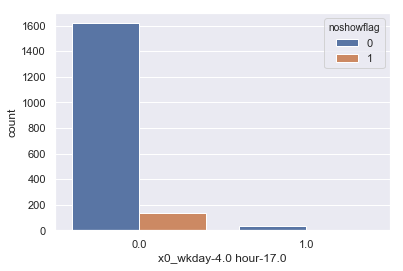

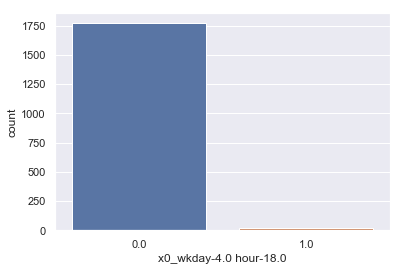

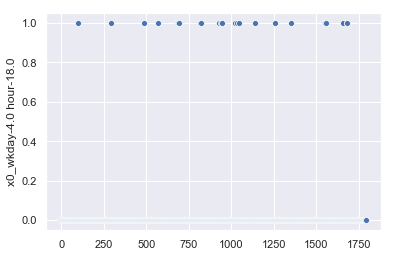

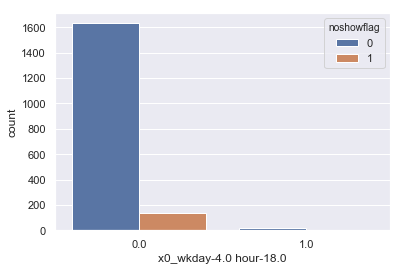

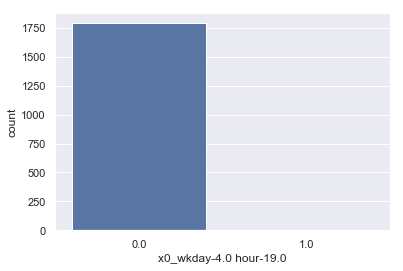

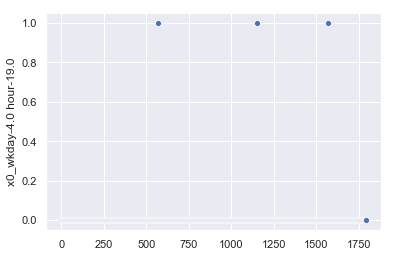

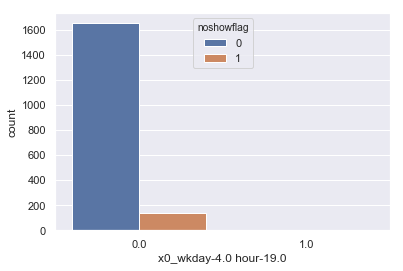

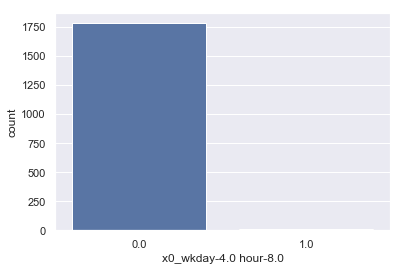

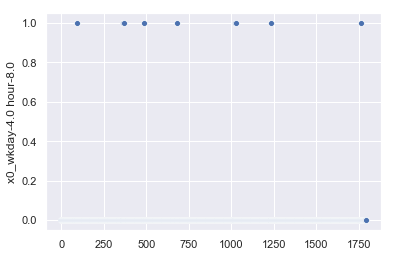

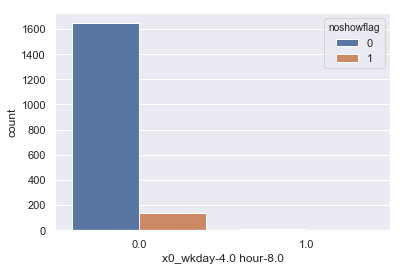

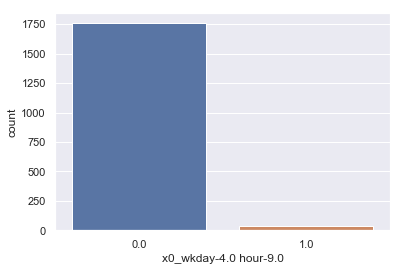

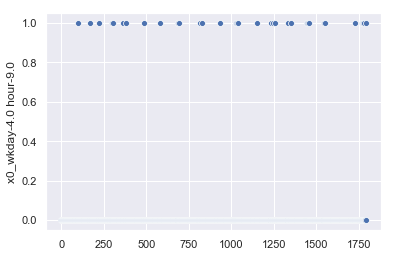

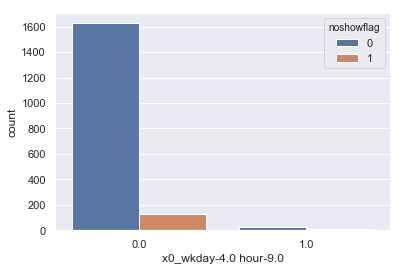

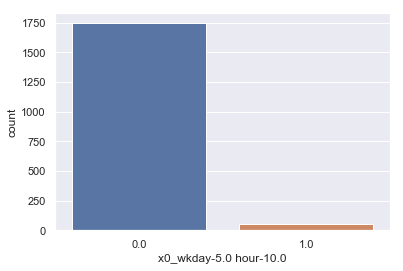

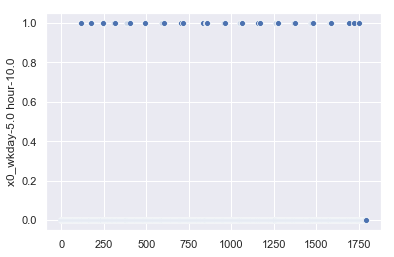

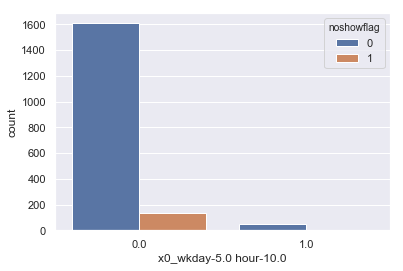

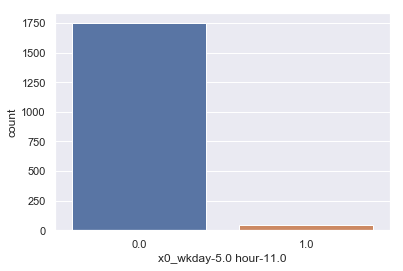

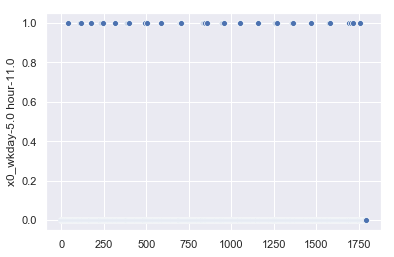

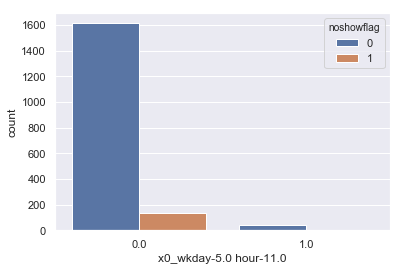

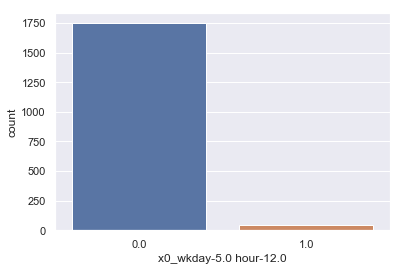

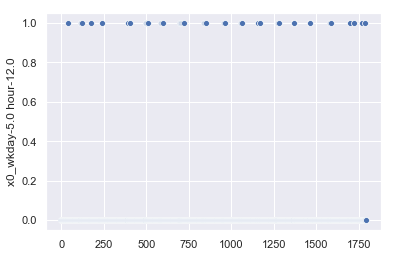

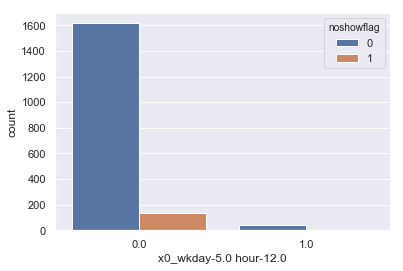

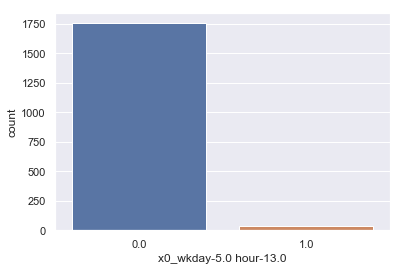

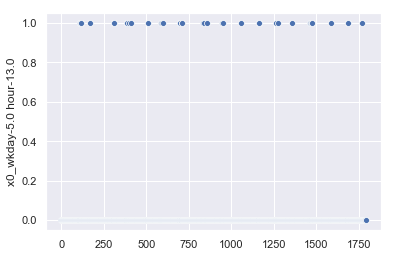

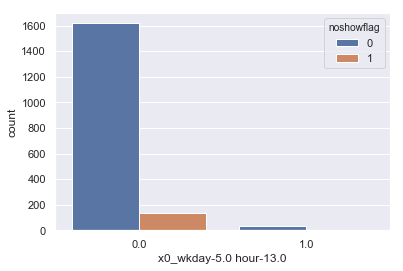

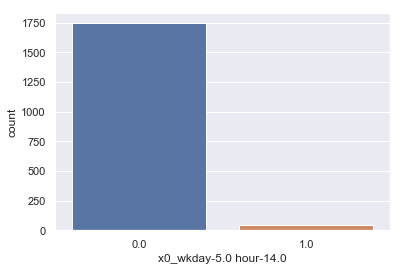

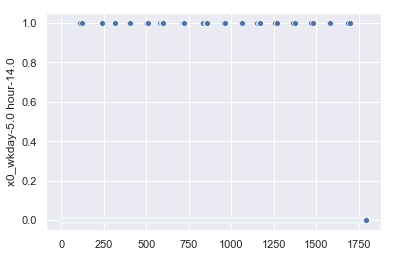

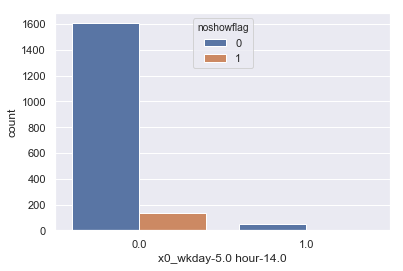

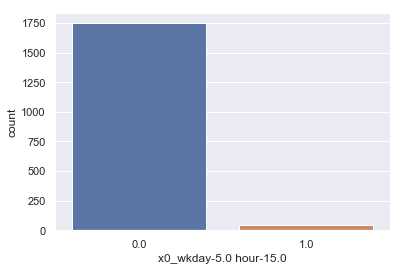

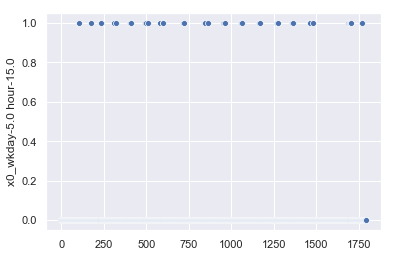

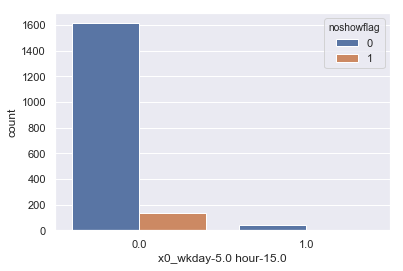

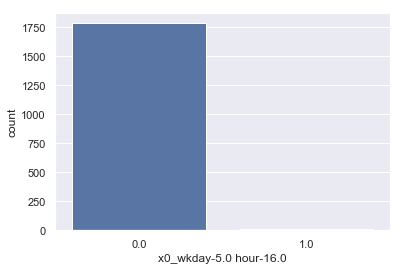

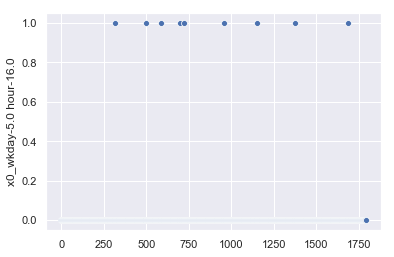

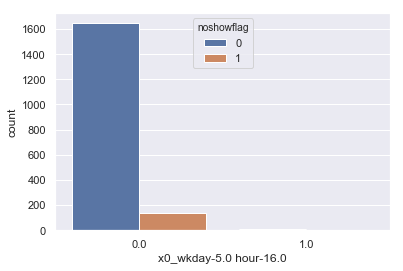

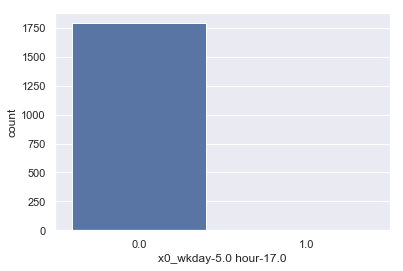

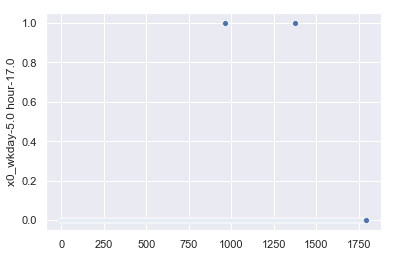

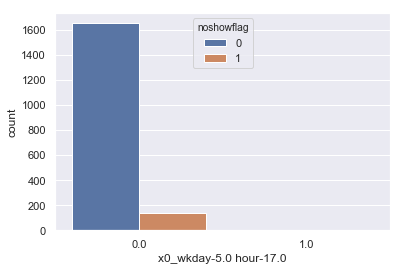

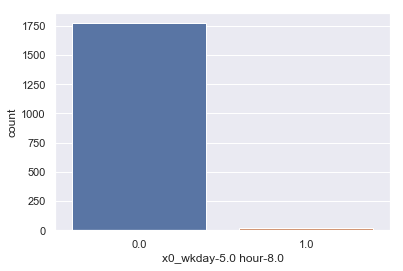

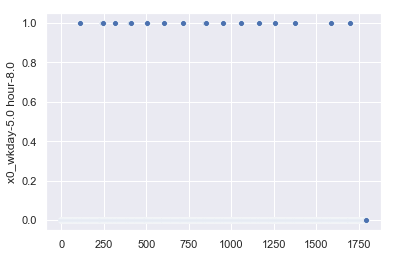

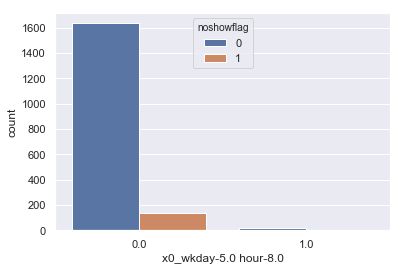

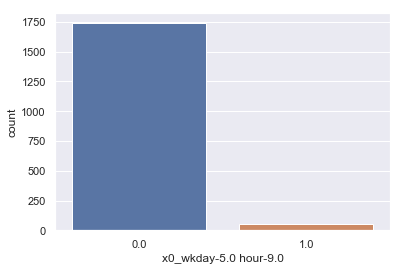

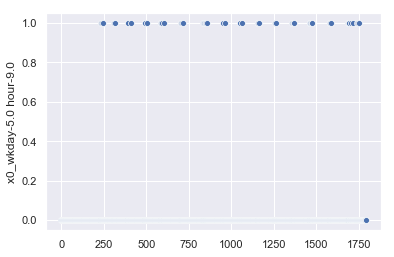

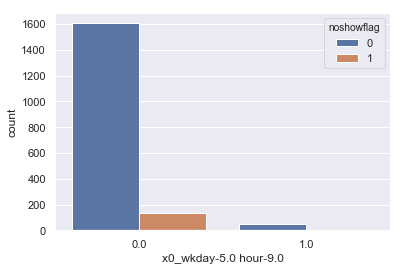

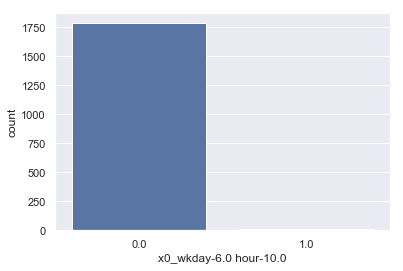

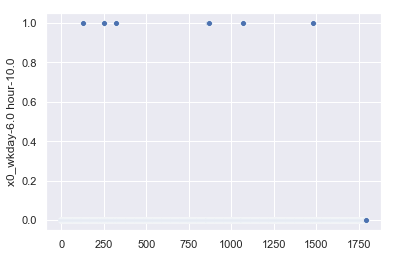

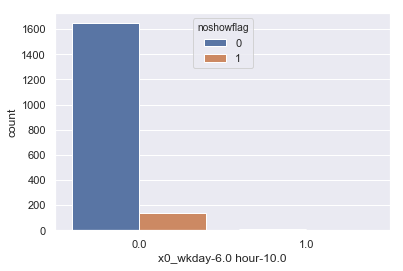

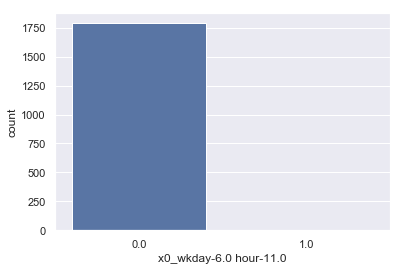

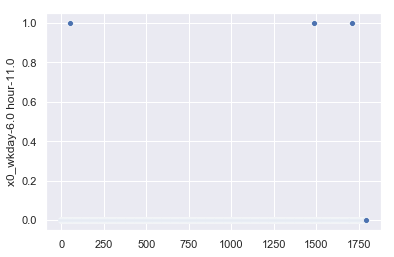

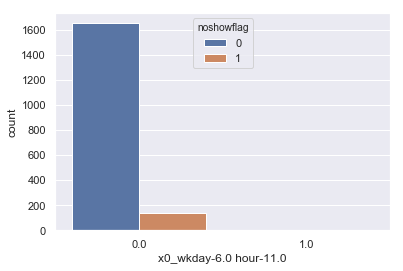

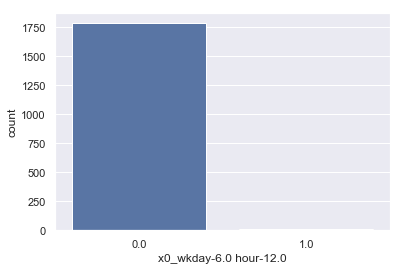

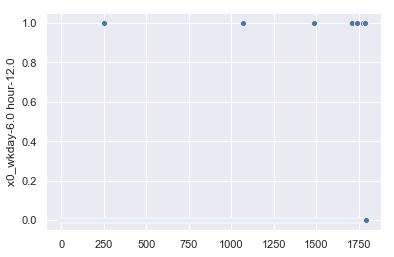

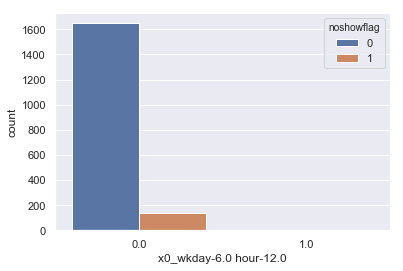

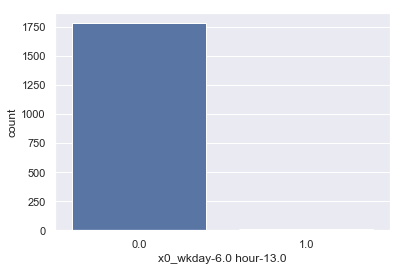

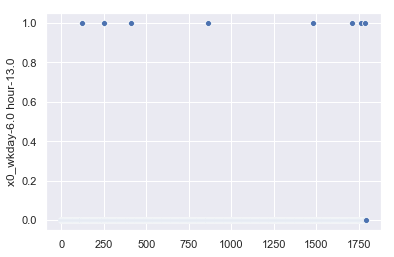

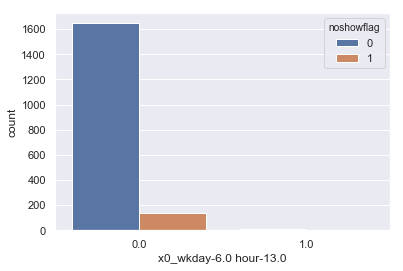

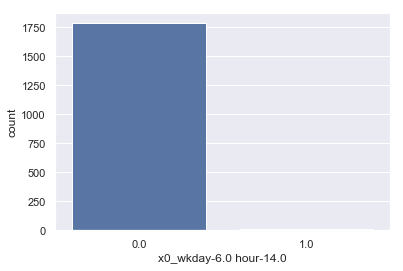

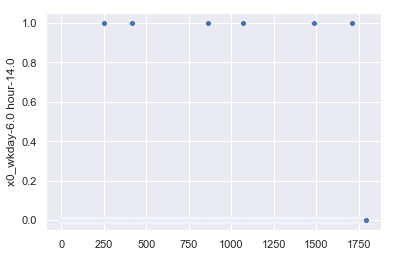

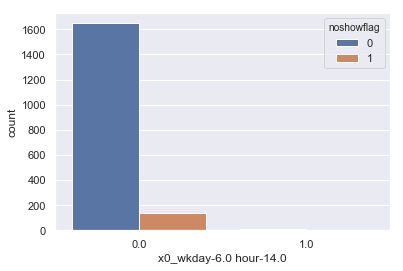

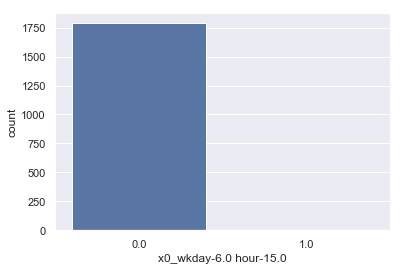

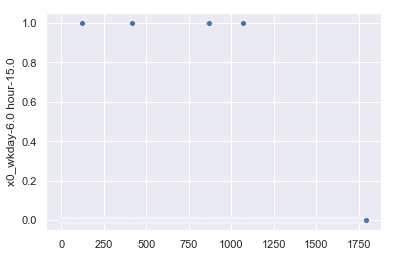

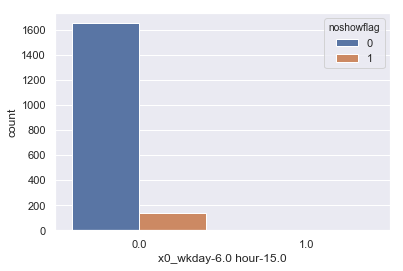

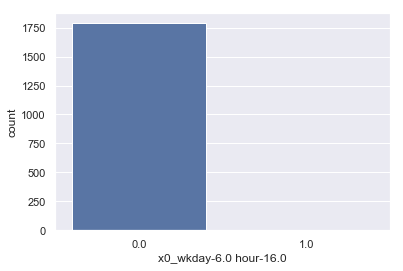

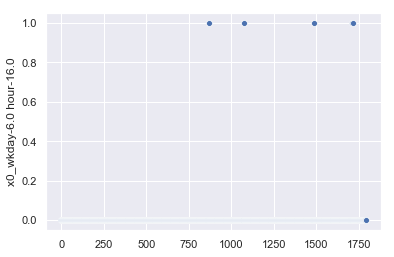

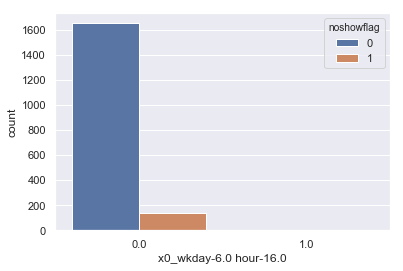

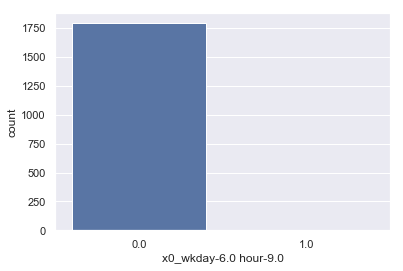

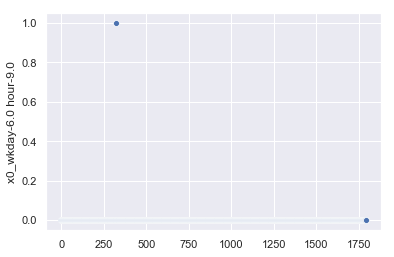

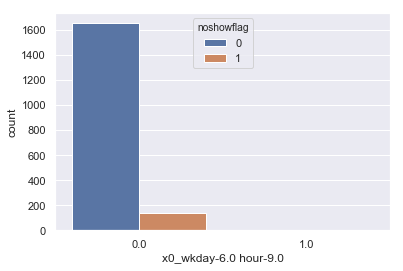

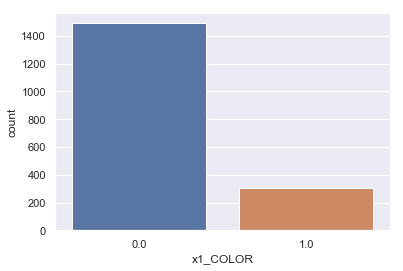

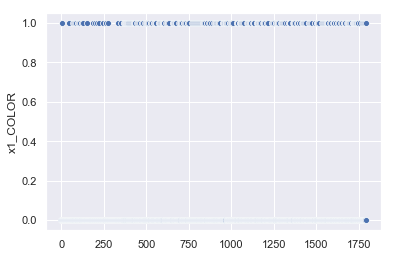

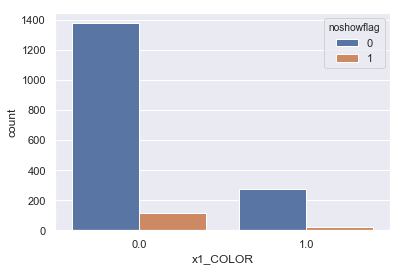

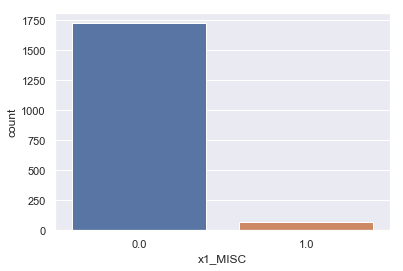

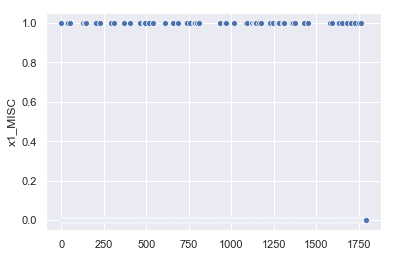

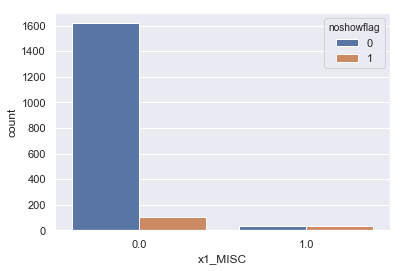

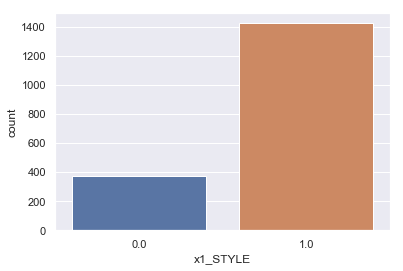

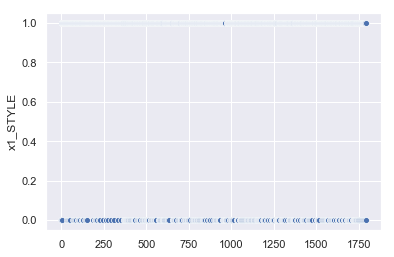

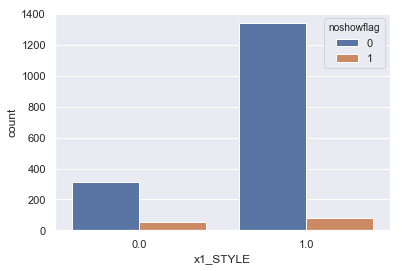

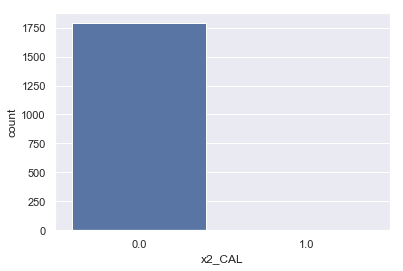

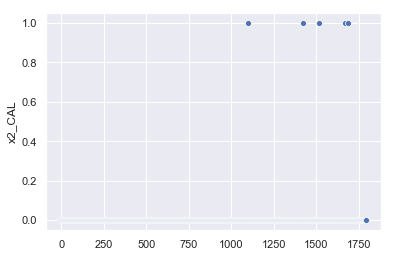

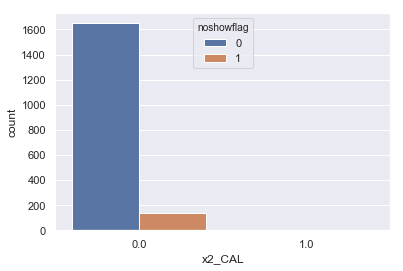

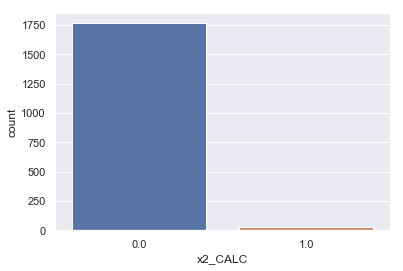

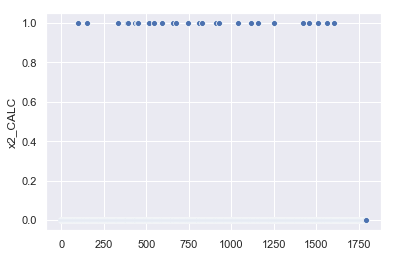

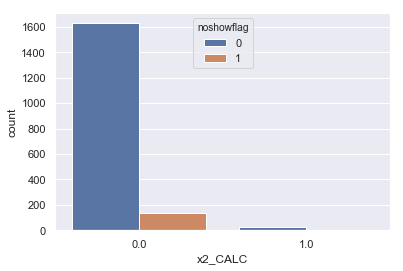

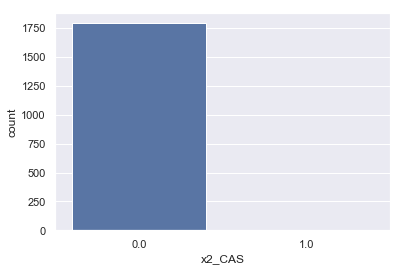

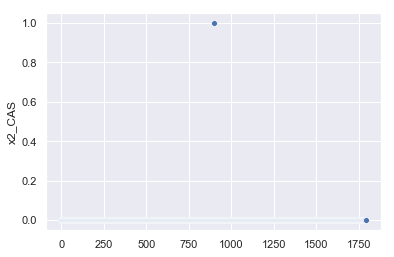

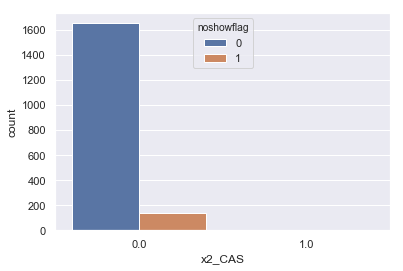

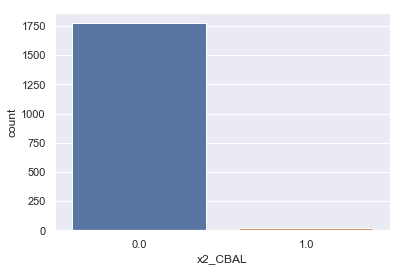

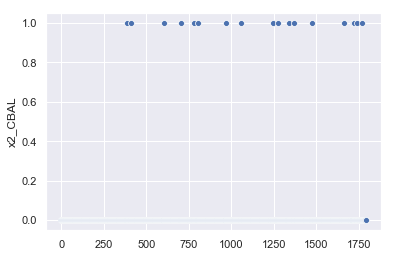

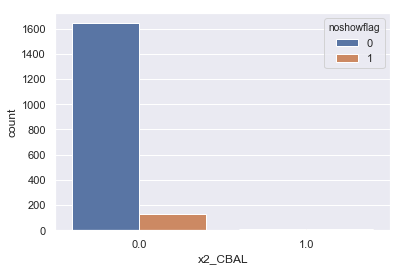

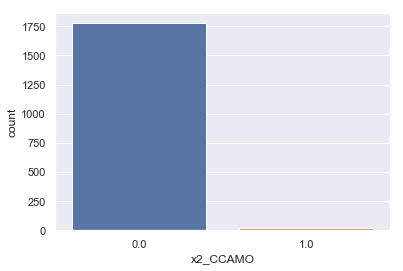

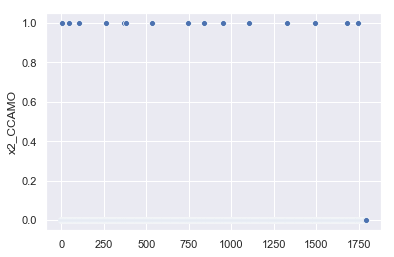

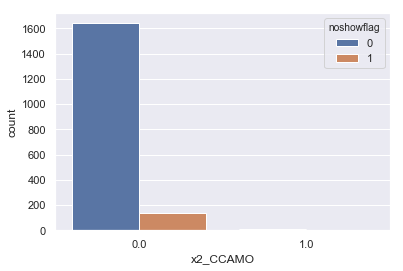

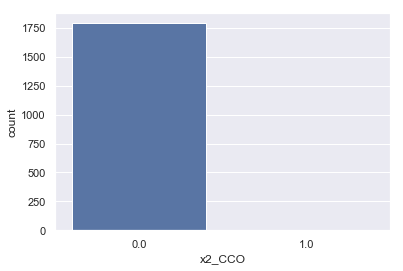

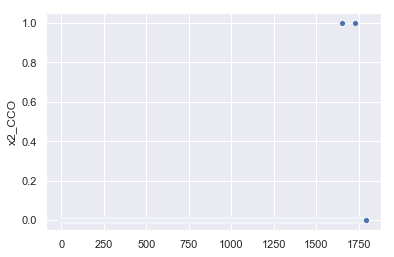

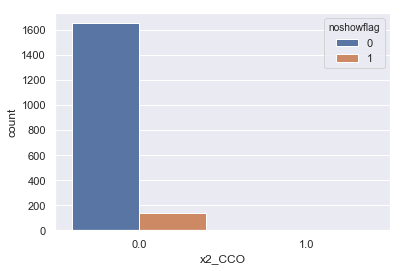

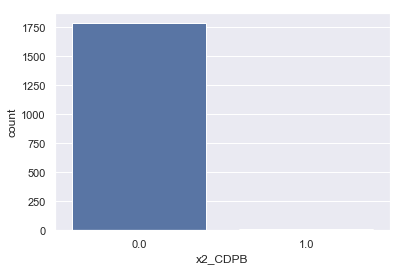

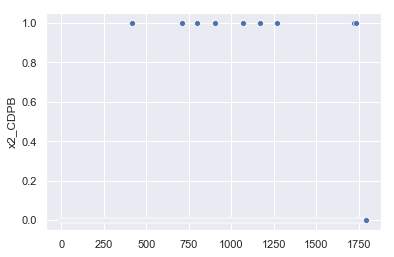

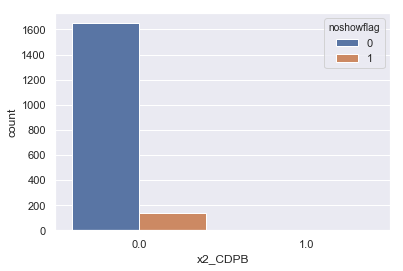

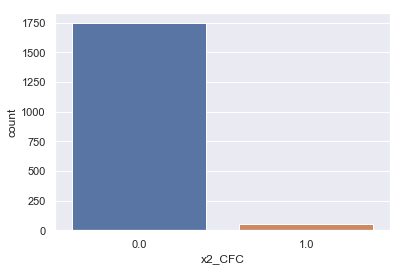

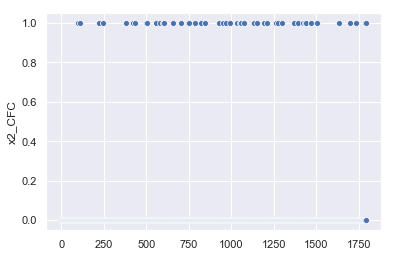

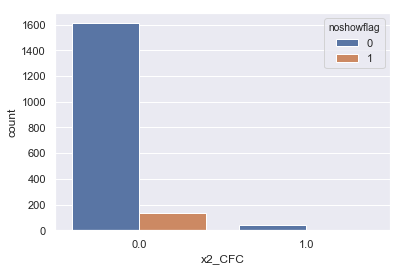

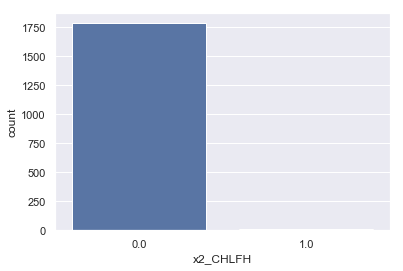

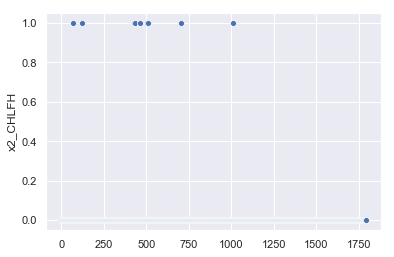

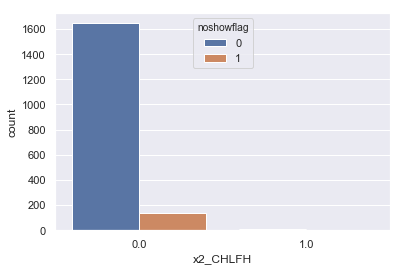

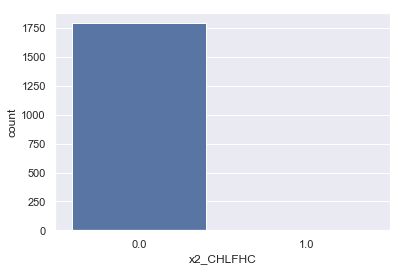

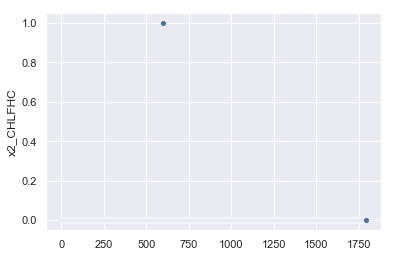

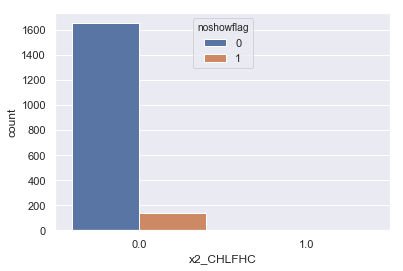

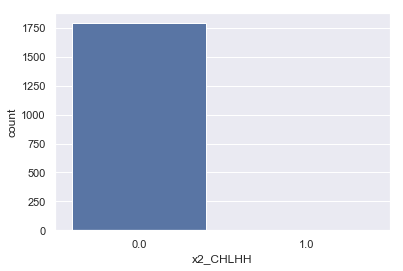

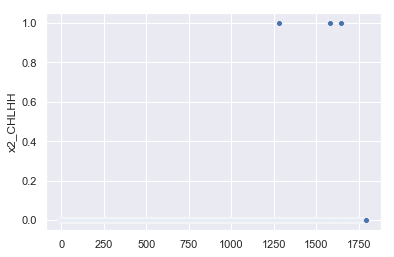

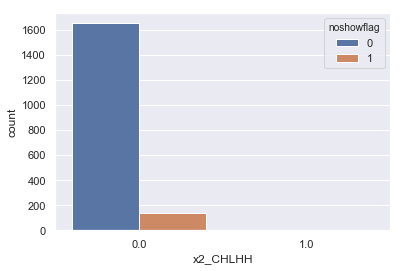

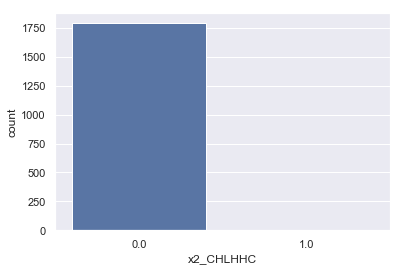

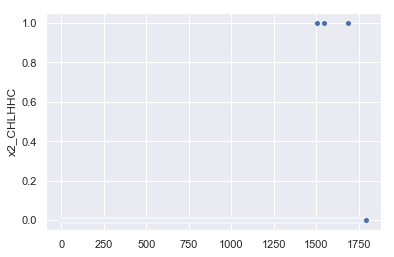

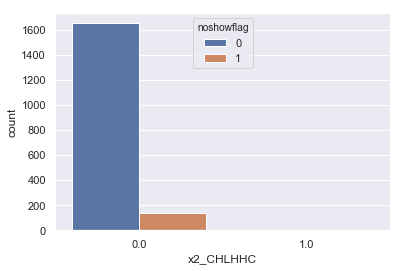

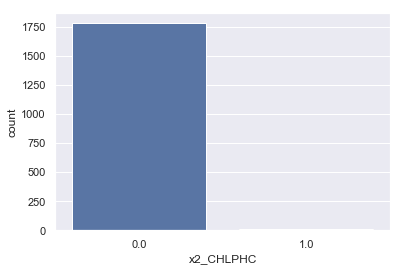

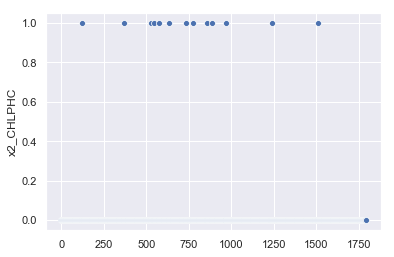

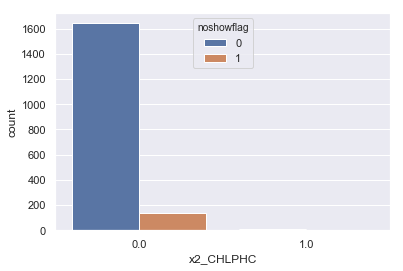

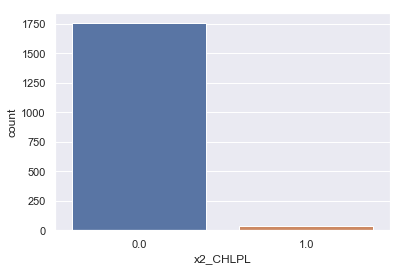

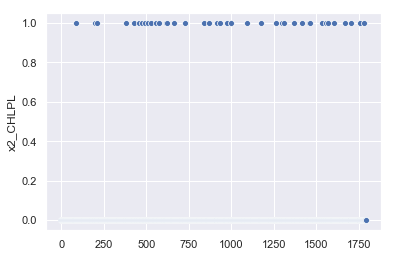

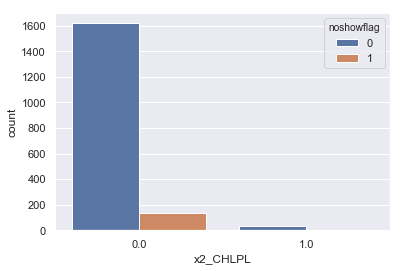

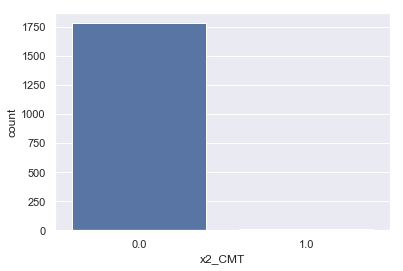

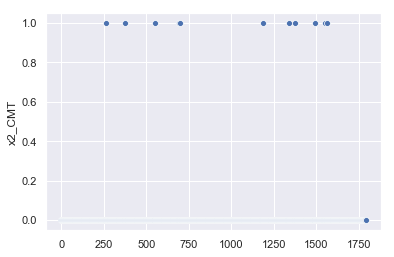

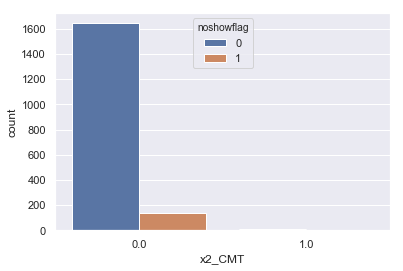

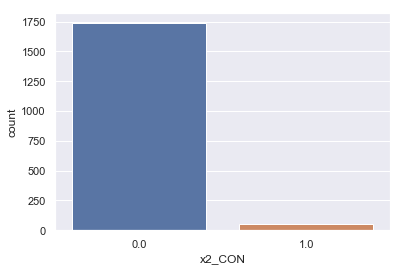

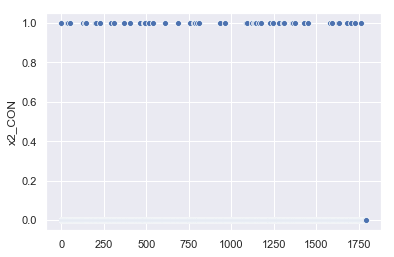

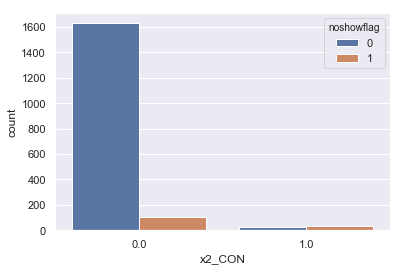

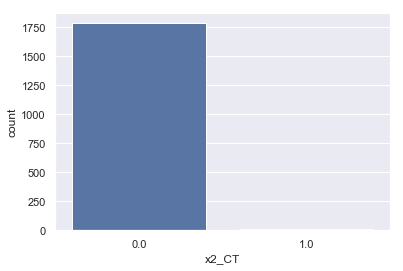

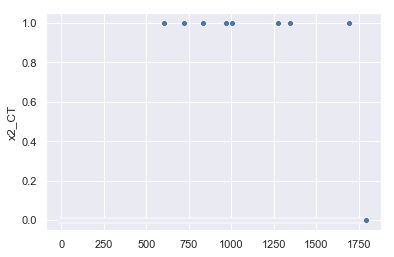

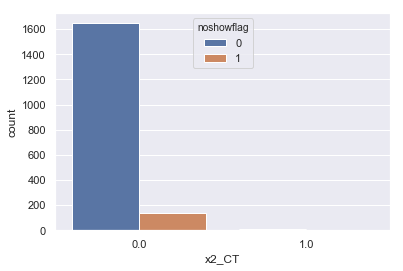

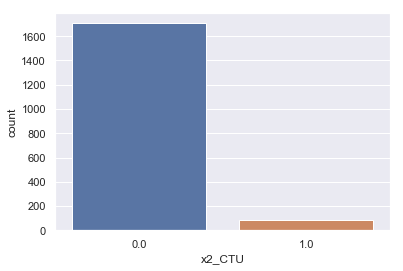

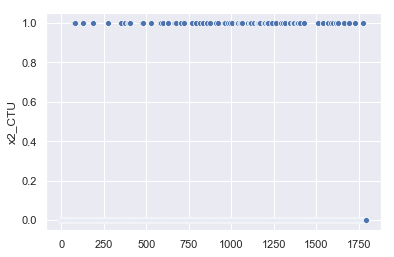

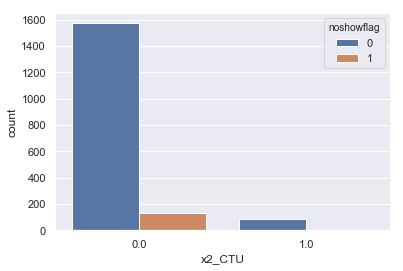

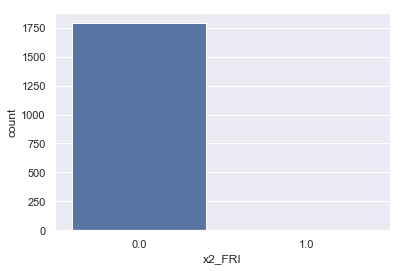

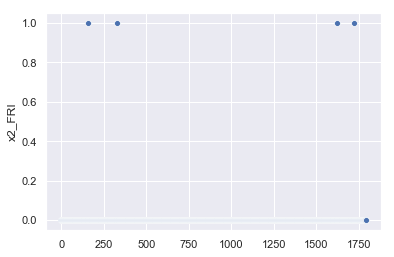

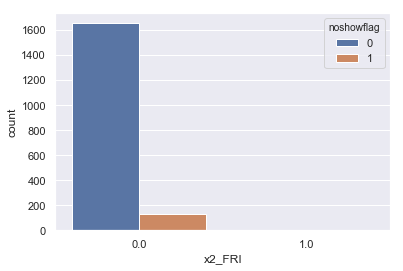

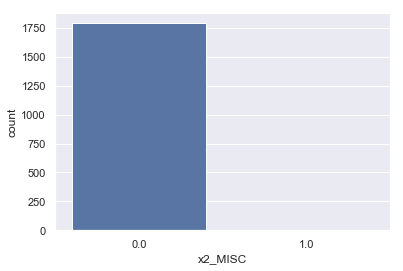

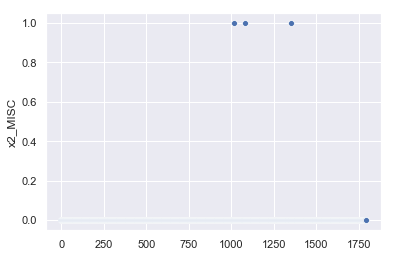

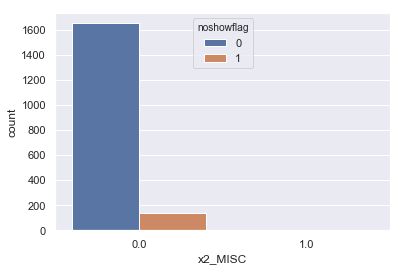

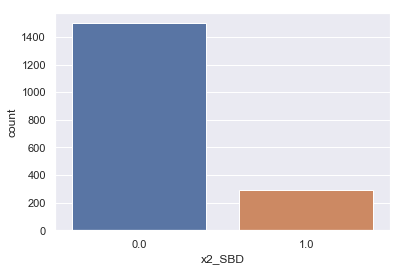

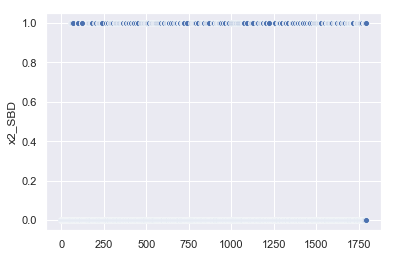

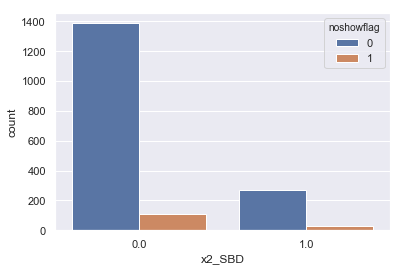

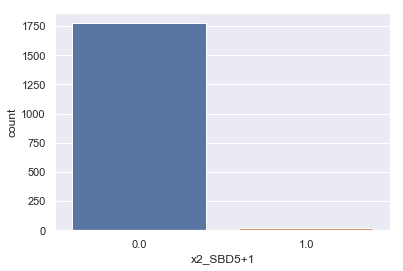

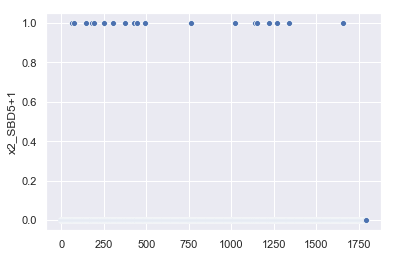

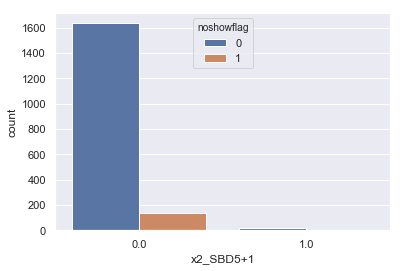

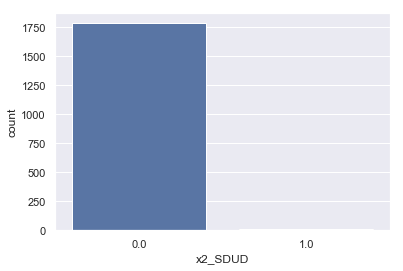

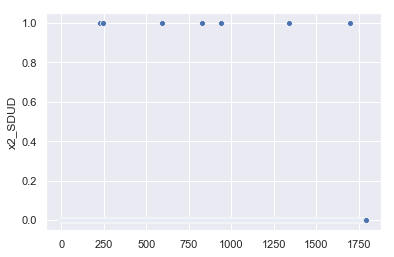

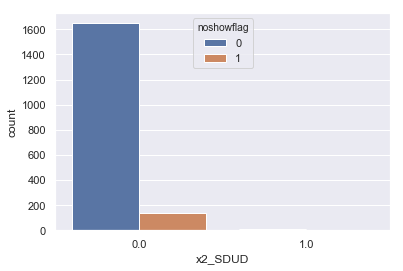

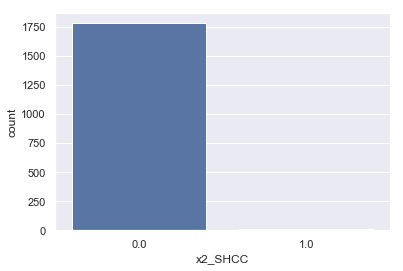

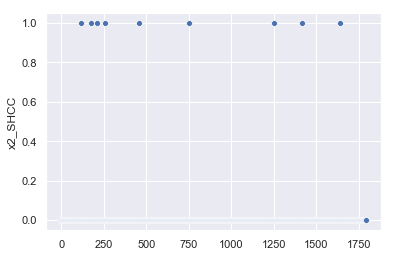

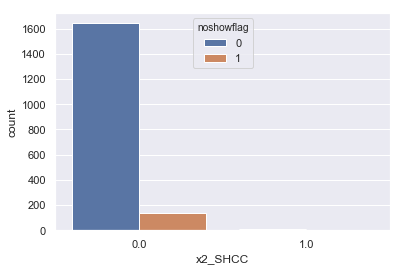

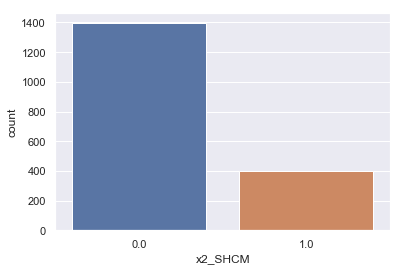

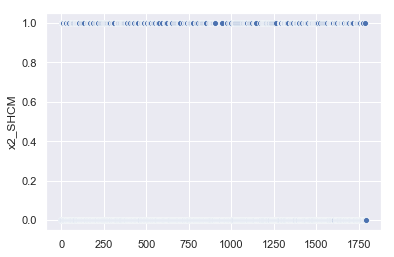

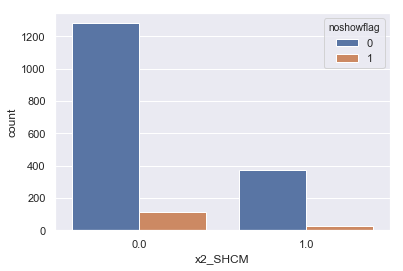

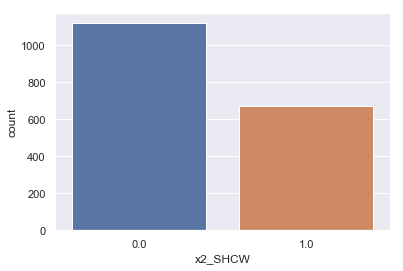

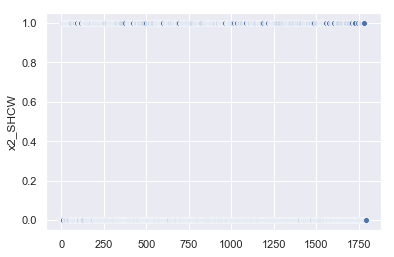

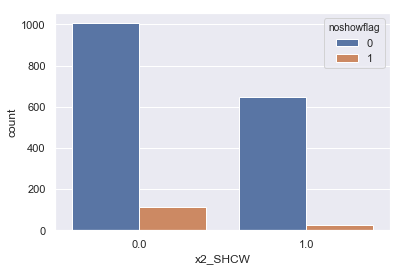

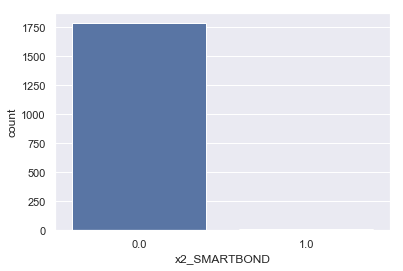

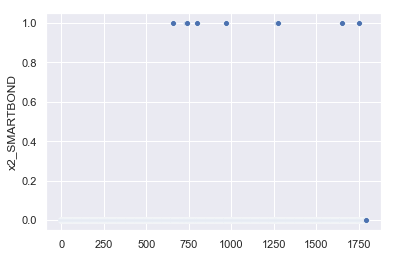

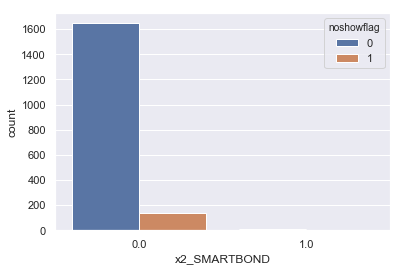

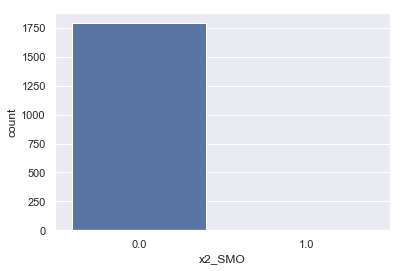

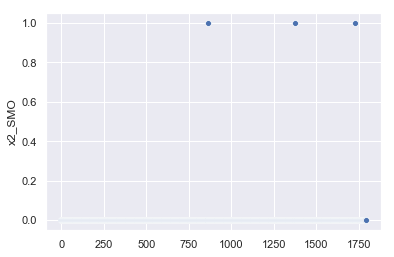

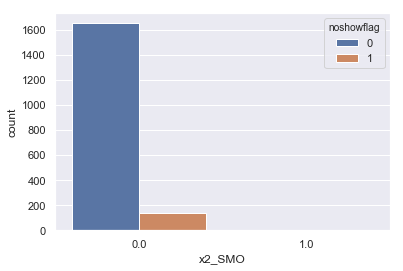

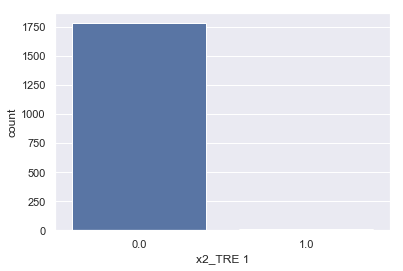

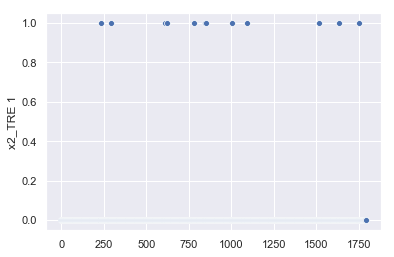

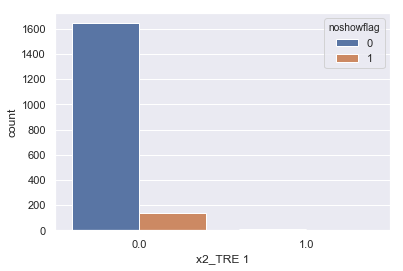

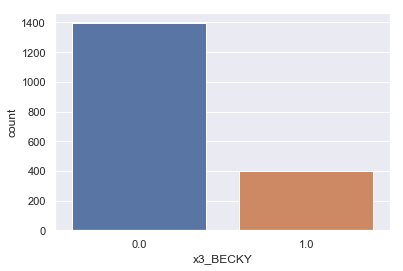

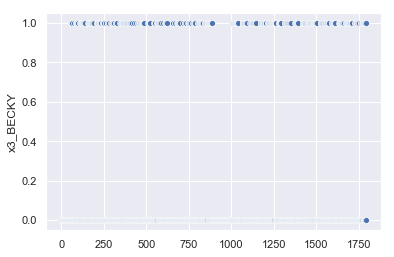

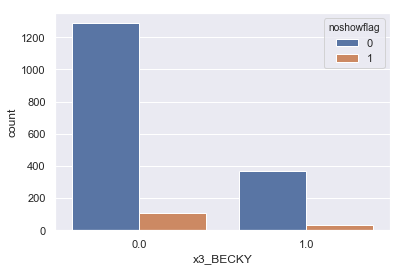

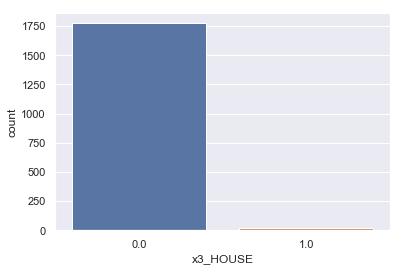

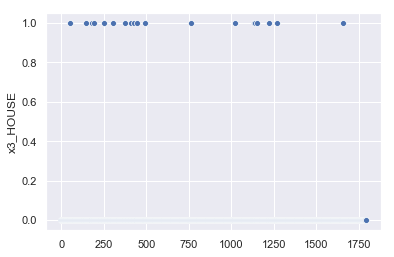

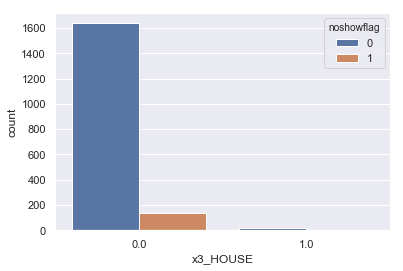

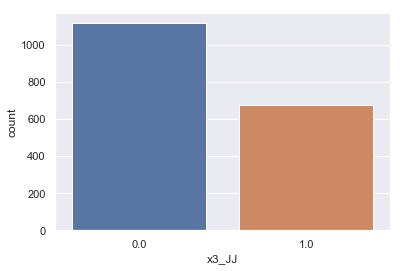

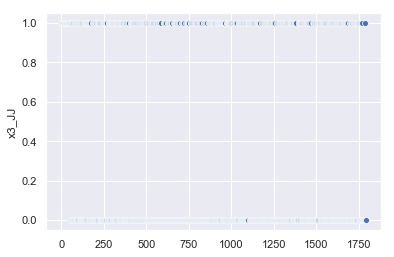

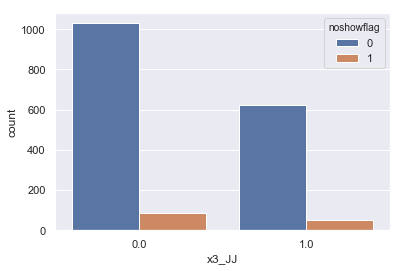

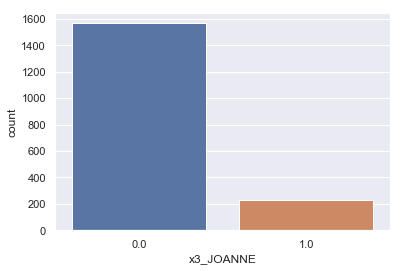

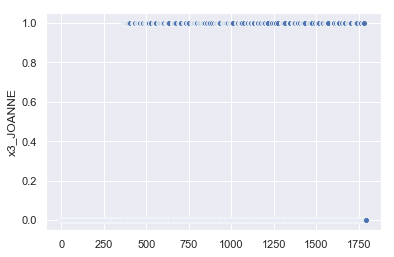

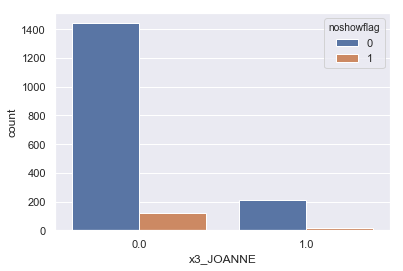

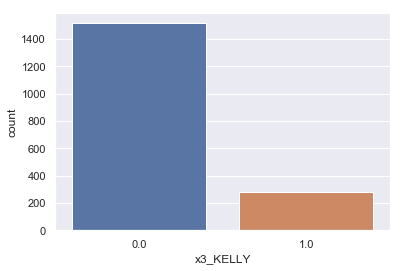

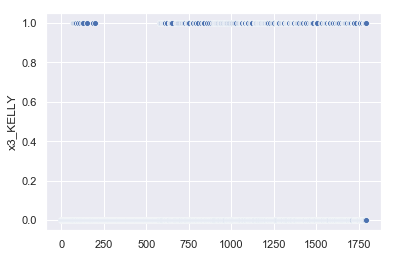

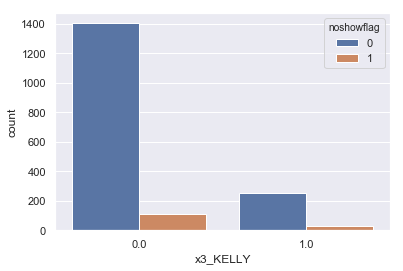

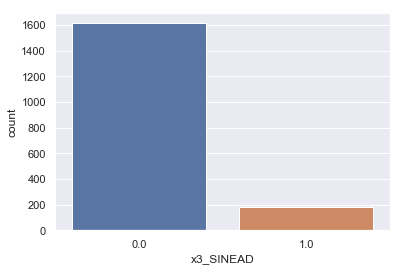

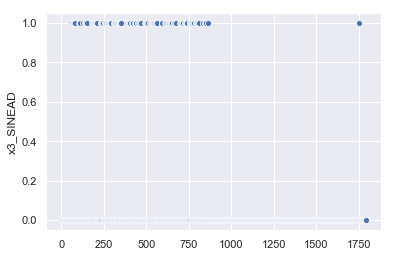

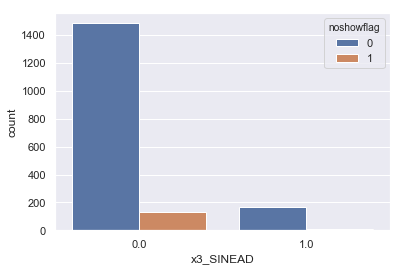

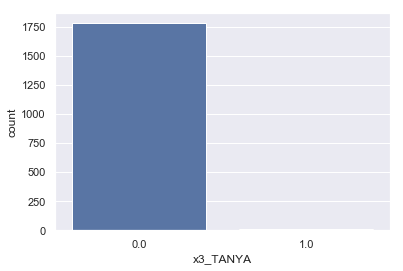

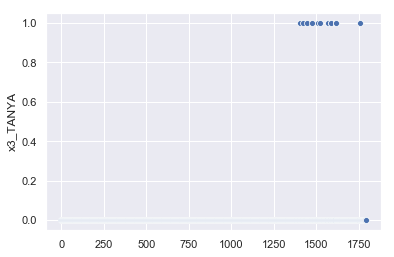

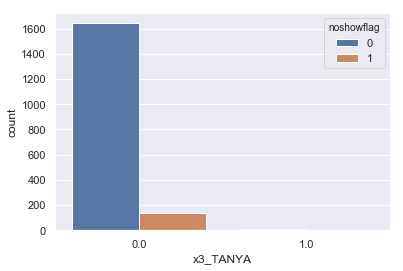

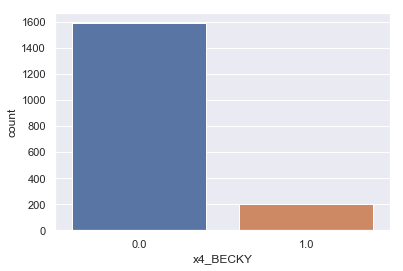

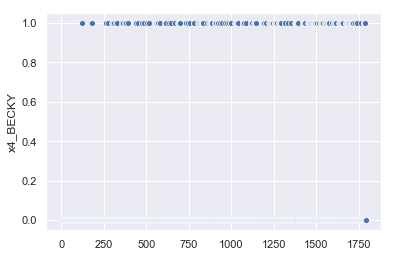

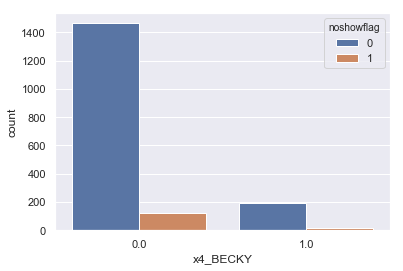

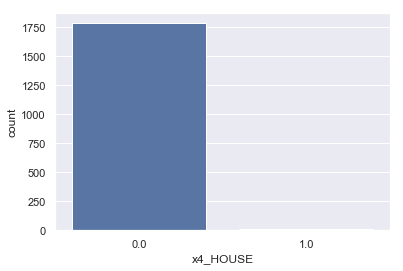

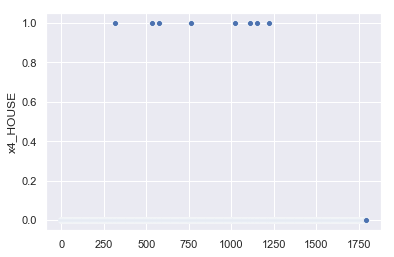

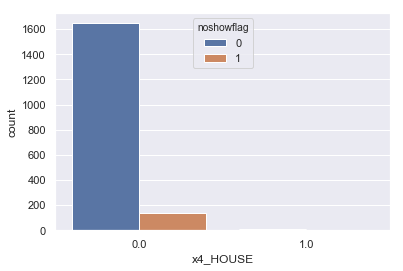

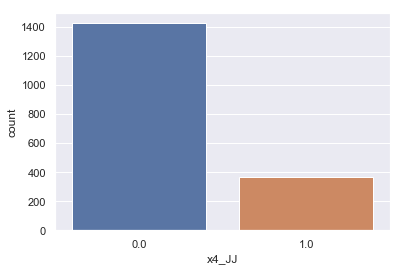

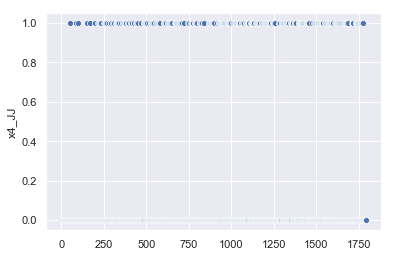

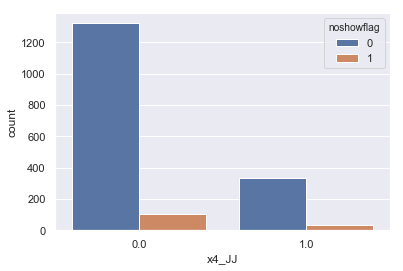

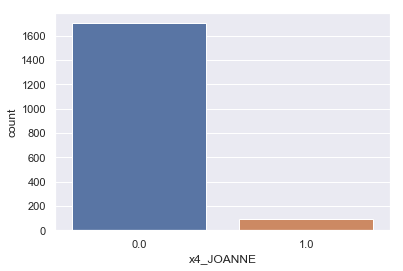

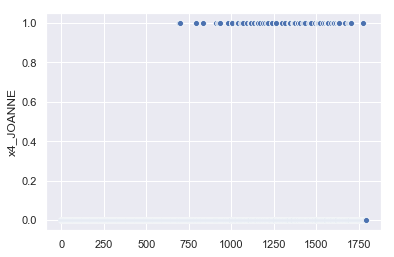

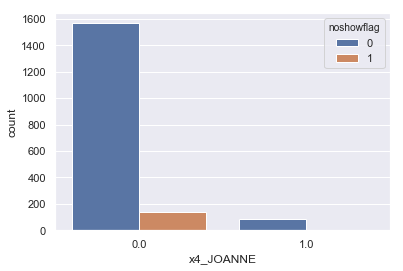

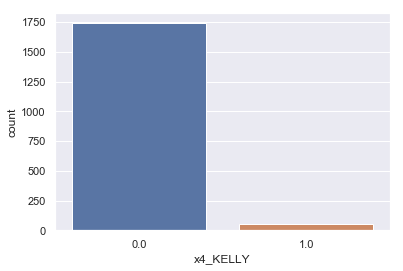

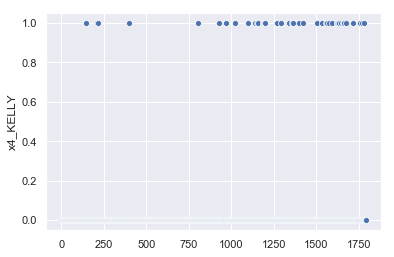

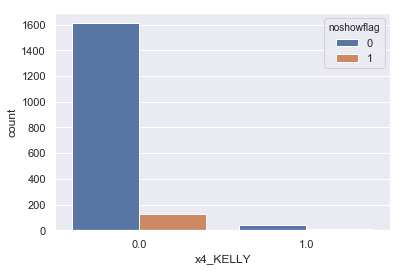

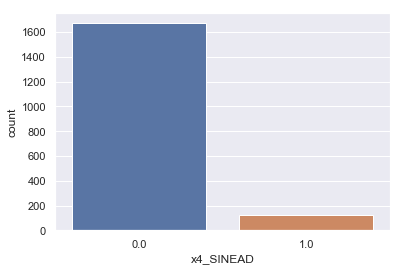

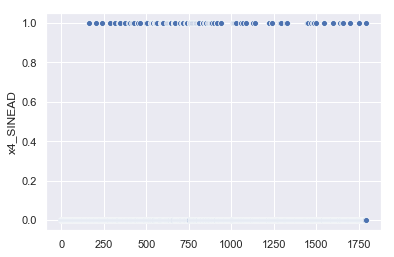

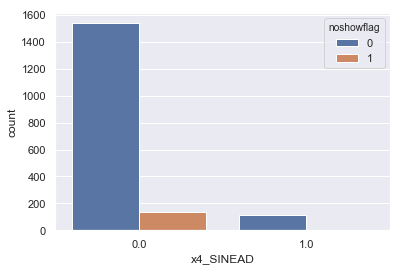

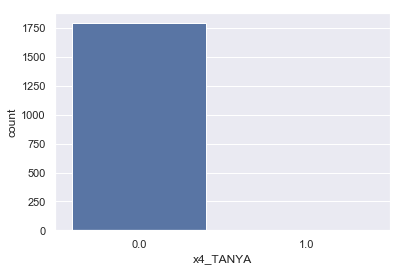

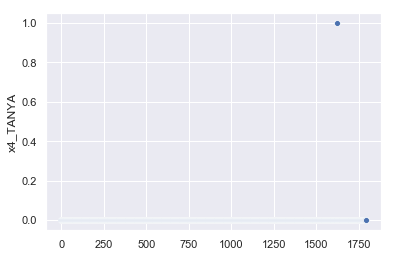

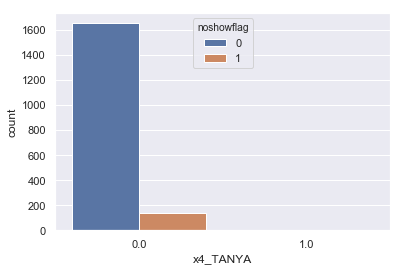

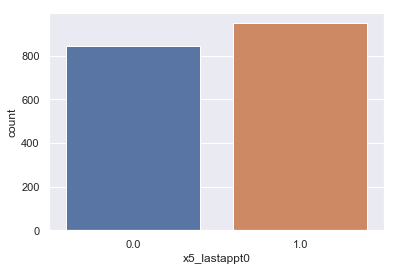

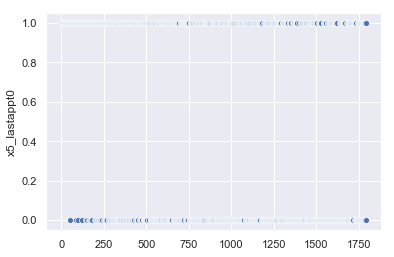

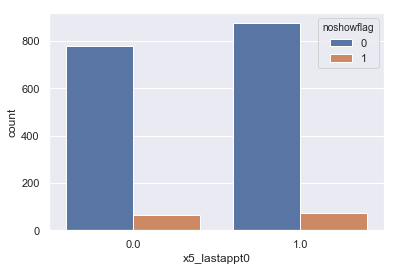

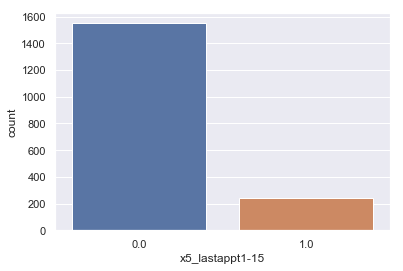

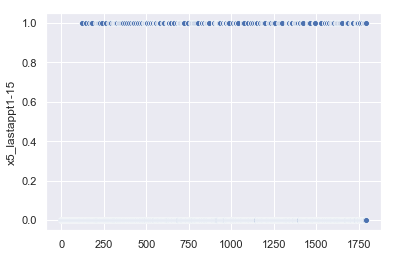

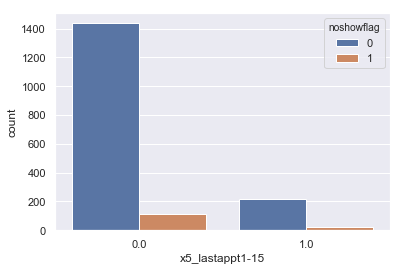

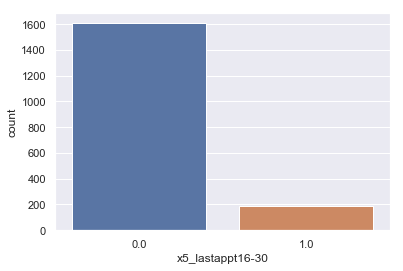

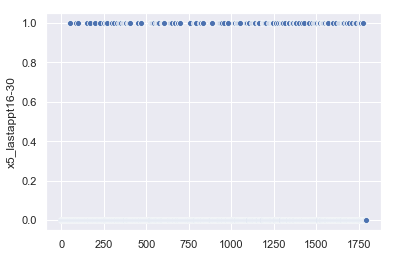

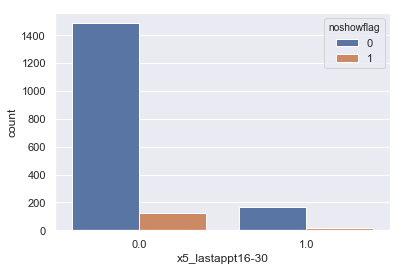

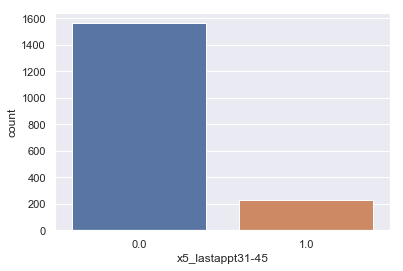

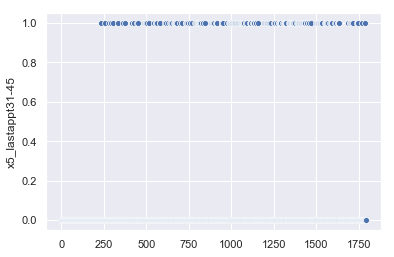

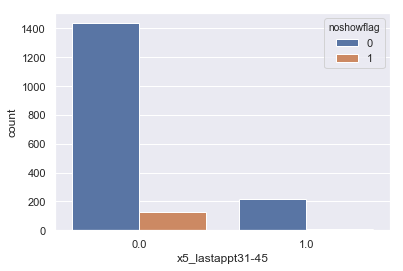

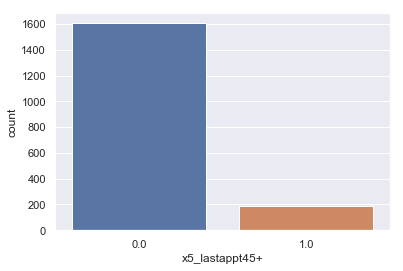

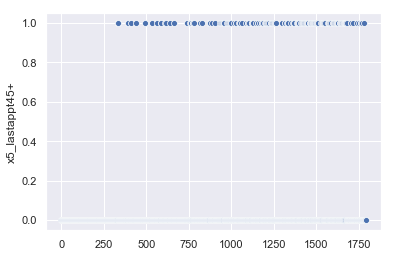

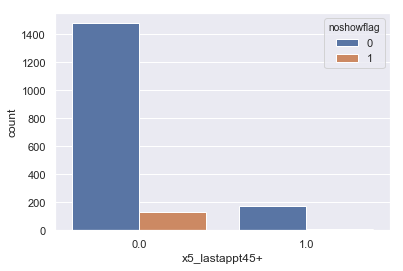

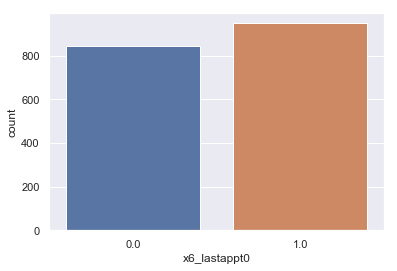

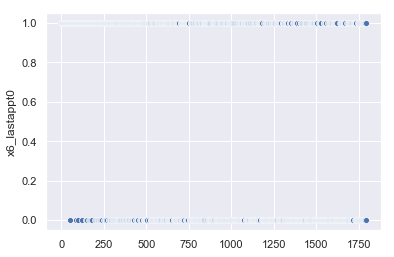

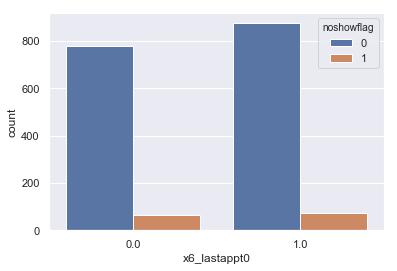

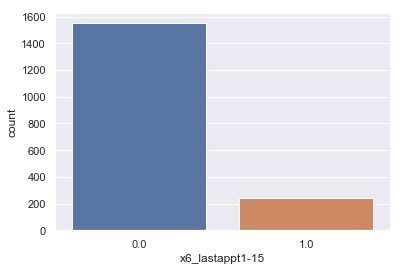

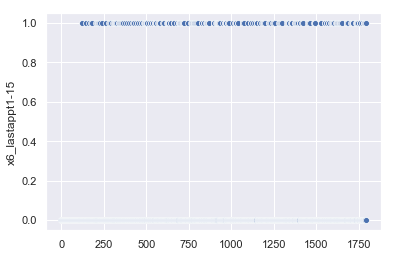

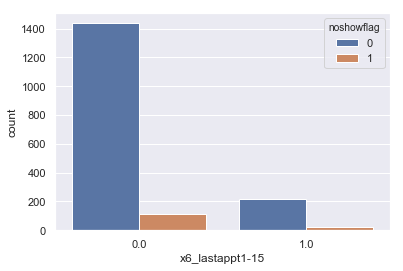

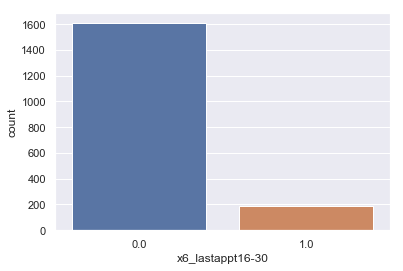

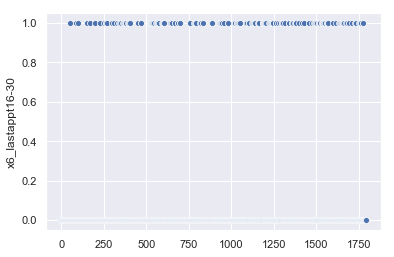

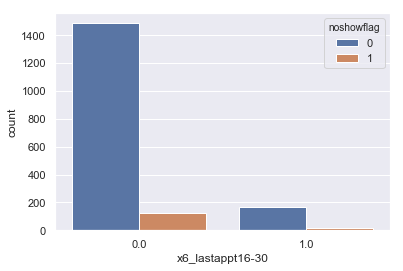

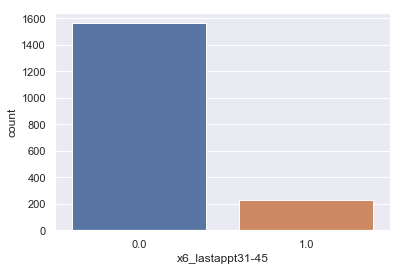

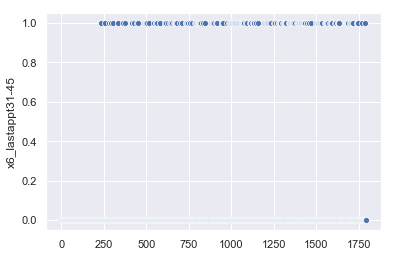

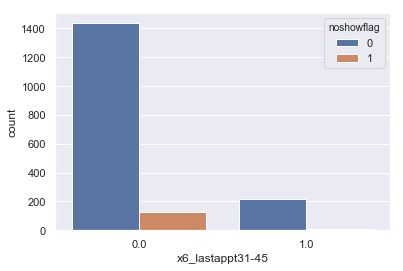

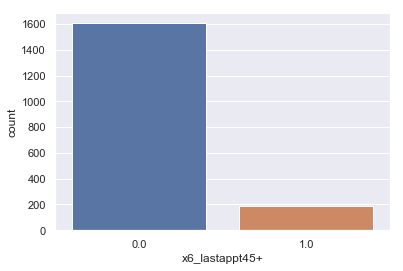

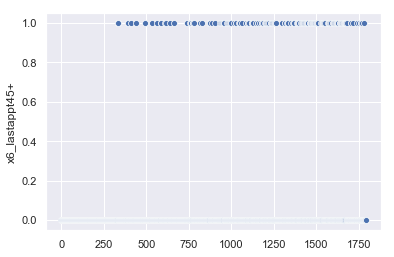

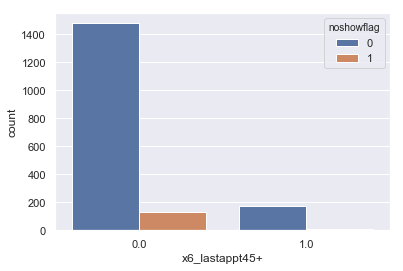

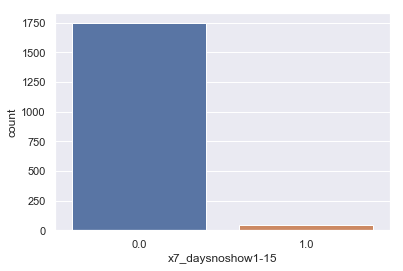

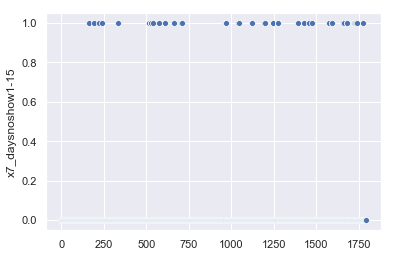

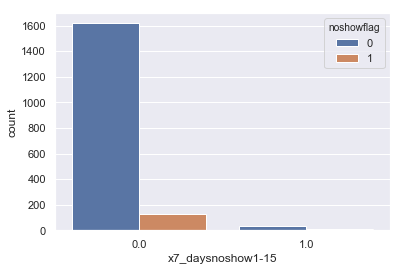

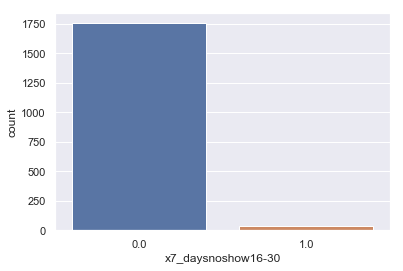

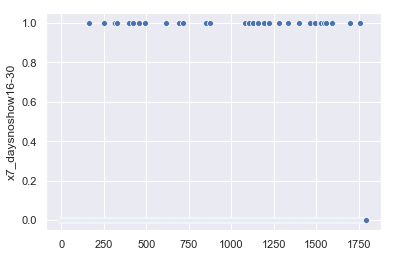

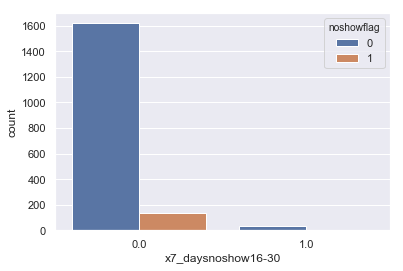

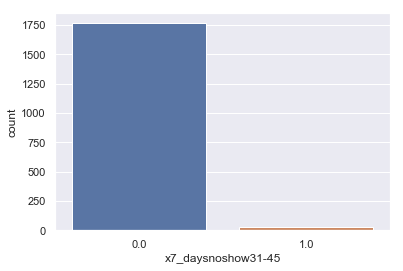

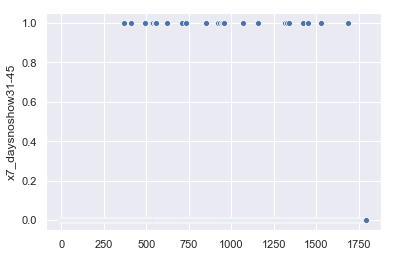

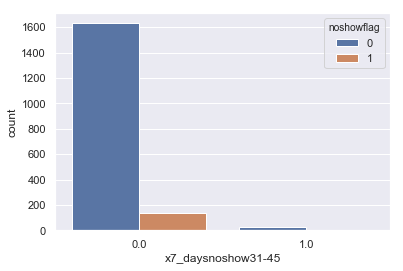

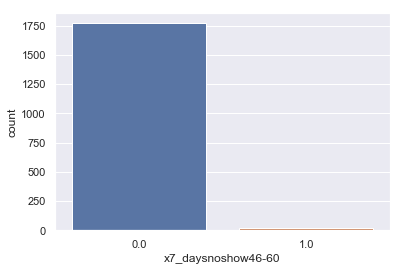

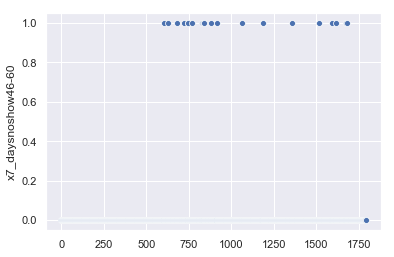

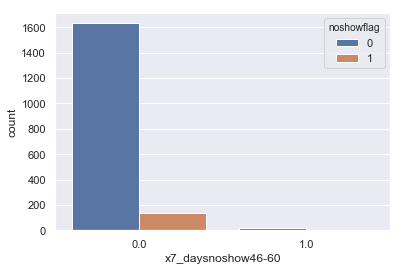

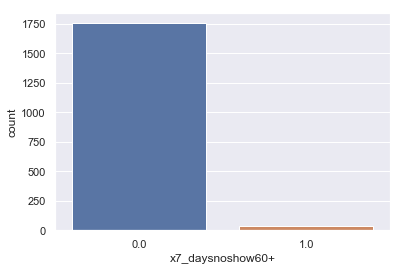

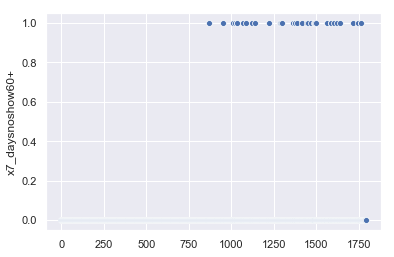

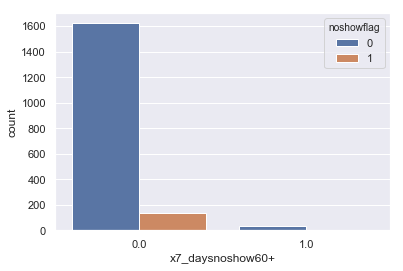

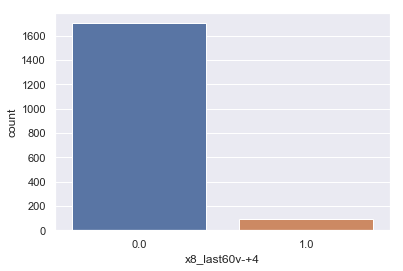

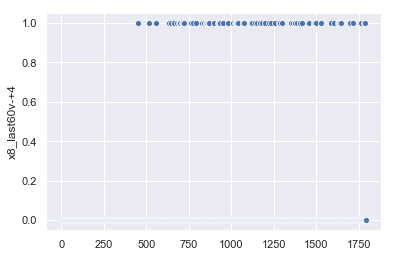

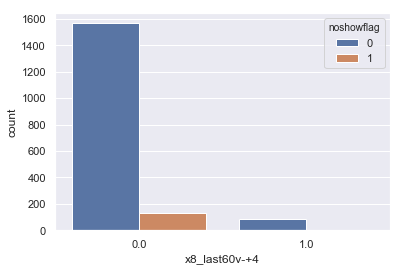

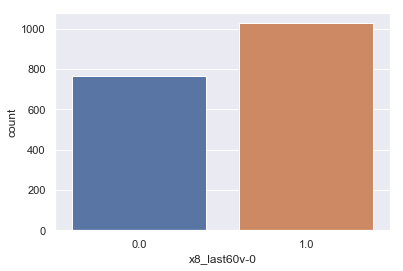

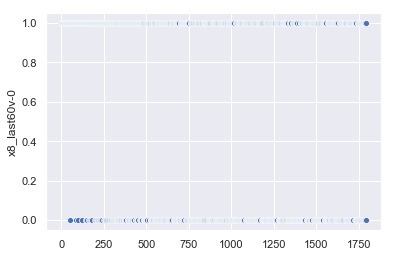

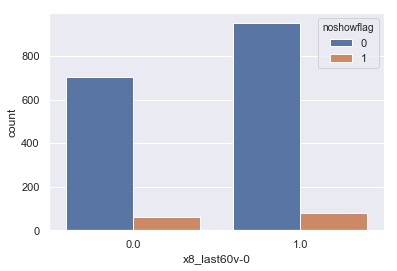

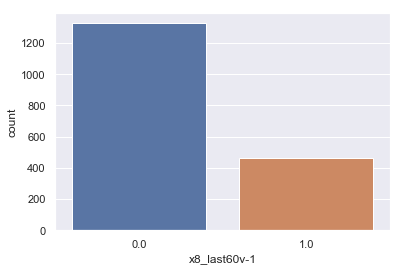

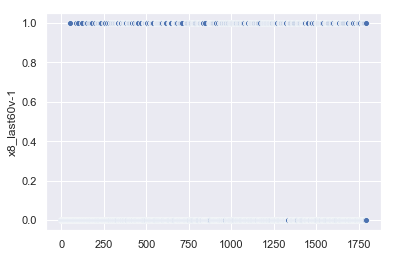

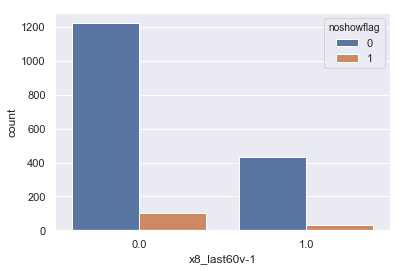

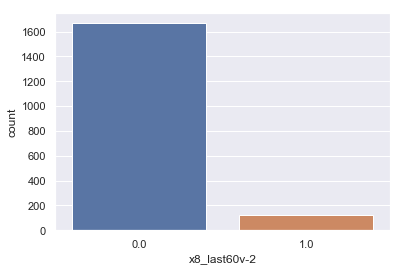

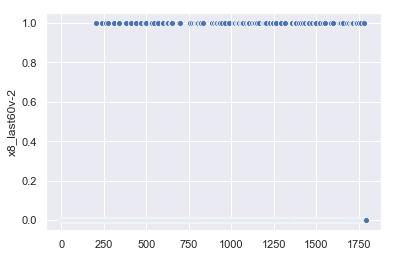

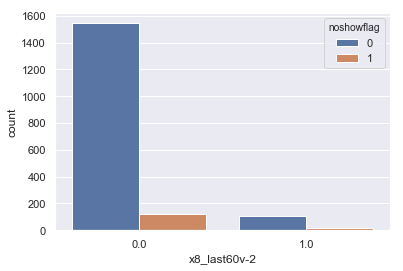

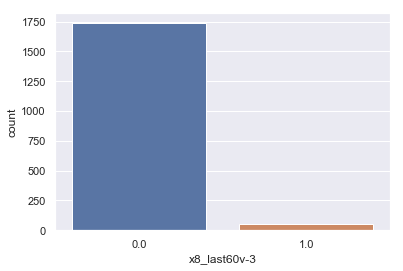

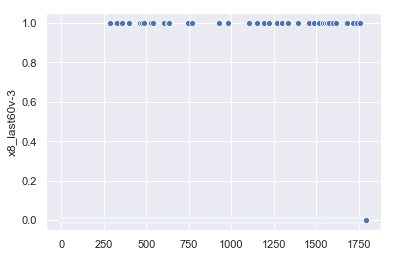

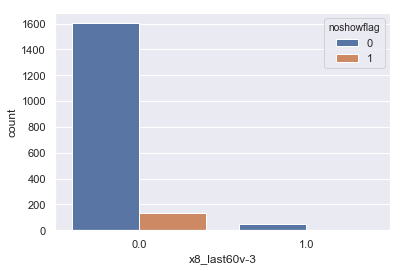

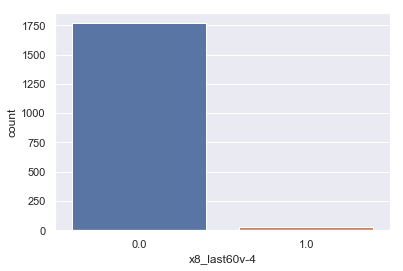

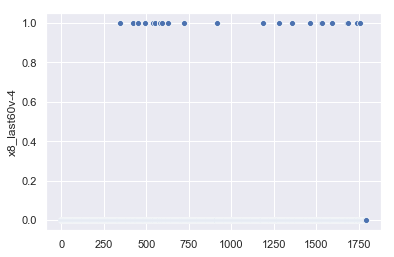

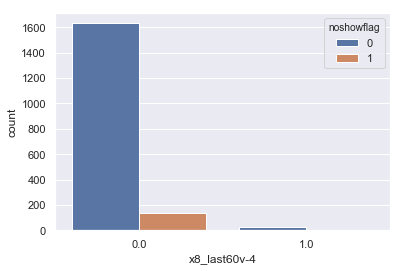

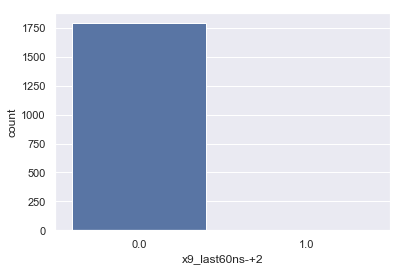

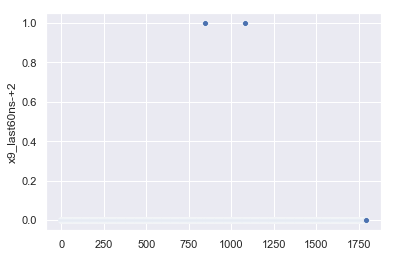

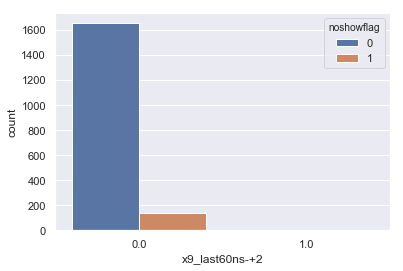

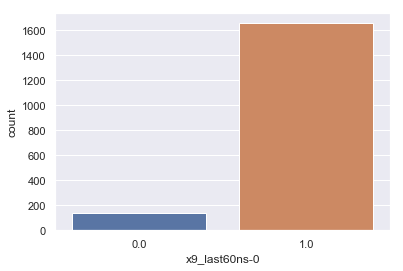

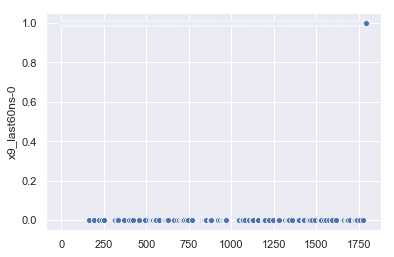

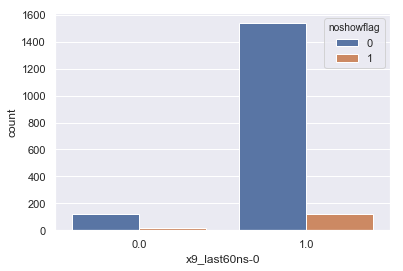

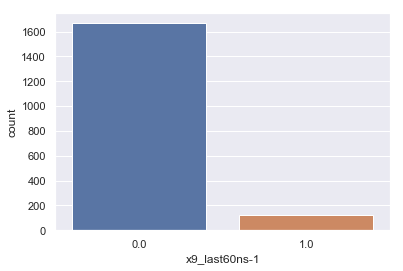

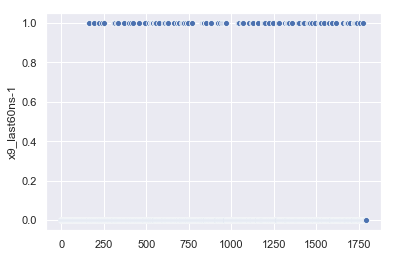

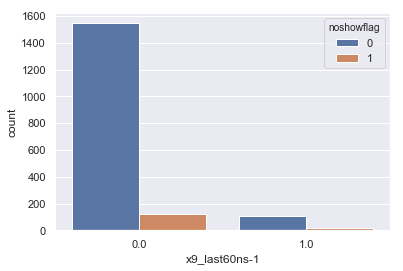

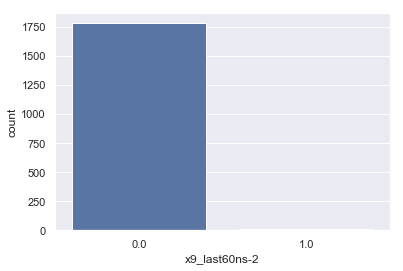

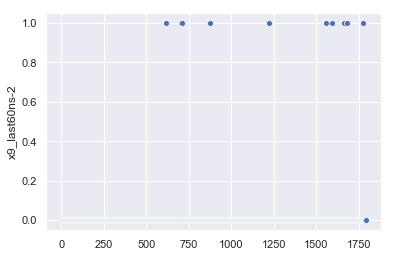

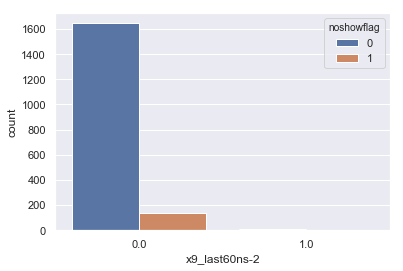

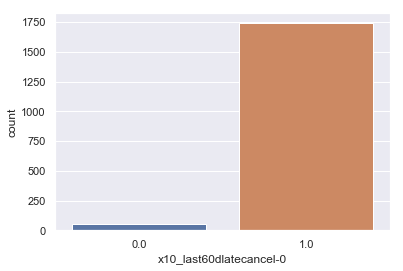

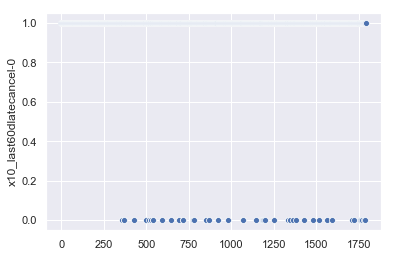

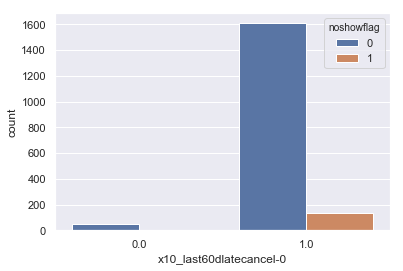

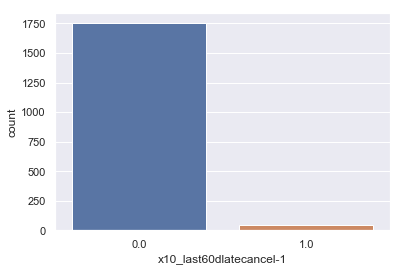

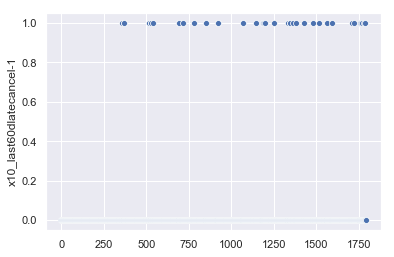

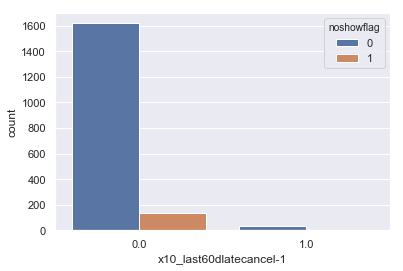

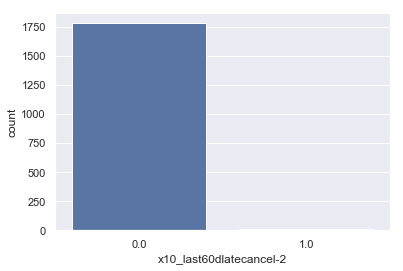

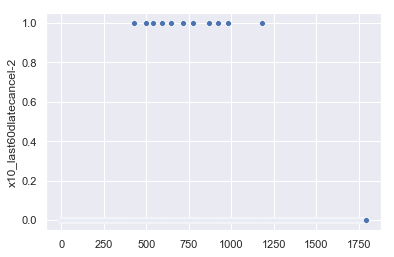

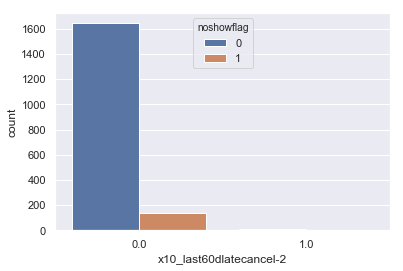

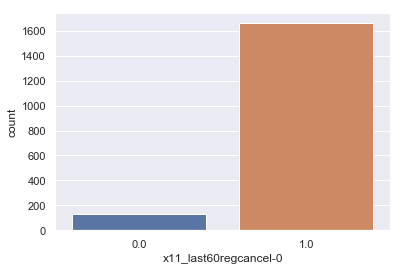

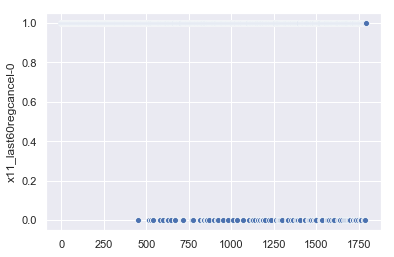

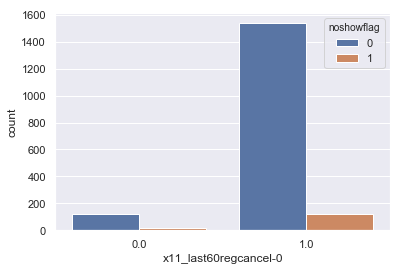

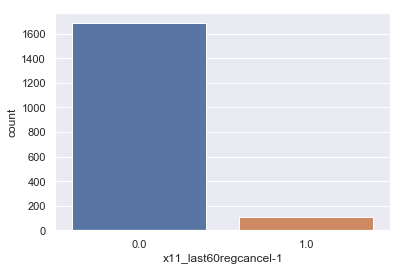

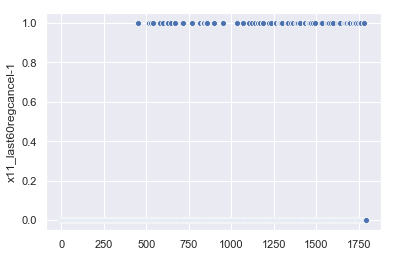

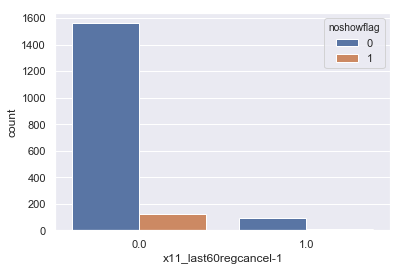

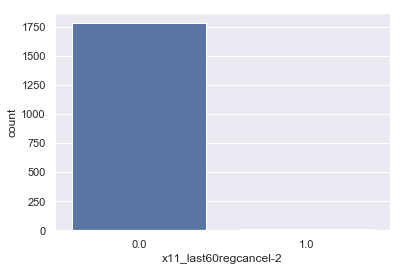

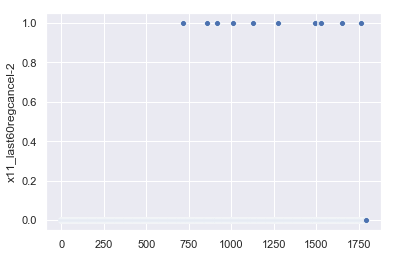

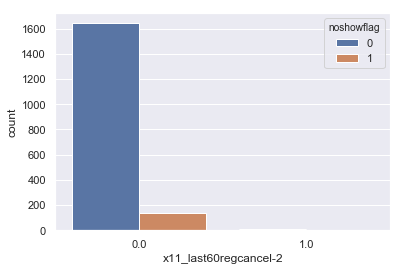

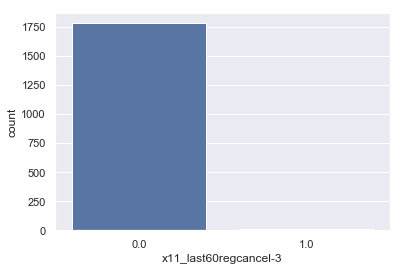

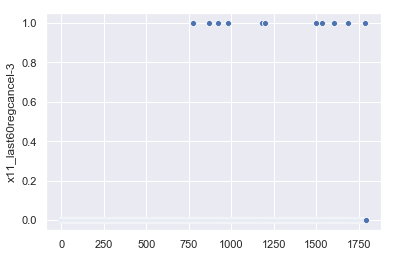

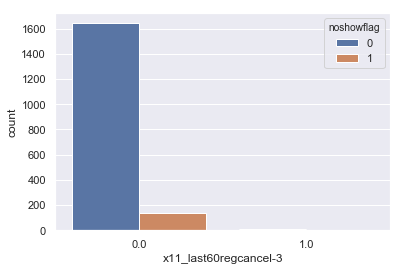

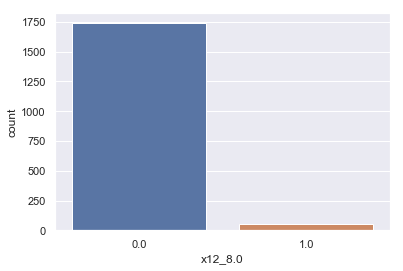

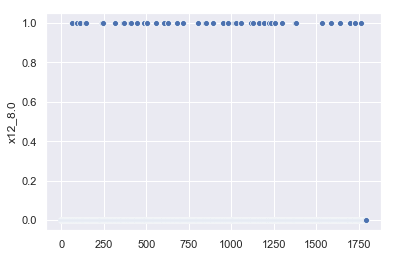

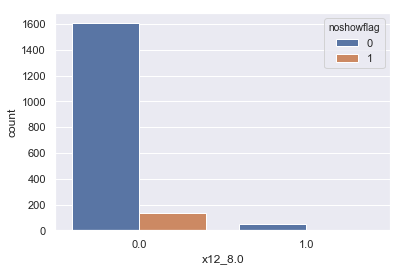

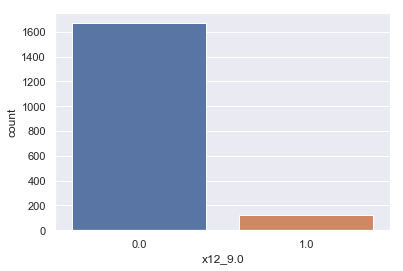

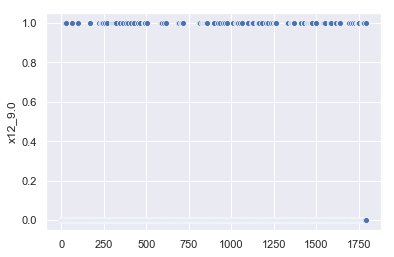

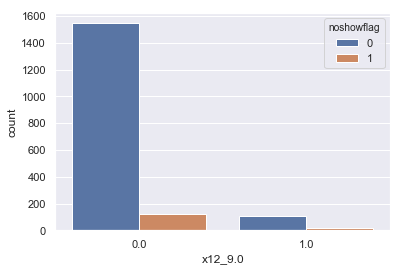

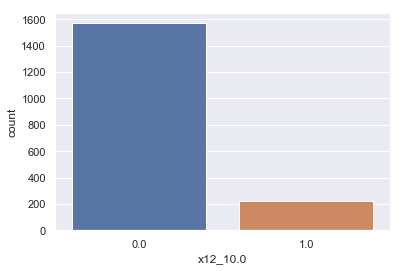

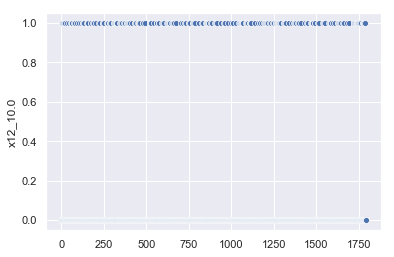

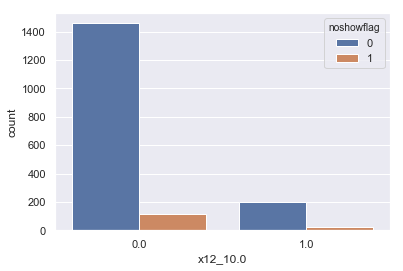

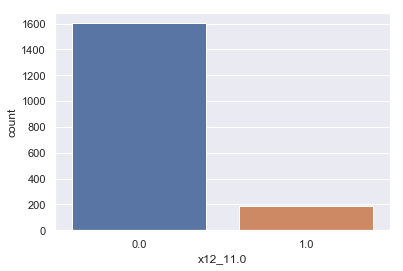

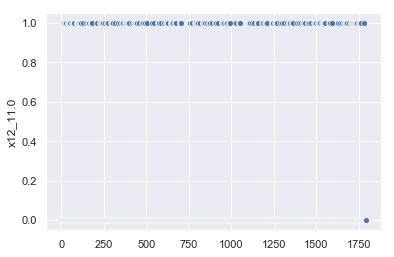

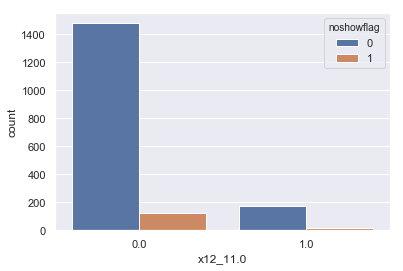

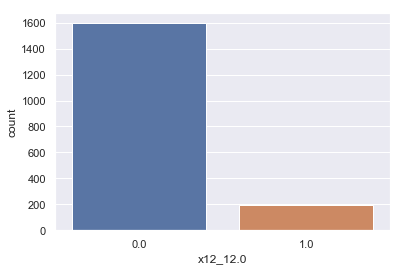

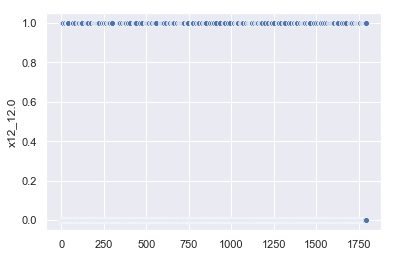

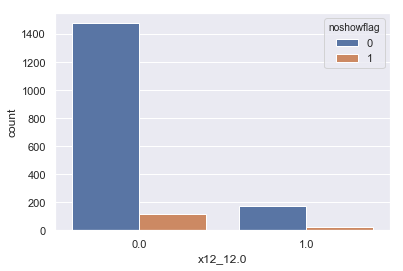

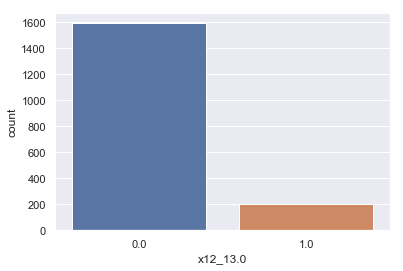

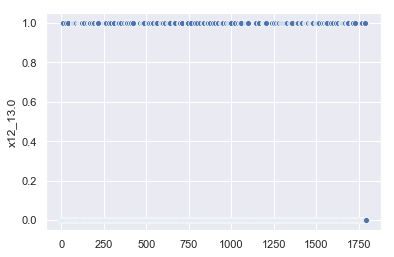

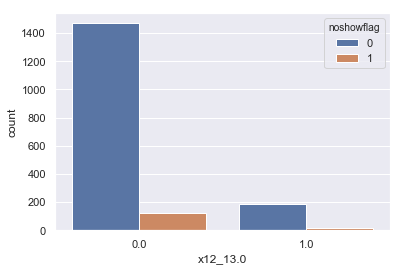

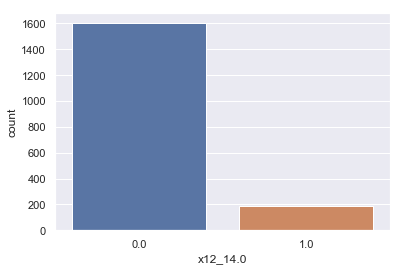

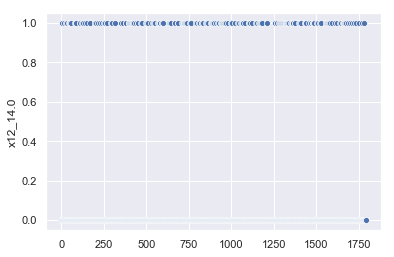

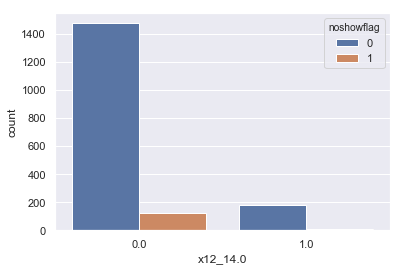

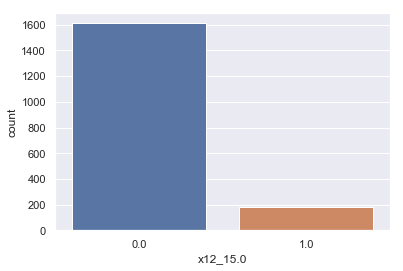

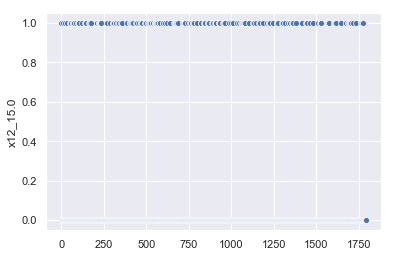

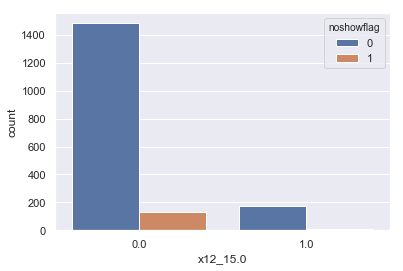

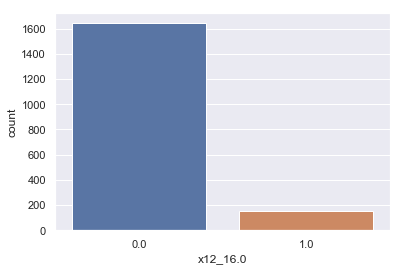

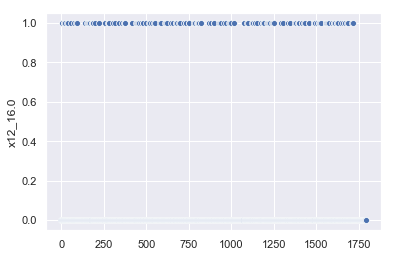

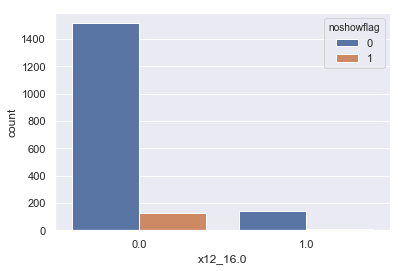

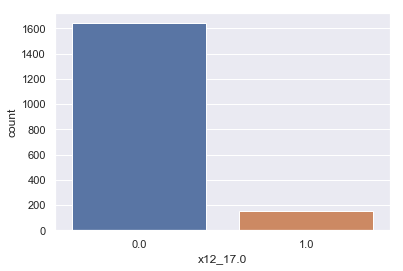

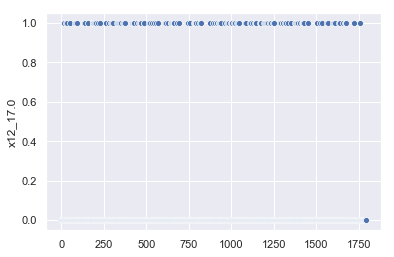

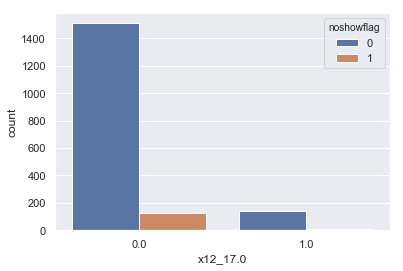

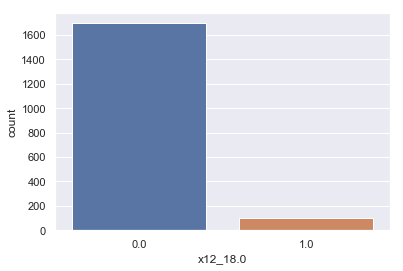

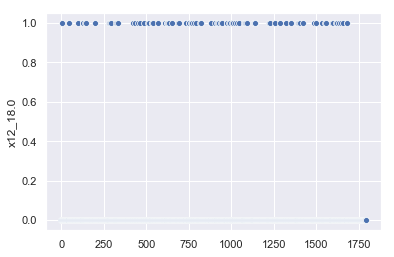

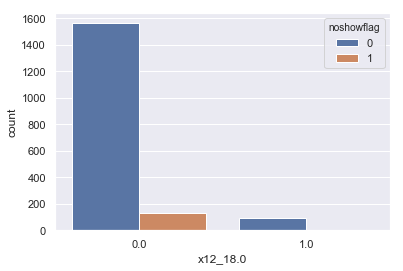

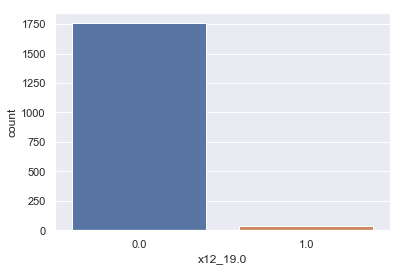

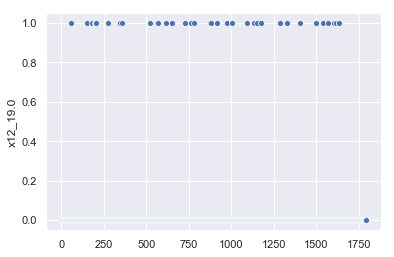

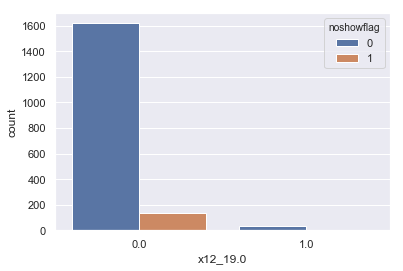

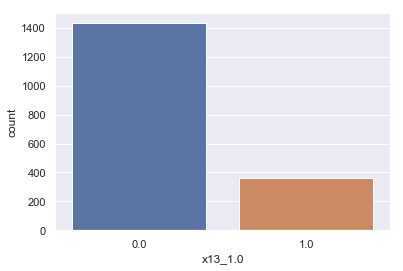

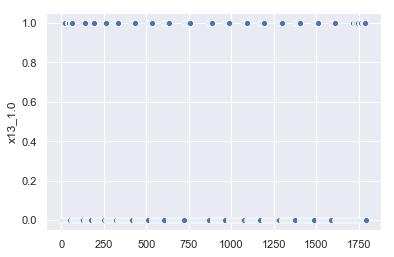

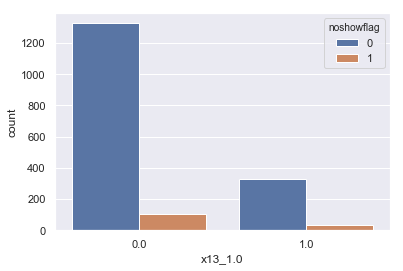

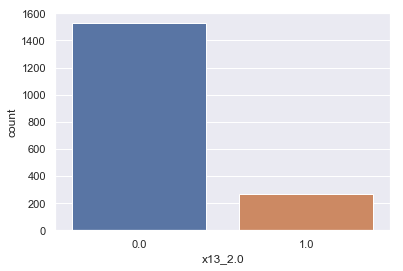

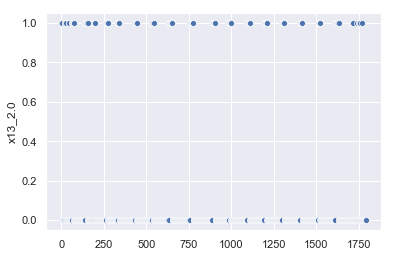

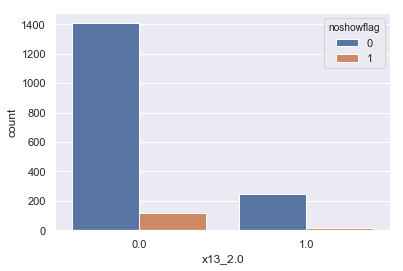

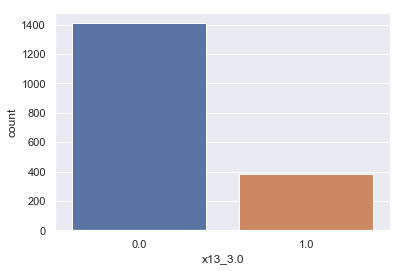

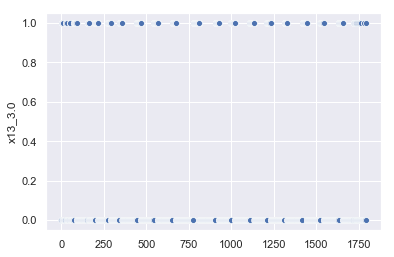

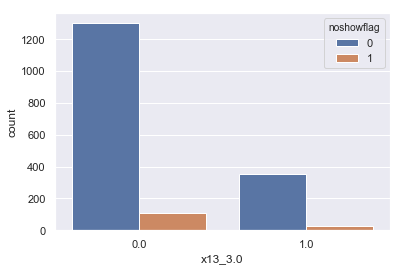

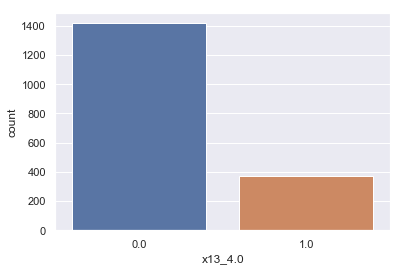

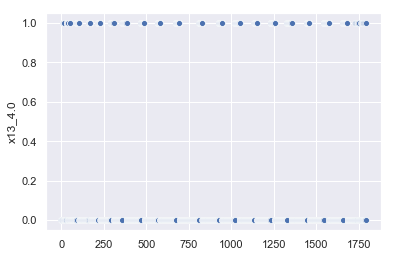

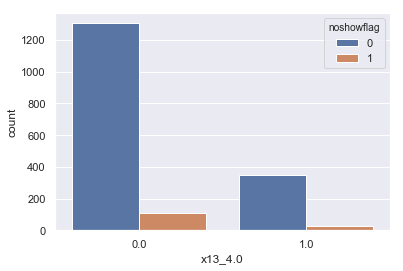

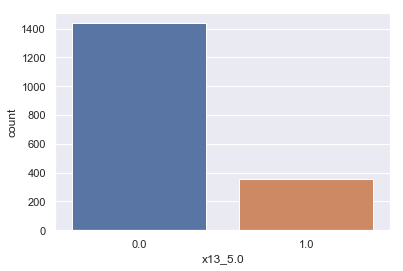

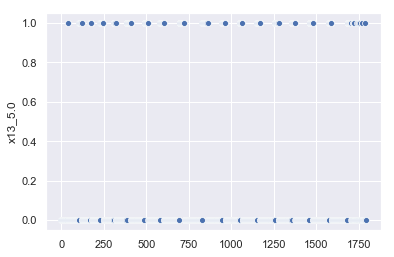

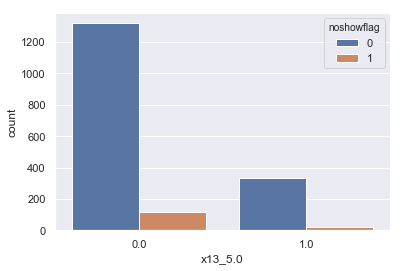

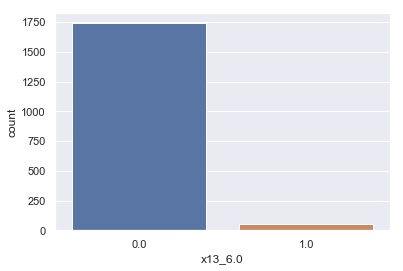

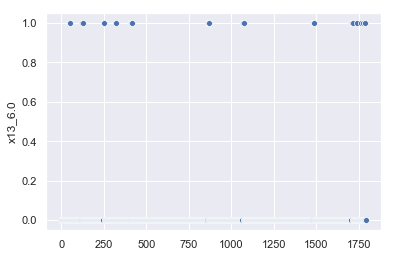

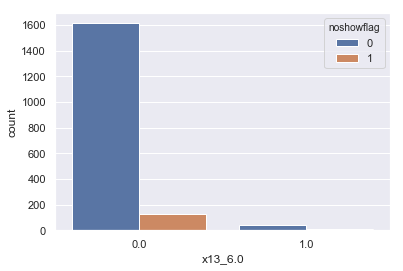

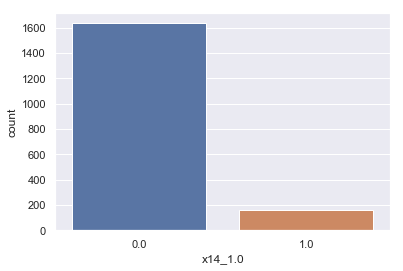

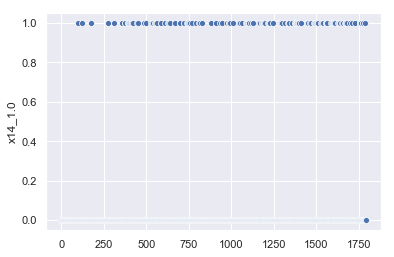

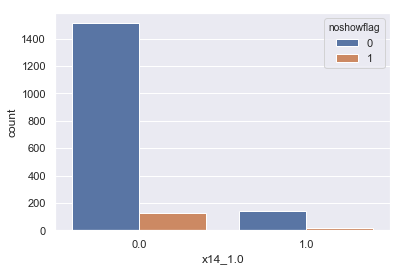

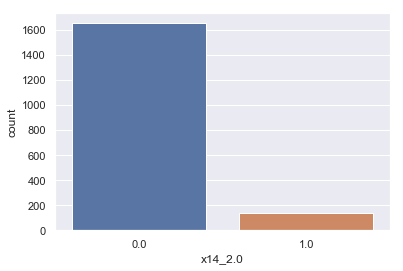

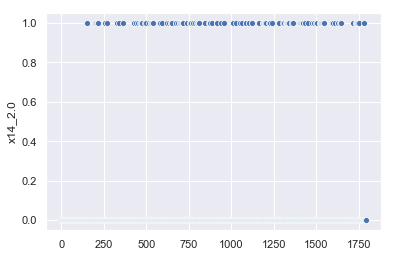

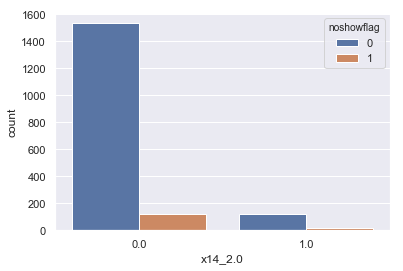

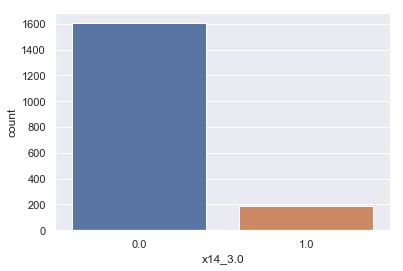

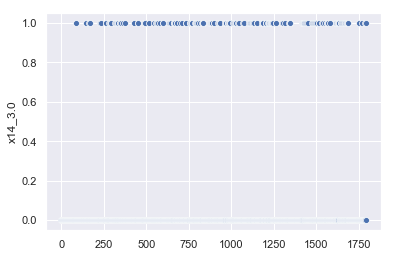

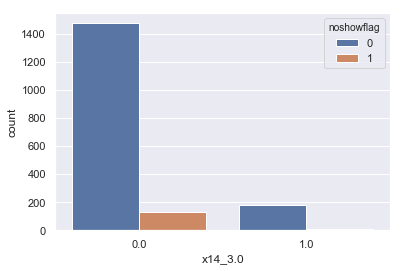

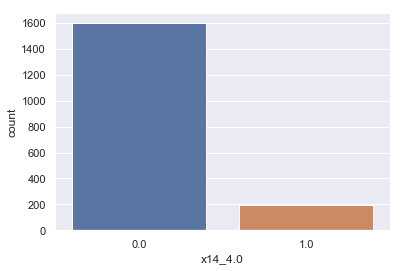

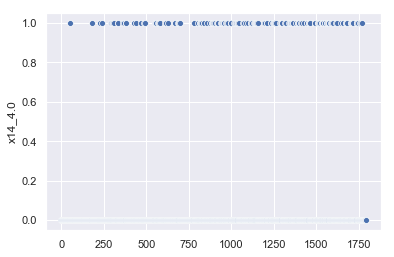

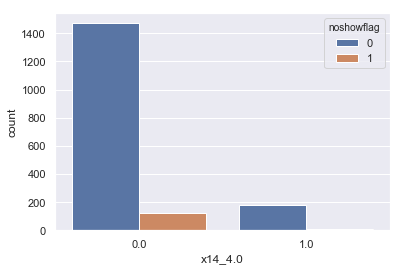

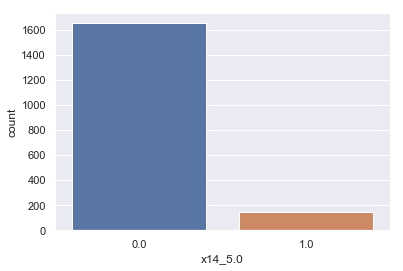

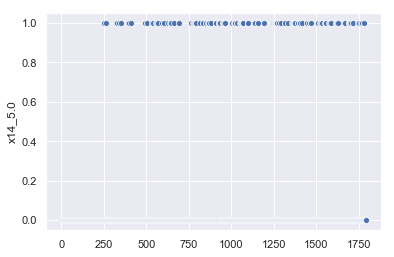

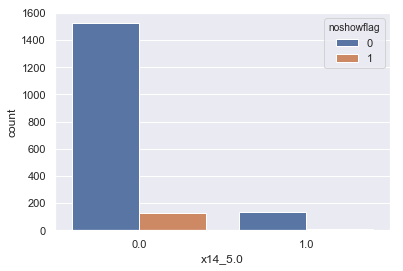

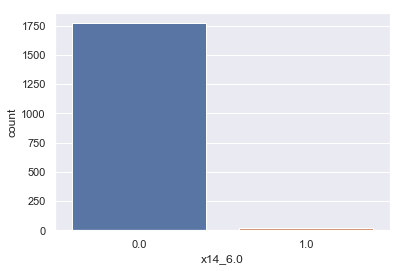

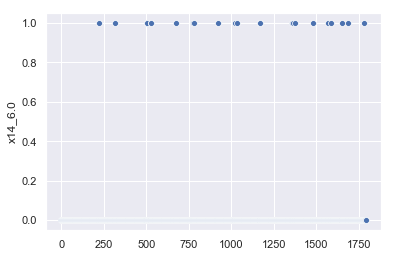

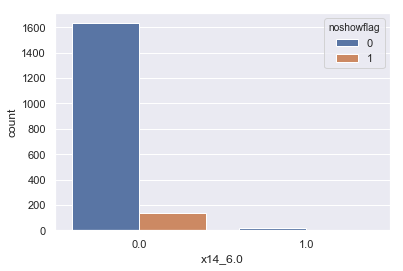

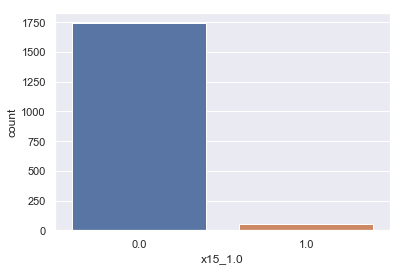

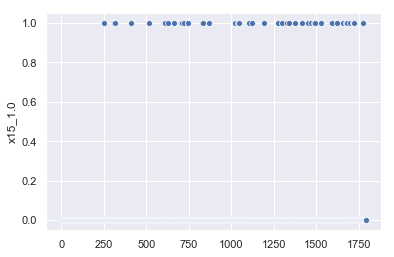

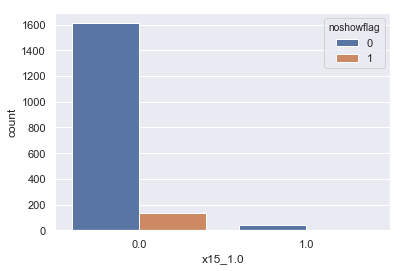

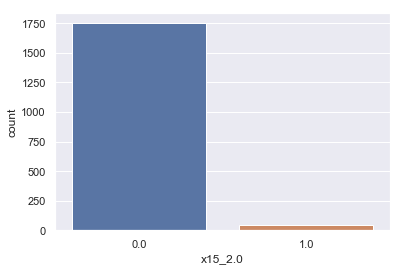

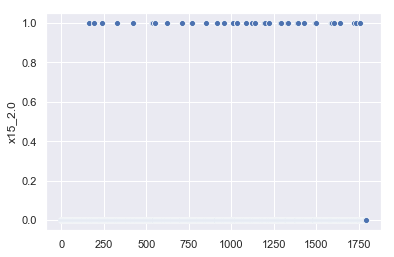

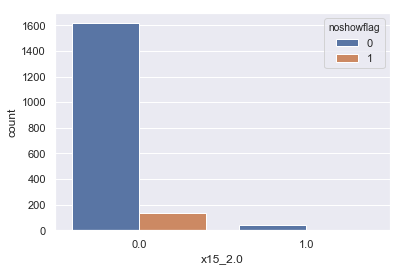

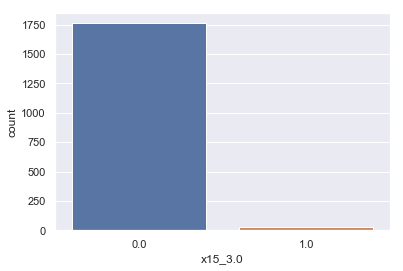

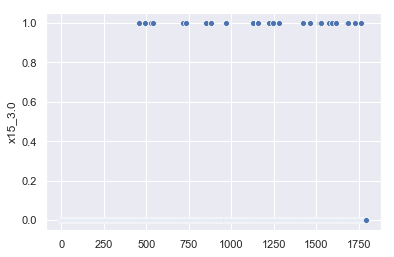

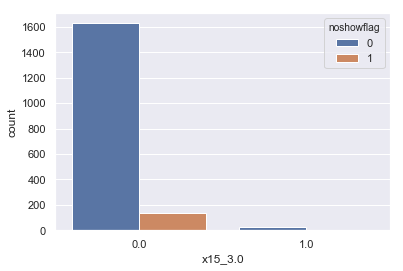

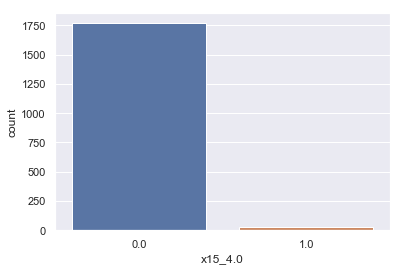

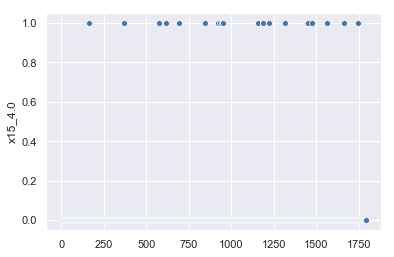

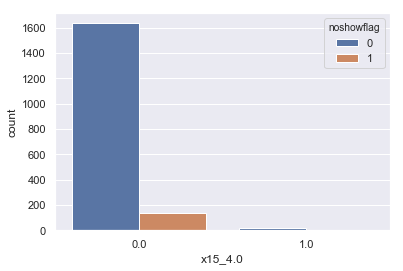

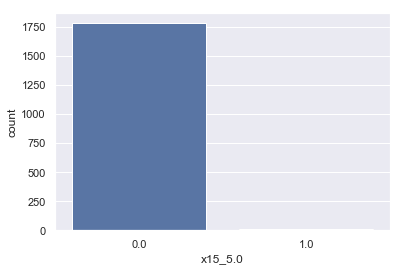

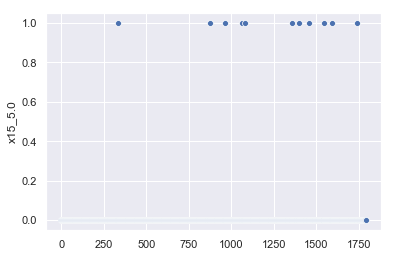

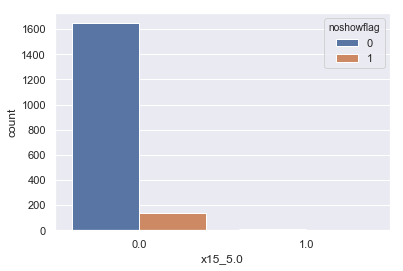

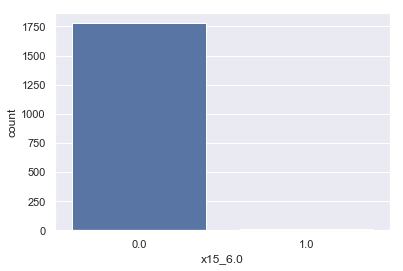

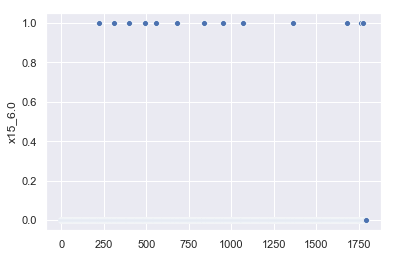

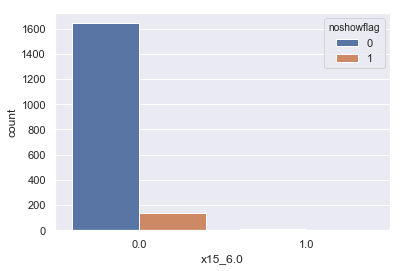

<Figure size 432x288 with 0 Axes>

In [76]:
mechkar.pyMechkar().exploreData(data=final,y='noshowflag')

In [77]:
x=final.columns.tolist()
tab1 = mechkar.pyMechkar().Table1(x=x,y="noshowflag",data=final, maxcat=15,miss=3, catmiss=True,excel=True,excel_file="Table1_hairsalon.xlsx")

Factorizing... please wait
*******************************************************************************************************************************************************************************************************
[]
[********************************************************************************************************************************************************************************************************
[********************************************************************************************************************************************************************************************************
['Unable to calcualte the Fisher exact test for variables last60drefundamt and noshowflag... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last60misc and noshowflag... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last60dnoshowc and noshowflag... The p-value may be incorrect', 'Una

In [79]:
tab1

Variables Categories            Population  \
0            Individuals          n                  1793   
1                   week          4    159.00 (    8.90%)   
2                   week          5    159.00 (    8.90%)   
3                   week          3    384.00 (   21.40%)   
4                   week          2    392.00 (   21.90%)   
5                   week          1    435.00 (   24.30%)   
6              dayinweek          3    361.00 (   20.10%)   
7              dayinweek          4    361.00 (   20.10%)   
8              dayinweek          1    266.00 (   14.80%)   
9              dayinweek          5    384.00 (   21.40%)   
10             dayinweek          2    375.00 (   20.90%)   
11             dayinweek          6    355.00 (   19.80%)   
12                  hour         10    222.00 (   12.40%)   
13                  hour         13    199.00 (   11.10%)   
14                  hour         12    197.00 (   11.00%)   
15                  hour         14    191.00 (   10.70%)   
16                  hour         11    190.00 (   10.60%)   
17                  hour         15    181.00 (   10.10%)   
18                  hour      Other    460.00 (   25.70%)   
19              firstapp          1    876.00 (   48.90%)   
20              firstapp          0    917.00 (   51.10%)   
21      existingcustomer          0    949.00 (   52.90%)   
22      existingcustomer          1    844.00 (   47.10%)   
23          multipleappt          0  1,360.00 (   75.90%)   
24          multipleappt          1    433.00 (   24.10%)   
25        previousnoshow          0  1,619.00 (   90.30%)   
26        previousnoshow          1    174.00 (    9.70%)   
27   lastnoshowdayinweek         -1  1,619.00 (   90.30%)   
28   lastnoshowdayinweek          1     50.00 (    2.80%)   
29   lastnoshowdayinweek          2     42.00 (    2.30%)   
..                   ...        ...                   ...   
419              x13_4.0          0  1,418.00 (   79.10%)   
420              x13_4.0          1    375.00 (   20.90%)   
421              x13_5.0          0  1,438.00 (   80.20%)   
422              x13_5.0          1    355.00 (   19.80%)   
423              x13_6.0          0  1,741.00 (   97.10%)   
424              x13_6.0          1     52.00 (    2.90%)   
425              x14_1.0          0  1,636.00 (   91.20%)   
426              x14_1.0          1    157.00 (    8.80%)   
427              x14_2.0          0  1,654.00 (   92.20%)   
428              x14_2.0          1    139.00 (    7.80%)   
429              x14_3.0          0  1,605.00 (   89.50%)   
430              x14_3.0          1    188.00 (   10.50%)   
431              x14_4.0          0  1,598.00 (   89.10%)   
432              x14_4.0          1    195.00 (   10.90%)   
433              x14_5.0          0  1,651.00 (   92.10%)   
434              x14_5.0          1    142.00 (    7.90%)   
435              x14_6.0          0  1,770.00 (   98.70%)   
436              x14_6.0          1     23.00 (    1.30%)   
437              x15_1.0          0  1,743.00 (   97.20%)   
438              x15_1.0          1     50.00 (    2.80%)   
439              x15_2.0          0  1,751.00 (   97.70%)   
440              x15_2.0          1     42.00 (    2.30%)   
441              x15_3.0          0  1,762.00 (   98.30%)   
442              x15_3.0          1     31.00 (    1.70%)   
443              x15_4.0          0  1,768.00 (   98.60%)   
444              x15_4.0          1     25.00 (    1.40%)   
445              x15_5.0          0  1,782.00 (   99.40%)   
446              x15_5.0          1     11.00 (    0.60%)   
447              x15_6.0          0  1,778.00 (   99.20%)   
448              x15_6.0          1     15.00 (    0.80%)   

               Category_1            Category_0  p_value  
0                     138                  1655      NaN  
1       27.00 (   19.60%)    144.00 (    8.70%)      NaN  
2       15.00 (   10.90%)    144.00 (    8.70%)    0.39

In [80]:
tab1[tab1.p_value < 0.05]

Variables  Categories            Population  \
7                 dayinweek           4    361.00 (   20.10%)   
26           previousnoshow           1    174.00 (    9.70%)   
67                   svcavg   Mean (SD)      65.40 (   36.70)   
91           last60dnoshowc  last60ns-1  1,656.00 (   92.40%)   
102  x0_wkday-1.0 hour-10.0           1     56.00 (    3.10%)   
196   x0_wkday-4.0 hour-9.0           1     35.00 (    2.00%)   
206  x0_wkday-5.0 hour-14.0           1     48.00 (    2.70%)   
236                 x1_MISC           1     68.00 (    3.80%)   
238                x1_STYLE           0  1,423.00 (   79.40%)   
246                 x2_CBAL           1     20.00 (    1.10%)   
270                  x2_CON           1     56.00 (    3.10%)   
276                  x2_FRI           1      4.00 (    0.20%)   
290                 x2_SHCW           1    674.00 (   37.60%)   
346       x7_daysnoshow1-15           1     47.00 (    2.60%)   
368          x9_last60ns-+2           1      2.00 (    0.10%)   
370           x9_last60ns-0           0  1,656.00 (   92.40%)   
372           x9_last60ns-1           1    125.00 (    7.00%)   
394                x12_10.0           1    222.00 (   12.40%)   
424                 x13_6.0           1     52.00 (    2.90%)   
428                 x14_2.0           1    139.00 (    7.80%)   
430                 x14_3.0           1    188.00 (   10.50%)   

               Category_1            Category_0  p_value  
7       18.00 (   13.00%)    328.00 (   19.80%)    0.004  
26      24.00 (   17.40%)    150.00 (    9.10%)    0.002  
67       50.50 (   53.20)      66.70 (   34.70)    0.000  
91     119.00 (   86.20%)  1,537.00 (   92.90%)    0.000  
102     11.00 (    8.00%)     45.00 (    2.70%)    0.002  
196      7.00 (    5.10%)     28.00 (    1.70%)    0.015  
206      0.00 (    0.00%)     48.00 (    2.90%)    0.047  
236     31.00 (   22.50%)     37.00 (    2.20%)    0.000  
238     82.00 (   59.40%)  1,341.00 (   81.00%)    0.000  
246      7.00 (    5.10%)     13.00 (    0.80%)    0.000  
270     30.00 (   21.70%)     26.00 (    1.60%)    0.000  
276      4.00 (    2.90%)      0.00 (    0.00%)    0.000  
290     25.00 (   18.10%)    649.00 (   39.20%)    0.000  
346     10.00 (    7.20%)     37.00 (    2.20%)    0.001  
368      2.00 (    1.40%)      0.00 (    0.00%)    0.006  
370    119.00 (   86.20%)  1,537.00 (   92.90%)    0.008  
372     16.00 (   11.60%)    109.00 (    6.60%)    0.041  
394     26.00 (   18.80%)    196.00 (   11.80%)    0.024  
424     11.00 (    8.00%)     41.00 (    2.50%)    0.001  
428     19.00 (   13.80%)    120.00 (    7.30%)    0.010  
430      7.00 (    5.10%)    181.00 (   10.90%)    0.044